# Pipeline Clustring

## Data preprocessing
1️⃣ Extract residue coordinates from PDB

2️⃣ Compute Weighted Center of Mass

3️⃣ Process a Single PDB File and Update the DataFrame

4️⃣ Process and Update Data for a Single PDB Structure

5️⃣ Process All PDB Files in a Directory

6️⃣ Compute Center of Protein Using PyMOL

7️⃣ Compute Protein Diameter

8️⃣ Process Protein Data for a Single PDB

## Experiment 

1. Cluster all residuals --> Normalize w/in cluster --> Median cutoff


2. Median cutoff --> Cluster only the residual above its cutoff


## Metric

- Distance btw center of mass of true ligand and the clusters

- Optional: Overlap volumn of grid box

## Clustering methods

- Kmeans clustering

- Spectral clustering

- Gaussian mixture-based clustering

- Optional: QT Clustering


#### Toy examples for the binding_sites_clustering


##### Table 1: Proteins with single binding site
| #  | PDB Code(s)        | Protein Name                               | Type of Binding Site                | Mean   | Std    | Min   | 25%   | 50%   | 75%   | Max   | Num of Chains | Total Residues | Comments                                  |
|----|---------------------|--------------------------------------------|-------------------------------------|--------|--------|-------|-------|-------|-------|-------|---------------|----------------|------------------------------------------|
| 1  | 1yer               | HSP90                                      | Subpocket                                 | 0.179  | 0.304  | 0.001 | 0.005 | 0.023 | 0.152 | 0.995 | 1.0           | 207            | no ligand                   |
| 2  | 1pw6               | IL-2                                       | Adjacent pocket                         | 0.144  | 0.180  | 0.001 | 0.020 | 0.062 | 0.207 | 0.921 | 2.0           | 250            | dimer with 2x FRB in the middle                 |
| 3  | 3zln               | BCL-XL                                     | Breath motion                            | 0.130  | 0.150  | 0.001 | 0.025 | 0.063 | 0.183 | 0.780 | 1.0           | 144            | 1 chain with H0Y ligand      |
| 4  | 3qkd               | BCL-XL                                     | Breath motion                              |  0.115  | 0.140  | 0.001 | 0.016 | 0.053  | 0.168 | 0.698 | 2.0           | 282            | Two chains, HI0 per chain    |
| 5  | 1cz2 (model 2&8)   | ns-LTP                                     | Channel/Tunnel                             | 0.278  | 0.309  | 0.004 | 0.032 | 0.132 | 0.458 | 0.964 | 1.0           | 90             | Tunnel-like binding structure            |
| 6  | 1kv1               | P38 MAPK                                   | Allosteric pocket                          | 0.113  | 0.204  | 0.001 | 0.009 | 0.025 | 0.102 | 0.981 | 1.0           | 331            | Allosteric inhibition pocket , BMU ligand            |
| 7  | 1ny3               | P38 MAPK                                   | Allosteric pocket                         | 0.114  | 0.178  | 0.000 | 0.008 | 0.026 | 0.136 | 0.888 | 1.0           | 277            | Allosteric inhibition pocket             |
| 8  | 6o0k               | BCL-2                                      | Single binding site                       | 0.090  | 0.134  | 0.001 | 0.011 | 0.035 | 0.098 | 0.655 | 1.0           | 141            | 2 HETATM, Single known binding pocket              |
| 9  | 1ubq               | Ubiquitin                                  | No ligand binding site                     | 0.123  | 0.148  | 0.003 | 0.026 | 0.072 | 0.156 | 0.659 | 1.0           | 76             | No ligand             |
| 10 | 4pti               | BPTI (Bovine pancreatic trypsin inhibitor) | No ligand binding site                    | 0.271  | 0.249  | 0.012 | 0.074 | 0.188 | 0.413 | 0.850 | 1.0           | 58             | no ligand binding   |
| 11 | 1ao6               | Serum albumin                              | No ligand binding site                  | 0.109  | 0.174  | 0.001 | 0.012 | 0.036 | 0.117 | 0.948 | 2.0           | 1156           | no binding site detected |

##### Table 2: Multiple binding site
| #  | PDB Code(s)        | Protein Name                               | Mean   | Std    | Min   | 25%   | 50%   | 75%   | Max   | Num of Chains | Total Residues | Comments                                  |
|----|---------------------|--------------------------------------------|--------|--------|-------|-------|-------|-------|-------|---------------|----------------|------------------------------------------|
| 1  | 3ptb               | Bovine ß-trypsin                          | 0.090  | 0.151  | 0.000 | 0.007 | 0.022 | 0.095 | 0.817 | 1.0           | 220            | 1 ligand, Benzamine                       |
| 2  | 3hvc               | MAPK                                       | 0.107  | 0.173  | 0.001 | 0.014 | 0.034 | 0.116 | 0.972 | 1.0           | 327            | 2 x GG5 ligand, not symmetric p(bind)     |
| 3  | 4f9w               | MAPK                                       | 0.094  | 0.164  | 0.001 | 0.010 | 0.028 | 0.090 | 0.936 | 1.0           | 336            | Large active site with multiple pockets, several ligands, 2xGG5, 1xLM4 |
| 4  | 3cpa               | Carboxy-peptidase                         | 0.076  | 0.149  | 0.000 | 0.006 | 0.017 | 0.059 | 0.849 | 1.0           | 307            | 1 ligand tyrosine                         |
| 5  | 1qcf               | HCK (haematopoietic cell kinase)           | 0.058  | 0.115  | 0.001 | 0.006 | 0.016 | 0.052 | 0.939 | 1.0           | 450            | 1x PP1                                   |
| 6  | 1h61               | Pentaerythritol tetranitrate kinase        | 0.112  | 0.213  | 0.000 | 0.003 | 0.016 | 0.094 | 0.956 | 1.0           | 364            | 2 different ligands (FMN, PDN) located directly near each other |
| 7  | 2bal               | MAPK                                       | 0.082  | 0.149  | 0.001 | 0.009 | 0.023 | 0.071 | 0.927 | 1.0           | 338            | 2 small molecules observed, PQA          |
| 8  | 1hvy               | Thymidylate synthase                      | 0.136  | 0.246  | 0.000 | 0.004 | 0.017 | 0.125 | 0.988 | 4.0           | 1152           | 4 chains, 2 ligands per chain, D16, UMP, and BME |
| 9  | 3g5d               | Tyrosine-protein kinase src               | 0.110  | 0.206  | 0.001 | 0.007 | 0.024 | 0.086 | 0.976 | 2.0           | 513            | 2 chains, with 1 1N1 per chain           |
| 10 | 1be9               | PDZ-domain                                | 0.116  | 0.189  | 0.002 | 0.013 | 0.034 | 0.108 | 0.814 | 2.0           | 120            | No ligand                                 |

I will first examine 4 proteins: 
- 3hvc: MBS:   2 x GG5 ligand,  not symmetric p(bind)
- 4f9w: MBS:   Large active site with multiple pockets, several ligand, 2xGG5, 1xLM4 
- 1hvy: MBS:   4 chains, 2 ligand per chain, D16, UMP and BME
- 6o0k: SBS:   LBM 
- 1ubq: NBS: 

In [132]:
# Define data path
data_path = "/Users/nicha/dev/Protein-preparation-pipeline/data/toy_examples_clustering"

# System and OS utilities
import os
import sys

# Numerical and Data Processing
import numpy as np
import pandas as pd

# Scientific and Bioinformatics Tools
from math import e
from pymol import cmd, stored
import numpy as np
from Bio import PDB
from scipy.stats import shapiro, anderson, normaltest
from scipy.spatial import distance_matrix, KDTree
from joblib import Parallel, delayed
from tqdm import tqdm
from itertools import combinations


# Machine Learning & Clustering
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import py3Dmol



# Color Mapping for Visualization
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

# Add project-specific source path
sys.path.append('/Users/nicha/dev/Protein-preparation-pipeline/src/')

# Custom Modules from Your Project
from pdb_retrival.data_retriever import PDBDataRetriever

#### Data preparation

- Read results files from AF2Bind in the datapath
- Extract the coordinate of the heavy atoms of each residue, in case the augmented data is used to clustering
- Calculate the center of mass of all the heavy atoms of each residue
- Save all the data in one dataframe dfs["PDB_code"]

In [166]:
# Function for the data preparation

# 1️⃣ Extract residue coordinates from PDB
def extract_residue_coordinates(pdb_file, residue_number, chain_id="A"):
    """
    Extracts atomic coordinates for a given residue from a PDB file.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_number (int): Residue number to extract.
        chain_id (str): Chain ID of the residue.

    Returns:
        list: List of tuples (atom_type, x, y, z).
    """
    coordinates = []
    try:
        with open(pdb_file, "r") as file:
            for line in file:
                if line.startswith(("ATOM", "HETATM")) and line[21] == chain_id:
                    resi = int(line[22:26].strip())
                    if resi == residue_number:
                        atom_type = line[76:78].strip()
                        x = float(line[30:38].strip())
                        y = float(line[38:46].strip())
                        z = float(line[46:54].strip())
                        coordinates.append((atom_type, x, y, z))
    except FileNotFoundError:
        print(f"Error: File {pdb_file} not found.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return coordinates


# 2️⃣ Compute Weighted Center of Mass
def calculate_weighted_center_of_mass(coordinates):
    """
    Calculates the weighted center of mass for a given set of atomic coordinates.

    Args:
        coordinates (list): List of tuples (atom_type, x, y, z).

    Returns:
        list: [x, y, z] coordinates of the weighted center of mass.
    """
    total_weight = 0
    weighted_coords = np.zeros(3)
    atomic_weights = {"H": 1.008, "C": 12.011, "N": 14.007, "O": 15.999, "S": 32.06}

    for atom_type, x, y, z in coordinates:
        weight = atomic_weights.get(atom_type.upper(), 1.0)
        weighted_coords += np.array([x, y, z]) * weight
        total_weight += weight

    return np.round(weighted_coords / total_weight, 3).tolist()


# 3️⃣ Process a Single PDB File and Update the DataFrame
def process_pdb_file(data_path, pdb_code, df):
    """
    Reads a PDB file and updates a DataFrame with residue center of mass.

    Args:
        data_path (str): Path to the directory containing the PDB and CSV files.
        pdb_code (str): PDB code of the protein.
        df (pd.DataFrame): DataFrame containing residue data.

    Returns:
        pd.DataFrame: Updated DataFrame with center of mass information.
    """
    pdb_file = os.path.join(data_path, f"{pdb_code}.pdb")

    try:
        for index, row in df.iterrows():
            residue_number = row["resi"]
            chain_id = row["chain"]
            coordinates = extract_residue_coordinates(pdb_file, residue_number, chain_id)
            if coordinates:
                center_of_mass = calculate_weighted_center_of_mass(coordinates)
                df.loc[index, "resn_coordinates"] = str(coordinates)
                df.loc[index, ["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"]] = center_of_mass
            else:
                print(f"Residue {residue_number} in chain {chain_id} not found in {pdb_file}.")
    except FileNotFoundError:
        print(f"Error: {pdb_file} not found.")
    except Exception as e:
        print(f"Unexpected error: {e}")

    return df


# 4️⃣ Process and Update Data for a Single PDB Structure
def process_and_update_pdb_data(data_path, pdb_code):
    """
    Reads and processes a PDB file and corresponding CSV file to update residue information.

    Args:
        data_path (str): Path to the directory containing the PDB and CSV files.
        pdb_code (str): PDB code of the protein.

    Returns:
        pd.DataFrame: Updated DataFrame with residue information.
    """
    csv_file_path = f"{data_path}/results_{pdb_code}.csv"

    try:
        df = pd.read_csv(csv_file_path)
        df_updated = process_pdb_file(data_path, pdb_code, df)
        df_updated.to_csv(f"{data_path}/results_{pdb_code}_updated.csv", index=False)
        return df_updated
    except Exception as e:
        print(f"Error processing {pdb_code}: {e}")
        return None


# 5️⃣ Process All PDB Files in a Directory
def process_all_pdb_files(data_path):
    """
    Process all PDB-related files in the given directory and combine results.

    Args:
        data_path (str): Path to the directory containing the PDB and CSV files.

    Returns:
        pd.DataFrame: Combined DataFrame with all processed data.
    """
    combined_df = pd.DataFrame()

    for file in os.listdir(data_path):
        if file.startswith("results_") and file.endswith(".csv"):
            pdb_code = file.split("_")[1].split(".")[0]
            updated_df = process_and_update_pdb_data(data_path, pdb_code)
            if updated_df is not None:
                updated_df["PDBcode"] = pdb_code
                combined_df = pd.concat([combined_df, updated_df], ignore_index=True)

    combined_df.drop_duplicates(inplace=True)
    combined_df.to_csv(f"{data_path}/combined_results.csv", index=False)
    return combined_df


# 6️⃣ Compute Center of Protein Using PyMOL
def calculate_center_of_mass_pymol(pdb_file):
    """
    Calculates the center of mass of a protein using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        tuple: (x, y, z) coordinates of the protein's center of mass.
    """
    cmd.load(pdb_file, "protein")
    center_of_mass = cmd.centerofmass("protein")
    cmd.delete("all")
    return round(center_of_mass[0], 3), round(center_of_mass[1], 3), round(center_of_mass[2], 3)


# 7️⃣ Compute Protein Diameter
def calculate_protein_diameter(df):
    """
    Computes the diameter of a protein, defined as the maximum distance between residues.

    Args:
        df (pd.DataFrame): DataFrame containing residue data with center of mass coordinates.

    Returns:
        float: Maximum distance between residues.
    """
    coordinates = df[['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']].values
    distances = np.linalg.norm(coordinates[:, np.newaxis] - coordinates, axis=2)
    return round(np.max(distances), 3)


# 8️⃣ Process Protein Data for a Single PDB
def process_protein_data(pdb_code, dfs, data_path):
    """
    Processes protein data by computing center of mass and diameter.

    Args:
        pdb_code (str): The PDB code of the protein.
        dfs (dict): Dictionary containing DataFrames indexed by PDB code.
        data_path (str): Path to the directory containing the PDB files.

    Returns:
        pd.DataFrame: Updated DataFrame with center of protein and diameter.
    """
    pdb_file_path = f"{data_path}/{pdb_code}.pdb"
    df = dfs[pdb_code]
    center_of_mass = calculate_center_of_mass_pymol(pdb_file_path)
    protein_diameter = calculate_protein_diameter(df)

    df["protein_x"], df["protein_y"], df["protein_z"] = center_of_mass
    df["protein_diameter"] = protein_diameter

    return df

import numpy as np
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize_features(df, feature_columns):
    """
    Normalize or standardize features based on their distribution.

    - **Standardizes (Z-score) if normally distributed**.
    - **Normalizes (Min-Max) if not normally distributed**.
    - **Adds new columns instead of replacing existing ones**.
    - **Stores scalers for consistent transformation in clustering**.

    Args:
        df (pd.DataFrame): DataFrame containing features.
        feature_columns (list): List of feature column names (e.g., 3D coordinates).

    Returns:
        pd.DataFrame: DataFrame with added transformed feature columns.
        dict: Dictionary of fitted scalers (for later reuse).
    """
    processed_df = df.copy()
    scalers = {}

    for col in feature_columns:
        stat, p_value = shapiro(df[col].dropna())  # Test normality
        
        if p_value > 0.05:  
            scaler = StandardScaler()  # Standardization if normal
            new_col_name = f"{col}_standardized"
        else:  
            scaler = MinMaxScaler()  # Normalization if not normal
            new_col_name = f"{col}_normalized"

        processed_df[new_col_name] = scaler.fit_transform(df[[col]])  # Apply transformation
        scalers[col] = scaler  # Store scaler for reuse

    return processed_df, scalers


def weighted_pbind(df, pbind_column='p(bind)', weights=[1.0]):
    """
    Normalize and apply multiple weight factors to p(bind).

    - **Scales p(bind) between 0 and 1**.
    - **Applies multiple weight factors** to create additional columns.
    - **Adds new columns instead of replacing p(bind)**.
    - **Stores scaler** for reuse in clustering.

    Args:
        df (pd.DataFrame): DataFrame containing p(bind).
        pbind_column (str): Column name for p(bind).
        weights (list): List of weight multipliers (e.g., [1.0, 5.0, 10.0, 100.0]).

    Returns:
        pd.DataFrame: DataFrame with weighted p(bind) columns.
        dict: Dictionary of fitted scalers.
    """
    processed_df = df.copy()
    scalers = {}

    if pbind_column in df.columns:
        scaler = MinMaxScaler()
        normalized_pbind = scaler.fit_transform(df[[pbind_column]])  # Scale to 0-1
        scalers[pbind_column] = scaler  # Store scaler

        for weight in weights:
            weighted_col_name = f"{pbind_column}_weight_{weight}"
            processed_df[weighted_col_name] = normalized_pbind * weight  # Apply weight

    return processed_df, scalers
    """
    Normalize and apply multiple weight factors to p(bind).

    - **Scales p(bind) between 0 and 1**.
    - **Applies multiple weight factors** to create additional columns.
    - **Stores scaler** for reuse in clustering.

    Args:
        df (pd.DataFrame): DataFrame containing p(bind).
        pbind_column (str): Column name for p(bind).
        weights (list): List of weight multipliers (e.g., [1.0, 1.5, 2.0]).

    Returns:
        pd.DataFrame: DataFrame with weighted p(bind) columns.
        dict: Dictionary of fitted scalers.
    """
    processed_df = df.copy()
    scalers = {}

    if pbind_column in df.columns:
        scaler = MinMaxScaler()
        normalized_pbind = scaler.fit_transform(df[[pbind_column]])  # Scale to 0-1
        scalers[pbind_column] = scaler  # Store scaler

        for weight in weights:
            weighted_col_name = f"{pbind_column}_weight_{weight}"
            processed_df[weighted_col_name] = normalized_pbind * weight  # Apply weight

    return processed_df, scalers


In [157]:
def visualize_protein_ligand_distance(
    pdb_file, residue_data, column, cluster_centers, ligand_centers, distances, 
    title=None, cmap_name='viridis'
):
    """
    Visualize a protein structure and ligand with protein colored by a specified column's values.
    Also visualize the center of mass for clusters and ligands, and distances between them.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', column].
        column (str): Name of the column to use for coloring the residues.
        cluster_centers (dict): Dictionary containing cluster centers.
        ligand_centers (dict): Dictionary containing ligand centers.
        distances (dict): Dictionary containing distances between clusters and ligands.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'tab20').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} clustering based on {column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[column].min(), vmax=residue_data[column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=600)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the column's values
    for _, row in residue_data.iterrows():
        value = row[column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.addStyle({'hetflag': True}, {'stick': {'color': ligand_color}})

    # Visualize the center of mass for clusters and ligands
    for cluster_id, (closest_ligand, distance) in distances.items():
        cluster_center = cluster_centers[cluster_id]
        ligand_center = ligand_centers[closest_ligand]

        # Add a sphere for the cluster center
        viewer.addSphere({
            'center': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'radius': 1.0,  # Adjust the size for better visibility
            'color': 'blue',
            'alpha': 0.8
        })

        # Add a sphere for the ligand center
        viewer.addSphere({
            'center': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'radius': 1.0,  # Adjust the size for better visibility
            'color': 'green',
            'alpha': 0.8
        })

        # Draw a line between the cluster center and the ligand center
        viewer.addLine({
            'start': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'end': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'color': 'red',
            'linewidth': 2  # Make the line thicker for better visibility
        })

        # Print details for debugging
        print(f"Cluster {cluster_id} center: {cluster_center}")
        print(f"Ligand {closest_ligand} center: {ligand_center}")
        print(f"Distance: {distance} Å")

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size to match the plot
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

def visualize_protein_ligand_pbind(pdb_file, residue_data, pbind_column='p(bind)', title=None, cmap_name='viridis'):
    """
    Visualize a protein structure with residues colored by their p(bind) values.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', 'p(bind)'].
        pbind_column (str): Name of the column containing p(bind) values (default is 'p(bind)').
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'viridis').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} colored by {pbind_column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[pbind_column].min(), vmax=residue_data[pbind_column].max())

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on `p(bind)` values
    for _, row in residue_data.iterrows():
        pbind_value = row[pbind_column]
        color = mcolors.to_hex(cmap(norm(pbind_value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.setStyle({'hetflag': True}, {'stick': {'color': 'red'}})

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{pbind_column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

def visualize_protein_ligand_distance_pbind(pdb_file, residue_data, pbind_column, cluster_centers, ligand_centers, distances, title=None, cmap_name='viridis'):
    """
    Visualize a protein structure and ligand with protein colored by `p(bind)` values.
    Also visualize the distance between clusters and ligands with red lines, and display
    the center of mass for both clusters and ligands.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', pbind_column].
        pbind_column (str): Name of the column to use for coloring the residues (e.g., 'p(bind)').
        cluster_centers (dict): Dictionary containing cluster centers.
        ligand_centers (dict): Dictionary containing ligand centers.
        distances (dict): Dictionary containing distances between clusters and ligands.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'viridis').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} coloring by {pbind_column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[pbind_column].min(), vmax=residue_data[pbind_column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the `p(bind)` values
    for _, row in residue_data.iterrows():
        value = row[pbind_column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.setStyle({'hetflag': True}, {'stick': {'color': ligand_color}})

    # Visualize the distances between clusters and ligands
    for cluster_id, (closest_ligand, distance) in distances.items():
        cluster_center = cluster_centers[cluster_id]
        ligand_center = ligand_centers[closest_ligand]
        
        # Add lines connecting cluster centers and ligand centers
        viewer.addLine({
            'start': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'end': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'color': 'red',
            'dashLength': 0.5,
            'radius': 0.2
        })

        # Visualize the cluster and ligand centers as spheres
        viewer.addSphere({
            'center': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'radius': 0.5,
            'color': 'blue',
            'alpha': 0.8
        })
        viewer.addSphere({
            'center': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'radius': 0.5,
            'color': 'red',
            'alpha': 0.8
        })

        print(f"Cluster {cluster_id} center: {cluster_center}")
        print(f"Ligand {closest_ligand} center: {ligand_center}")
        print(f"Distance: {distance} Å")

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{pbind_column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer


def visualize_protein_ligand_with_column(pdb_file, residue_data, column, title=None, cmap_name='tab20'):
    """
    Visualize a protein structure and ligand with protein colored by a specified column's values.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', column].
        column (str): Name of the column to use for coloring the residues.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'tab20').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} clustering based on {column}"
    
    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[column].min(), vmax=residue_data[column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)
    
    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the column's values
    for _, row in residue_data.iterrows():
        value = row[column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.addStyle({'hetflag': True}, {'stick': {'color': ligand_color}})
    
    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size to match the plot
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

# # Example usage of visualization function

#viewer = visualize_protein_ligand_distance_pbind(pdb_file, df_3hvc_clustered, "normalized_pbind_kmeans_cluster", cluster_centers, ligand_centers, distances, title=None, cmap_name='viridis')

In [167]:
# Execute the data processing pipeline

# Process all files and get the combined DataFrame
combined_df = process_all_pdb_files(data_path)

# Ensure 'PDBcode' is present in combined_df
if 'PDBcode' not in combined_df.columns:
    raise ValueError("Error: 'PDBcode' column is missing in combined_df. Check preprocessing.")

# Create a dictionary of dataframes grouped by PDBcode
dfs = {pdb: df for pdb, df in combined_df.groupby('PDBcode')}

# Check if extracted dataframes match the original CSV files
for pdb in combined_df['PDBcode'].unique():
    original_csv_path = os.path.join(data_path, f"results_{pdb}.csv")
    
    if not os.path.exists(original_csv_path):
        print(f"Warning: Original CSV file missing for {pdb}. Skipping...")
        continue
    
    original_df = pd.read_csv(original_csv_path)
    
    if pdb in dfs:
        extracted_df = dfs[pdb]
    else:
        print(f"Warning: {pdb} missing in processed data. Reprocessing...")
        extracted_df = process_and_update_pdb_data(data_path, pdb)

    # Check if the number of entries match
    if len(original_df) == len(extracted_df):
        print(f"{pdb}: ✅ Match - {len(original_df)} entries")
    else:
        print(f"{pdb}: ❌ Mismatch - Original: {len(original_df)} entries, Extracted: {len(extracted_df)} entries")
        
        # Attempt to fix by loading updated version
        updated_csv_path = os.path.join(data_path, f"results_{pdb}_updated.csv")
        
        if os.path.exists(updated_csv_path):
            print(f"Fixing process by using updated data for {pdb}...")
            extracted_df = pd.read_csv(updated_csv_path)
            dfs[pdb] = extracted_df  # Update dictionary
            
            if len(original_df) == len(extracted_df):
                print(f"{pdb}: ✅ Fixed - Match after update: {len(original_df)} entries")
            else:
                print(f"{pdb}: ❌ Still Mismatch after update: {len(original_df)} vs {len(extracted_df)} entries")
        else:
            print(f"Error: No updated file found for {pdb}. Manual check required.")

# Define feature and p(bind) column
feature_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
pbind_column = 'p(bind)'

# Process features for each PDB entry
for pdb_code in dfs.keys():
    # Normalize spatial features
    dfs[pdb_code], feature_scalers = normalize_features(dfs[pdb_code], feature_columns)
    
    # Apply multiple p(bind) weight factors
    dfs[pdb_code], pbind_scalers = weighted_pbind(dfs[pdb_code], pbind_column, weights=[1, 5, 10, 100])

    # Process protein metadata (diameter, center of mass)
    dfs[pdb_code] = process_protein_data(pdb_code, dfs, data_path)

    # Rename and clean up dataframe
    dfs[pdb_code].rename(columns=lambda x: x.strip(), inplace=True)
    dfs[pdb_code].drop(columns="Unnamed: 0", inplace=True, errors="ignore")  # Avoid errors if column missing

# Print an example output for verification
print("\n✅ Processed Data Example:")
print(dfs[list(dfs.keys())[0]].head())  # Print first PDB's processed dataframe

1qcf: ✅ Match - 450 entries
1ubq: ✅ Match - 76 entries
3g5d: ✅ Match - 513 entries
3zln: ✅ Match - 144 entries
4f9w: ✅ Match - 336 entries
1lyz: ✅ Match - 129 entries
1hvy: ✅ Match - 1152 entries
3hvc: ✅ Match - 327 entries
3cpa: ✅ Match - 307 entries
1pw6: ✅ Match - 250 entries
1ema: ✅ Match - 225 entries
1kv1: ✅ Match - 331 entries
1be9: ✅ Match - 120 entries
3ptb: ✅ Match - 220 entries
6o0k: ✅ Match - 141 entries
2bal: ✅ Match - 338 entries
4pti: ✅ Match - 58 entries
1yer: ✅ Match - 207 entries
1cz2: ✅ Match - 90 entries
3qkd: ✅ Match - 282 entries
1ao6: ✅ Match - 1156 entries
1h61: ✅ Match - 364 entries
1ny3: ✅ Match - 277 entries

✅ Processed Data Example:
     chain  resi resn   p(bind)  \
8133     A     5    S  0.008225   
8134     A     6    E  0.013932   
8135     A     7    V  0.044013   
8136     A     8    A  0.005330   
8137     A     9    H  0.007117   

                                       resn_coordinates  center_of_mass_x  \
8133  [('N', 56.653, 51.017, 34.141), ('C'

In [168]:
dfs["3hvc"].head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_mass_x_normalized,center_of_mass_y_normalized,center_of_mass_z_normalized,p(bind)_weight_1,p(bind)_weight_5,p(bind)_weight_10,p(bind)_weight_100,protein_x,protein_y,protein_z,protein_diameter
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,0.021839,0.625171,0.668545,0.040102,0.200509,0.401018,4.010183,6.706,34.061,23.333,66.946
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,0.042687,0.680626,0.618277,0.034456,0.172281,0.344563,3.445629,6.706,34.061,23.333,66.946
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,0.003587,0.684292,0.517528,0.003030,0.015150,0.030300,0.303005,6.706,34.061,23.333,66.946
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,0.049547,0.604502,0.506866,0.005574,0.027872,0.055744,0.557440,6.706,34.061,23.333,66.946
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,0.056234,0.635277,0.341059,0.001135,0.005675,0.011351,0.113507,6.706,34.061,23.333,66.946


In [169]:
df = dfs["3hvc"]

In [170]:
# Utility Functions
def calculate_protein_center_of_mass(pdb_file):
    """
    Calculate the center of mass of the entire protein using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        tuple: Center of mass coordinates (x, y, z).
    """
    cmd.load(pdb_file, "protein")
    center_of_mass = cmd.centerofmass("protein")
    cmd.delete("all")  # Clear the loaded structure
    return tuple(round(coord, 3) for coord in center_of_mass)

def calculate_cluster_centers(df, cluster_column, pdb_file):
    """
    Calculate the center of mass for each cluster using PyMOL.

    Args:
        df (pd.DataFrame): DataFrame containing residue and cluster information.
        cluster_column (str): Column name containing cluster IDs.
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Cluster IDs as keys and their center of mass coordinates as values.
    """
    cmd.load(pdb_file, "protein")
    cluster_centers = {}
    clusters = df[cluster_column].unique()

    for cluster_id in clusters:
        cluster_data = df[df[cluster_column] == cluster_id]
        resi_selection = "+".join(map(str, cluster_data['resi']))
        cmd.select(f"cluster_{cluster_id}", f"resi {resi_selection}")
        center_of_mass = cmd.centerofmass(f"cluster_{cluster_id}")
        cluster_centers[cluster_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete(f"cluster_{cluster_id}")

    cmd.delete("all")  # Clear the loaded structure
    return cluster_centers

def calculate_ligand_centers_slow(pdb_file):
    """
    Calculate the center of mass for each ligand in the structure using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Ligand identifiers as keys and their center of mass coordinates as values.
    """
    cmd.load(pdb_file, "protein")
    cmd.select("ligands", "organic")
    ligand_centers = {}

    for atom in cmd.get_model("ligands").atom:
        ligand_id = f"{atom.chain}_{atom.resn}_{atom.resi}"
        cmd.select("ligand", f"chain {atom.chain} and resn {atom.resn} and resi {atom.resi}")
        center_of_mass = cmd.centerofmass("ligand")
        ligand_centers[ligand_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("ligand")  # Clear the selection

    cmd.delete("all")  # Clear the loaded structure
    return ligand_centers


def calculate_ligand_centers(pdb_file):
    """
    Calculate the center of mass for each ligand in the structure using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Ligand identifiers as keys and their center of mass coordinates as values.
    """
    cmd.load(pdb_file, "protein")
    cmd.select("ligands", "organic")
    
    ligand_centers = {}
    stored.stored_atoms = []  # Corrected: Define `stored_atoms` in the PyMOL namespace

    # Iterate through ligands and collect unique identifiers
    cmd.iterate("ligands", "stored.stored_atoms.append((chain, resn, resi))")

    unique_ligands = set(stored.stored_atoms)  # Get unique ligand identifiers

    for chain, resn, resi in unique_ligands:
        ligand_id = f"{chain}_{resn}_{resi}"
        cmd.select("ligand", f"chain {chain} and resn {resn} and resi {resi}")
        center_of_mass = cmd.centerofmass("ligand")
        ligand_centers[ligand_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("ligand")  # Clear selection

    cmd.delete("all")  # Clear everything from PyMOL session
    return ligand_centers

def calculate_ligand_diameter(pdb_file):
    """
    Calculate the diameter of each ligand (maximum pairwise distance between its atoms).

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Ligand identifiers as keys and their diameters as values.
    """
    cmd.load(pdb_file, "protein")
    cmd.select("ligands", "organic")

    ligand_diameters = {}

    # Store ligand atom coordinates
    stored.ligand_atoms = []
    cmd.iterate_state(1, "ligands", "stored.ligand_atoms.append((chain, resn, resi, x, y, z))")

    unique_ligands = {}
    for chain, resn, resi, x, y, z in stored.ligand_atoms:
        ligand_id = f"{chain}_{resn}_{resi}"
        if ligand_id not in unique_ligands:
            unique_ligands[ligand_id] = []
        unique_ligands[ligand_id].append((x, y, z))

    # Compute ligand diameters
    for ligand_id, coordinates in unique_ligands.items():
        if len(coordinates) > 1:
            max_distance = max(
                np.linalg.norm(np.array(p1) - np.array(p2))
                for p1, p2 in combinations(coordinates, 2)
            )
            ligand_diameters[ligand_id] = round(max_distance, 3)
        else:
            ligand_diameters[ligand_id] = 0.0  # Single atom ligand, diameter is zero

    cmd.delete("all")  # Clear the loaded structure
    return ligand_diameters

def calculate_grid_size_ligand(ligand_diameter):
    """
    Compute the grid size based on the ligand diameter.

    Args:
        ligand_diameter (float): Diameter of the ligand.

    Returns:
        float: Computed grid size.
    """
    return round(16 + (0.8 * ligand_diameter), 3)


def define_bounding_box_ligand(ligand_centers, ligand_diameters):
    """
    Define a bounding box around the ligands based on their diameters.

    Args:
        ligand_centers (dict): Ligand identifiers and their center of mass coordinates.
        ligand_diameters (dict): Ligand identifiers and their diameters.

    Returns:
        dict: Bounding box coordinates for each ligand.
    """
    bounding_boxes = {}

    for ligand_id, center in ligand_centers.items():
        if ligand_id not in ligand_diameters:
            print(f"Warning: Missing diameter for ligand {ligand_id}")
            continue

        grid_size = calculate_grid_size_ligand(ligand_diameters[ligand_id])

        min_coords = [center[i] - grid_size / 2 for i in range(3)]
        max_coords = [center[i] + grid_size / 2 for i in range(3)]

        bounding_boxes[ligand_id] = {"min": min_coords, "max": max_coords}

        # Add pseudoatoms in PyMOL for visualization
        cmd.pseudoatom(f"box_{ligand_id}_min", pos=min_coords, color="blue")
        cmd.pseudoatom(f"box_{ligand_id}_max", pos=max_coords, color="red")

        print(f"Bounding box for {ligand_id}: Min={min_coords}, Max={max_coords}")

    return bounding_boxes

def select_cluster_define_bounding_box(df, cluster_id, cluster_column, selection_name="cluster_selection"):
    """
    Select residues based on the clustering method and create a bounding box in PyMOL.

    Args:
        df (pd.DataFrame): DataFrame containing residue data.
        cluster_id (int): The cluster ID to select residues for.
        cluster_column (str): Column name that stores cluster assignments.
        selection_name (str): Name of the selection in PyMOL.

    Returns:
        dict: Bounding box coordinates { "min": np.array, "max": np.array } for the selected cluster.
    """
    # Ensure required columns exist
    required_columns = {"chain", "resi", "center_of_mass_x", "center_of_mass_y", "center_of_mass_z"}
    missing_columns = required_columns - set(df.columns)
    if missing_columns:
        raise ValueError(f"Missing columns in DataFrame: {missing_columns}")

    # Filter residues based on the selected cluster
    selected_residues = df[df[cluster_column] == cluster_id]
    
    if selected_residues.empty:
        print(f"⚠️ No residues found for cluster {cluster_id} in column '{cluster_column}'")
        return None

    # Construct a PyMOL selection string
    selection_string = " or ".join(
        [f"(chain {row['chain']} and resi {row['resi']})" for _, row in selected_residues.iterrows()]
    )

    # Check if PyMOL is available
    try:
        cmd.select(selection_name, selection_string)
    except Exception as e:
        print(f"⚠️ PyMOL selection failed: {e}")
        return None

    # Compute the bounding box
    min_coords = selected_residues[['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']].min().to_numpy()
    max_coords = selected_residues[['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']].max().to_numpy()

    # Convert coordinates to float for compatibility
    min_coords = np.array([float(coord) for coord in min_coords])
    max_coords = np.array([float(coord) for coord in max_coords])

    # Add pseudoatoms for visualization
    try:
        cmd.pseudoatom(f"{selection_name}_box_min", pos=min_coords.tolist(), color="blue")
        cmd.pseudoatom(f"{selection_name}_box_max", pos=max_coords.tolist(), color="red")
    except Exception as e:
        print(f"⚠️ Failed to create pseudoatoms in PyMOL: {e}")

    print(f"✅ Selection '{selection_name}' created for cluster {cluster_id}")
    print(f"📦 Bounding box: Min={min_coords.tolist()}, Max={max_coords.tolist()}")

    return {"min": min_coords, "max": max_coords}


def calculate_dice_score(cluster_selection, ligand_selection):
    """
    Compute the Dice similarity coefficient between a cluster and a ligand.

    Args:
        cluster_selection (str): PyMOL selection name for the cluster.
        ligand_selection (str): PyMOL selection name for the ligand.

    Returns:
        float: Dice score indicating spatial overlap (higher means better overlap).
    """
    # Get atoms in selections
    cluster_atoms = set(cmd.index(cluster_selection))
    ligand_atoms = set(cmd.index(ligand_selection))

    if not cluster_atoms or not ligand_atoms:
        print(f"Error: One or both selections are empty: {cluster_selection}, {ligand_selection}")
        return 0.0

    # Compute Dice coefficient
    intersection = len(cluster_atoms & ligand_atoms)
    dice_score = (2 * intersection) / (len(cluster_atoms) + len(ligand_atoms))

    print(f"Dice Score between {cluster_selection} and {ligand_selection}: {round(dice_score, 3)}")
    
    return round(dice_score, 3)

def calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers):
    """
    Calculate the minimum distance between each cluster and the ligands.

    Args:
        cluster_centers (dict): Cluster IDs and their center of mass coordinates.
        ligand_centers (dict): Ligand identifiers and their center of mass coordinates.

    Returns:
        dict: Cluster IDs as keys and tuples of (closest ligand ID, distance) as values.
    """
    distances = {}

    for cluster_id, cluster_center in cluster_centers.items():
        min_distance = float('inf')
        closest_ligand = None

        for ligand_id, ligand_center in ligand_centers.items():
            distance = np.linalg.norm(np.array(cluster_center) - np.array(ligand_center))
            if distance < min_distance:
                min_distance = round(distance, 3)
                closest_ligand = ligand_id

        distances[cluster_id] = (closest_ligand, min_distance)

    return distances

def evaluate_clustering(pdb_file, df, cluster_column):
    """
    Evaluate the clustering by calculating distances between cluster centers and ligand centers.

    Args:
        pdb_file (str): Path to the PDB file.
        df (pd.DataFrame): DataFrame containing residue and cluster information.
        cluster_column (str): Column name containing cluster IDs.

    Returns:
        dict: Distances between each cluster and the closest ligand.
    """
    print("Calculating cluster centers...")
    cluster_centers = calculate_cluster_centers(df, cluster_column, pdb_file)

    print("Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    print("Calculating distances between clusters and ligands...")
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers)

    for cluster_id, (ligand_id, distance) in distances.items():
        print(f"Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance: {distance} Å")

    return distances

# Pipeline Function
def run_pipeline(data_path, pdb_file, clustering_method, cluster_params, pbind_column='p(bind)', cutoff_method='median_std', std_factor=0.5):
    """
    Run the clustering pipeline, including clustering, normalization, filtering, and evaluation.

    Args:
        data_path (str): Path to the data directory.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method to use ('kmeans' or 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for binding probabilities.
        cutoff_method (str): Method for calculating cutoff ('median_std' or 'percentile').
        std_factor (float): Factor for standard deviation when calculating cutoff.

    Returns:
        dict: Evaluation results including distances between clusters and ligands.
    """
    print("Loading data...")
    combined_df = process_all_pdb_files(data_path)

    print("Applying clustering...")
    if clustering_method == 'kmeans':
        n_clusters = cluster_params.get('n_clusters', 3)
        combined_df, _ = kmeans_clustering(combined_df, feature_columns=cluster_params['feature_columns'], n_clusters=n_clusters)
    elif clustering_method == 'spectral':
        n_clusters = cluster_params.get('n_clusters', 3)
        affinity = cluster_params.get('affinity', 'nearest_neighbors')
        combined_df, _ = spectral_clustering(combined_df, feature_columns=cluster_params['feature_columns'], n_clusters=n_clusters, affinity=affinity)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans' or 'spectral'.")

    print("Normalizing p(bind) within clusters...")
    combined_df = normalize_within_clusters(combined_df, cluster_column=clustering_method+'_cluster', pbind_column=pbind_column)

    print("Filtering residues based on p(bind) cutoff...")
    filtered_df = filter_by_pbind_cutoff(combined_df, pbind_column=pbind_column, cluster_column=clustering_method+'_cluster', cutoff_method=cutoff_method, std_factor=std_factor)

    print("Evaluating clustering...")
    evaluation_results = evaluate_clustering(pdb_file, filtered_df, cluster_column=clustering_method+'_cluster')

    return {
        'clustered_df': combined_df,
        'filtered_df': filtered_df,
        'evaluation_results': evaluation_results
    }


In [ ]:
pdb_file = data_path + "/3hvc.pdb"
# Compute ligand centers and diameters
ligand_centers = calculate_ligand_centers(pdb_file)
ligand_diameters = calculate_ligand_diameter(pdb_file)

# Compute grid sizes
grid_sizes = {lig_id: calculate_grid_size(diameter) for lig_id, diameter in ligand_diameters.items()}

# Print results
print("Ligand Centers:", ligand_centers)
print("Ligand Diameters:", ligand_diameters)
print("Computed Grid Sizes:", grid_sizes)

In [35]:

def define_bounding_box_ligand(ligand_centers, ligand_diameters):
    bounding_boxes = {}
    for lig_id, center in ligand_centers.items():
        diameter = ligand_diameters.get(lig_id, 0)
        half_size = diameter / 2
        bounding_boxes[lig_id] = {
            "min": np.array([center[0] - half_size, center[1] - half_size, center[2] - half_size]),
            "max": np.array([center[0] + half_size, center[1] + half_size, center[2] + half_size]),
        }
    return bounding_boxes

def calculate_dice_score_bounding_boxes(box_A, box_B):
    """
    Calculate the Dice Similarity Score between two 3D bounding boxes.

    Args:
        box_A (dict): {'min': [x_min, y_min, z_min], 'max': [x_max, y_max, z_max]}
        box_B (dict): {'min': [x_min, y_min, z_min], 'max': [x_max, y_max, z_max]}

    Returns:
        float: Dice Similarity Score (range 0-1), where 1 means perfect overlap.
    """
    # Compute volume of each bounding box
    def compute_volume(box):
        return np.prod([box["max"][i] - box["min"][i] for i in range(3)])

    volume_A = compute_volume(box_A)
    volume_B = compute_volume(box_B)

    # Compute intersection box
    intersection_min = [max(box_A["min"][i], box_B["min"][i]) for i in range(3)]
    intersection_max = [min(box_A["max"][i], box_B["max"][i]) for i in range(3)]

    # If there is no intersection, return Dice score = 0
    if any(intersection_min[i] >= intersection_max[i] for i in range(3)):
        return 0.0

    # Compute intersection volume
    intersection_volume = np.prod([intersection_max[i] - intersection_min[i] for i in range(3)])

    # Compute Dice Score
    dice_score = (2 * intersection_volume) / (volume_A + volume_B)

    return round(dice_score, 3)  # Round to 3 decimal places

def calculate_dice_score_bounding_boxes(box_A, box_B):
    if "min" not in box_A or "max" not in box_A or "min" not in box_B or "max" not in box_B:
        raise ValueError(f"Invalid box format: {box_A}, {box_B}")

    volume_A = compute_volume(box_A)
    volume_B = compute_volume(box_B)

    intersection_min = np.maximum(box_A["min"], box_B["min"])
    intersection_max = np.minimum(box_A["max"], box_B["max"])

    intersection_volume = np.prod(np.maximum(intersection_max - intersection_min, 0))
    dice_score = 2 * intersection_volume / (volume_A + volume_B)

    return dice_score

def compute_volume(box):
    if "min" not in box or "max" not in box:
        raise ValueError(f"Bounding box is missing 'min' or 'max': {box}")
    return np.prod([box["max"][i] - box["min"][i] for i in range(3)])

In [ ]:
# Compute ligand centers and diameters
ligand_centers = calculate_ligand_centers(pdb_file)
ligand_diameters = calculate_ligand_diameter(pdb_file)

# Compute bounding boxes for each ligand
bounding_boxes = define_bounding_box_ligand(ligand_centers, ligand_diameters)

# Select clusters and define bounding boxes for each cluster (assuming two clusters: 0 and 1)
cluster_boxes = {
    cluster_id: select_cluster_define_bounding_box(qt_df, cluster_id=cluster_id, cluster_column="qt_cluster")
    for cluster_id in [0, 1]
}

# Compute Dice Scores for all combinations of clusters and ligands
dice_scores = {}
for cluster_id, cluster_box in cluster_boxes.items():
    if cluster_box is None:  # Skip if no cluster found
        continue

    for lig_id, ligand_box in bounding_boxes.items():
        if ligand_box is None:  # Skip if no ligand bounding box found
            continue
        
        # Compute Dice Score
        dice_score = calculate_dice_score_bounding_boxes(cluster_box, ligand_box)
        dice_scores[(cluster_id, lig_id)] = dice_score

# Print results
print("\nBounding Boxes for Ligands:", bounding_boxes)
print("\nBounding Boxes for Clusters:", cluster_boxes)
print("\nDice Scores:")
for (cluster_id, lig_id), score in dice_scores.items():
    print(f"Cluster {cluster_id} vs Ligand {lig_id}: {score}")

In [ ]:
# Compute ligand centers and diameters
ligand_centers = calculate_ligand_centers(pdb_file)
ligand_diameters = calculate_ligand_diameter(pdb_file)

# Compute bounding boxes for each ligand
bounding_boxes = {
    lig_id: define_bounding_box_ligand(ligand_centers, ligand_diameters)  # Corrected function call
    for lig_id in ligand_diameters
}

# Select clusters and define bounding boxes for each cluster (assuming two clusters: 0 and 1)
cluster_boxes = {}
for cluster_id in [0, 1]:
    cluster_boxes[cluster_id] = select_cluster_define_bounding_box(
        qt_df, cluster_id=cluster_id, cluster_column="qt_cluster"
    )

# Ensure ligand selections exist in PyMOL
for lig_id in ligand_centers:
    cmd.select(f"ligand_{lig_id}", f"(chain {lig_id.split('_')[0]} and resi {lig_id.split('_')[2]})")

# Compute Dice Scores for all combinations of clusters and ligands
dice_scores = {}
for cluster_id, cluster_box in cluster_boxes.items():
    if cluster_box is None:
        print(f"⚠️ Skipping cluster {cluster_id} as no bounding box was found.")
        continue
    
    for lig_id, ligand_box in bounding_boxes.items():
        if ligand_box is None:
            print(f"⚠️ Skipping ligand {lig_id} as no bounding box was found.")
            continue
        
        selection_name = f"cluster_{cluster_id}_selection"
        dice_score = calculate_dice_score(selection_name, f"ligand_{lig_id}")
        dice_scores[(cluster_id, lig_id)] = dice_score

# Print results
print("\n🔹 Bounding Boxes for Ligands:")
for lig_id, box in bounding_boxes.items():
    print(f"Ligand {lig_id}: {box}")

print("\n🔹 Bounding Boxes for Clusters:")
for cluster_id, box in cluster_boxes.items():
    print(f"Cluster {cluster_id}: {box}")

print("\n🎯 Dice Scores:")
for (cluster_id, lig_id), score in dice_scores.items():
    print(f"Cluster {cluster_id} vs Ligand {lig_id}: {score:.3f}")

In [171]:
# Function to process and update PDB data
def process_and_update_pdb_data(data_path, pdb_code):
    """
    Process PDB and CSV files, updating the DataFrame with residue information.

    Args:
        data_path (str): Path to the data directory.
        pdb_code (str): PDB code of the protein.

    Returns:
        pd.DataFrame: Updated DataFrame with residue information.
    """
    csv_file_path = os.path.join(data_path, f"results_{pdb_code}.csv")
    pdb_file_path = os.path.join(data_path, f"{pdb_code}.pdb")

    try:
        df = pd.read_csv(csv_file_path)
        if "Unnamed: 0" in df.columns:
            df.drop(columns=["Unnamed: 0"], inplace=True)
        return df
    except Exception as e:
        print(f"Error processing PDB code {pdb_code}: {e}")
        return None

# KMeans Clustering
def kmeans_clustering(df, feature_columns, n_clusters):
    """
    Perform KMeans clustering and add cluster labels to the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        feature_columns (list): List of feature column names.
        n_clusters (int): Number of clusters.

    Returns:
        pd.DataFrame: Updated DataFrame with cluster labels.
        KMeans: Fitted KMeans model.
    """
    features = df[feature_columns].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_cluster'] = kmeans.fit_predict(features)
    return df, kmeans

# Spectral Clustering
def spectral_clustering(df, feature_columns, n_clusters):
    """
    Perform Spectral clustering and add cluster labels to the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        feature_columns (list): List of feature column names.
        n_clusters (int): Number of clusters.

    Returns:
        pd.DataFrame: Updated DataFrame with cluster labels.
        SpectralClustering: Fitted SpectralClustering model.
    """
    features = df[feature_columns].values
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, assign_labels='kmeans')
    df['spectral_cluster'] = spectral.fit_predict(features)
    return df, spectral

# Normalize within clusters
def normalize_within_clusters(df, cluster_column, pbind_column):
    """
    Normalize p(bind) values within each cluster.

    Args:
        df (pd.DataFrame): Input DataFrame.
        cluster_column (str): Column containing cluster IDs.
        pbind_column (str): Column containing p(bind) values.

    Returns:
        pd.DataFrame: Updated DataFrame with normalized p(bind) values.
    """
    df[f"normalized_{pbind_column}"] = df.groupby(cluster_column)[pbind_column].transform(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )
    return df

# Filter by p(bind) cutoff
def filter_by_pbind_cutoff(df, pbind_column, cluster_column, cutoff_method, std_factor):
    """
    Filter residues based on p(bind) cutoff.

    Args:
        df (pd.DataFrame): Input DataFrame.
        pbind_column (str): Column containing p(bind) values.
        cluster_column (str): Column containing cluster IDs.
        cutoff_method (str): Method for calculating cutoff ('median_std' or 'percentile').
        std_factor (float): Factor for standard deviation in cutoff calculation.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    filtered_df = pd.DataFrame()

    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        if cutoff_method == 'median_std':
            median_value = cluster_data[pbind_column].median()
            std_value = cluster_data[pbind_column].std()
            cutoff = median_value + std_factor * std_value
        elif cutoff_method == 'percentile':
            cutoff = cluster_data[pbind_column].quantile(0.95)
        else:
            raise ValueError("Invalid cutoff method. Use 'median_std' or 'percentile'.")

        filtered_cluster = cluster_data[cluster_data[pbind_column] > cutoff]
        filtered_df = pd.concat([filtered_df, filtered_cluster])

    return filtered_df.reset_index(drop=True)

# Evaluate clustering
def evaluate_clustering(pdb_file, df, cluster_column):
    """
    Evaluate clustering by calculating distances between clusters and ligands.

    Args:
        pdb_file (str): Path to the PDB file.
        df (pd.DataFrame): Input DataFrame.
        cluster_column (str): Column containing cluster IDs.

    Returns:
        dict: Distances between clusters and ligands.
    """
    def calculate_cluster_centers():
        cmd.load(pdb_file, "protein")
        cluster_centers = {}
        for cluster_id in df[cluster_column].unique():
            cluster_data = df[df[cluster_column] == cluster_id]
            resi_selection = "+".join(map(str, cluster_data['resi']))
            cmd.select(f"cluster_{cluster_id}", f"resi {resi_selection}")
            center_of_mass = cmd.centerofmass(f"cluster_{cluster_id}")
            cluster_centers[cluster_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("all")
        return cluster_centers

    def calculate_ligand_centers():
        cmd.load(pdb_file, "protein")
        cmd.select("ligands", "organic")
        ligand_centers = {}
        for atom in cmd.get_model("ligands").atom:
            ligand_id = f"{atom.chain}_{atom.resn}_{atom.resi}"
            cmd.select("ligand", f"chain {atom.chain} and resn {atom.resn} and resi {atom.resi}")
            center_of_mass = cmd.centerofmass("ligand")
            ligand_centers[ligand_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("all")
        return ligand_centers

    cluster_centers = calculate_cluster_centers()
    ligand_centers = calculate_ligand_centers()

    distances = {}
    for cluster_id, cluster_center in cluster_centers.items():
        min_distance = float('inf')
        closest_ligand = None

        for ligand_id, ligand_center in ligand_centers.items():
            distance = np.linalg.norm(np.array(cluster_center) - np.array(ligand_center))
            if distance < min_distance:
                min_distance = round(distance, 3)
                closest_ligand = ligand_id

        distances[cluster_id] = (closest_ligand, min_distance)

    return distances

# Run pipeline
def run_pipeline(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the full clustering pipeline.

    Args:
        data_path (str): Path to data directory.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans', 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column containing p(bind) values.
        cutoff_method (str): Method for p(bind) cutoff ('median_std', 'percentile').
        std_factor (float): Standard deviation factor for cutoff.

    Returns:
        dict: Results including clustered DataFrame and evaluation metrics.
    """
    df = process_and_update_pdb_data(data_path, pdb_file.split("/")[-1].split(".")[0])

    if clustering_method == 'kmeans':
        df, _ = kmeans_clustering(df, **cluster_params)
    elif clustering_method == 'spectral':
        df, _ = spectral_clustering(df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans' or 'spectral'.")

    cluster_column = f"{clustering_method}_cluster"
    df = normalize_within_clusters(df, cluster_column=cluster_column, pbind_column=pbind_column)
    df_filtered = filter_by_pbind_cutoff(df, pbind_column=pbind_column, cluster_column=cluster_column, cutoff_method=cutoff_method, std_factor=std_factor)
    evaluation = evaluate_clustering(pdb_file, df_filtered, cluster_column=cluster_column)

    return {
        "clustered_df": df_filtered,
        "evaluation": evaluation
    }


In [37]:
df.head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_protein_x,center_of_protein_y,center_of_protein_z,diameter,kmeans_cluster_weight,kmeans_cluster
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,6.706,34.061,23.333,66.946,1,1
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,6.706,34.061,23.333,66.946,1,1
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,6.706,34.061,23.333,66.946,1,1
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,6.706,34.061,23.333,66.946,1,1
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,6.706,34.061,23.333,66.946,1,1


## Normalize or Standardize the features

1. **Standardize**: or Z-score

    - When to use: Data is normally distributed 
    - Effect: mean = 0 and std = 1
    - Best for: Algorithms that assume normal distrribution
    - Sensitive to Outlier: No (Centered aroud mean)

2. **Normalization**: Or min-max

    - When to use: Data is not normally distributed
    - Effect: Scales data between 0 -1
    - Best for: Algorithms that require bounded values (Neural networks, Kmeans, KNN)
    - Sensitive to outlier: Yes!

The Pbind is highly skew and not normally distributed --> Normalization

For the 3D-coordinate: 

- Check first whether it is normally distributed: shapiro statistics
- According to the normality test, all of the features are NOT normally distributed --> Use the Normalization for all of the features!!!

In [ ]:
# Check the normality of a feature

def check_normality(df, column, alpha=0.05, plot=True):
    """
    Check if a feature (column in a DataFrame) is normally distributed.

    Args:
        df (pd.DataFrame): The DataFrame containing the feature.
        column (str): The name of the feature column to check.
        alpha (float): Significance level for statistical tests (default 0.05).
        plot (bool): Whether to display histograms and QQ-plots.

    Returns:
        dict: Results of normality tests and recommendations.
    """
    data = df[column].dropna().values  # Remove NaN values

    if len(data) < 10:
        return {"error": "Not enough data points (minimum 10 required)"}

    results = {}

    # 1️⃣ **Shapiro-Wilk Test** (Good for small samples, <5000)
    shapiro_stat, shapiro_p = shapiro(data)
    results["Shapiro-Wilk"] = {
        "Statistic": shapiro_stat,
        "p-value": shapiro_p,
        "Normal": shapiro_p > alpha
    }

    # 2️⃣ **Anderson-Darling Test** (Strongest test for normality)
    anderson_stat = anderson(data, dist='norm')
    results["Anderson-Darling"] = {
        "Statistic": anderson_stat.statistic,
        "Critical Values": anderson_stat.critical_values.tolist(),
        "Significance Levels": anderson_stat.significance_level.tolist(),
        "Normal": anderson_stat.statistic < anderson_stat.critical_values[2]  # 5% level
    }

    # 3️⃣ **D'Agostino's K² Test** (Good for medium-large samples)
    dagostino_stat, dagostino_p = normaltest(data)
    results["D'Agostino K²"] = {
        "Statistic": dagostino_stat,
        "p-value": dagostino_p,
        "Normal": dagostino_p > alpha
    }

    # **Overall Decision**
    is_normal = all(test["Normal"] for test in results.values())
    results["Overall_Normal"] = is_normal
    results["Recommendation"] = "Use Standardization" if is_normal else "Use Normalization"

    # 📊 **Visualization**
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram with KDE
        sns.histplot(df[column], kde=True, ax=axes[0], bins=30)
        axes[0].set_title(f"Histogram of {column}")

        # QQ-Plot
        from scipy.stats import probplot
        probplot(data, dist="norm", plot=axes[1])
        axes[1].set_title(f"QQ-Plot of {column}")

        plt.show()

    return results

In [ ]:
# Sample for the normality check, how it should look like 

df_sample = pd.DataFrame({
    "center_of_mass_x": np.random.normal(0, 1, 1000),  # Normally distributed
    "pbind": np.random.rand(1000)  # Uniform (not normal)
})

# Check normality of a spatial feature
result_x = check_normality(df_sample, "center_of_mass_x", plot=True)
print("Normality Test Results for center_of_mass_x:", result_x)

# Check normality of probability values (p(bind))
result_pbind = check_normality(df_sample, "pbind", plot=True)
print("Normality Test Results for p(bind):", result_pbind)

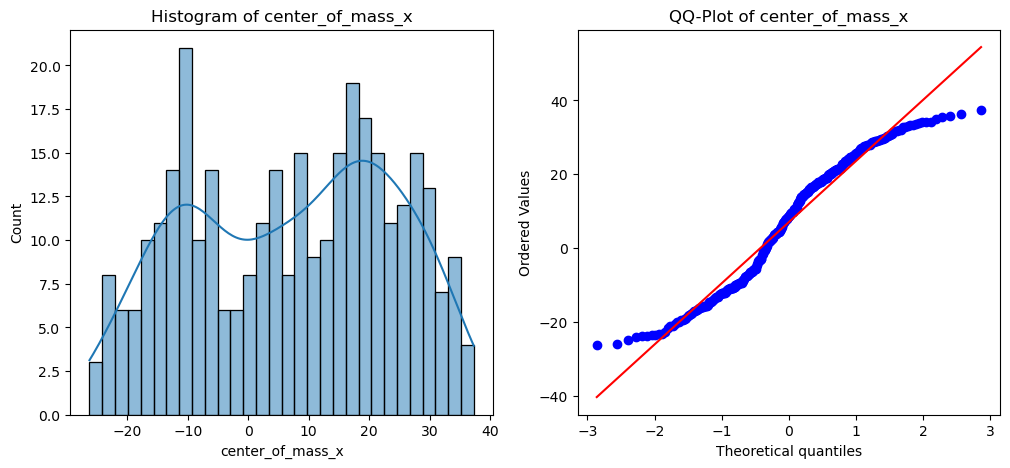

Normality Test Results for center_of_mass_x: {'Shapiro-Wilk': {'Statistic': 0.9572985030828637, 'p-value': 3.6285559074668317e-08, 'Normal': False}, 'Anderson-Darling': {'Statistic': 4.275737291223493, 'Critical Values': [0.569, 0.648, 0.778, 0.907, 1.079], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': False}, "D'Agostino K²": {'Statistic': 147.69255691533536, 'p-value': 8.491193869732295e-33, 'Normal': False}, 'Overall_Normal': False, 'Recommendation': 'Use Normalization'}


In [152]:
# Check normality of a spatial feature
result_x = check_normality(df, "center_of_mass_x", plot=True)
print("Normality Test Results for center_of_mass_x:", result_x)


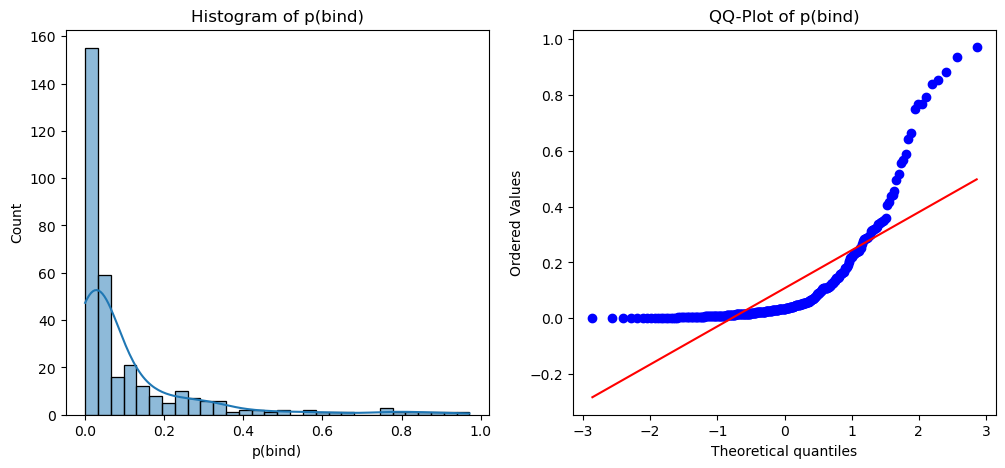

Normality Test Results for p(bind): {'Shapiro-Wilk': {'Statistic': 0.6190483537909827, 'p-value': 2.7383496685056865e-26, 'Normal': False}, 'Anderson-Darling': {'Statistic': 42.156428058822314, 'Critical Values': [0.569, 0.648, 0.778, 0.907, 1.079], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': False}, "D'Agostino K²": {'Statistic': 208.62560980593338, 'p-value': 4.983384978828575e-46, 'Normal': False}, 'Overall_Normal': False, 'Recommendation': 'Use Normalization'}


In [151]:
# Check normality of probability values (p(bind))
result_pbind = check_normality(df, "p(bind)", plot=True)
print("Normality Test Results for p(bind):", result_pbind)

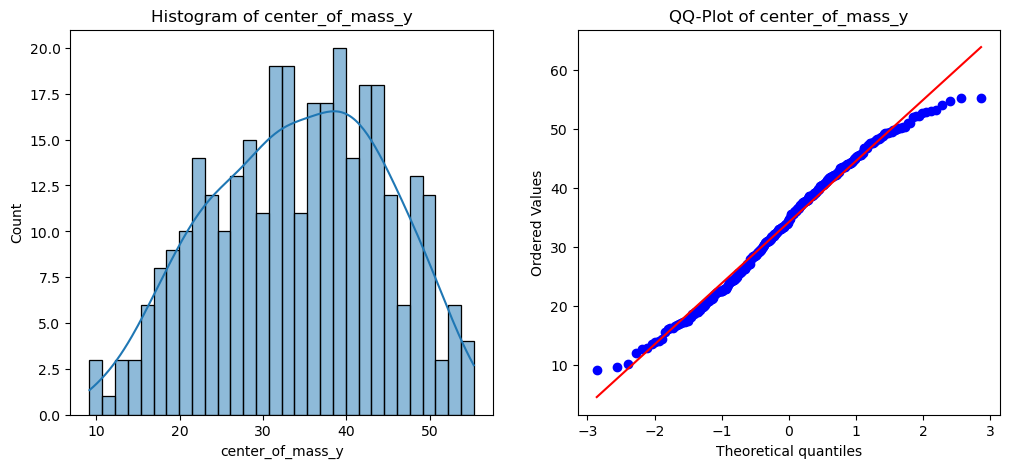

Normality Test Results for center_of_mass_y: {'Shapiro-Wilk': {'Statistic': 0.9851462463375553, 'p-value': 0.001891606213235538, 'Normal': False}, 'Anderson-Darling': {'Statistic': 1.1203938539193814, 'Critical Values': [0.569, 0.648, 0.778, 0.907, 1.079], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': False}, "D'Agostino K²": {'Statistic': 20.281912419591364, 'p-value': 3.9431080407804854e-05, 'Normal': False}, 'Overall_Normal': False, 'Recommendation': 'Use Normalization'}


In [153]:
# Check normality of center of mass y
result_y = check_normality(df, "center_of_mass_y", plot=True)
print("Normality Test Results for center_of_mass_y:", result_y)

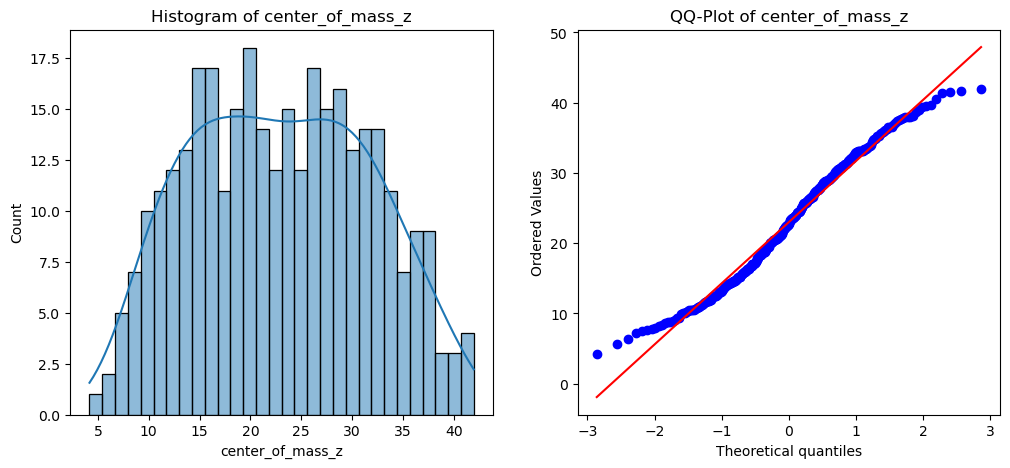

Normality Test Results for center_of_mass_z: {'Shapiro-Wilk': {'Statistic': 0.9794353556900872, 'p-value': 0.00012488852317194392, 'Normal': False}, 'Anderson-Darling': {'Statistic': 1.7244352450933889, 'Critical Values': [0.569, 0.648, 0.778, 0.907, 1.079], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': False}, "D'Agostino K²": {'Statistic': 43.294441054353776, 'p-value': 3.9694613395627163e-10, 'Normal': False}, 'Overall_Normal': False, 'Recommendation': 'Use Normalization'}


In [154]:
# Check normality of center of mass z
result_z = check_normality(df, "center_of_mass_z", plot=True)
print("Normality Test Results for center_of_mass_z:", result_z)

In [181]:
# Normalize and add the Feature Columns
    

def process_and_update_pdb_data(data_path, pdb_code):
    """
    Process a PDB file and corresponding CSV file to extract residue information and update the DataFrame.

    Args:
        data_path (str): Path to the directory containing the PDB and CSV files.
        pdb_code (str): PDB code of the protein.

    Returns:
        pd.DataFrame: Updated DataFrame with extracted residue information.
    """
    try:
        # File paths
        csv_file_path = f"{data_path}/results_{pdb_code}.csv"
        pdb_file_path = f"{data_path}/{pdb_code}.pdb"

        # Read CSV file
        df = pd.read_csv(csv_file_path)

        # Process each residue and compute center of mass
        for index, row in df.iterrows():
            residue_number = row["resi"]
            chain_id = row["chain"]
            coordinates = extract_residue_coordinates(pdb_file_path, residue_number, chain_id)

            if coordinates:
                # Compute center of mass for the residue
                center_of_mass = calculate_weighted_center_of_mass(coordinates)
                df.loc[index, ["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"]] = center_of_mass
            else:
                print(f"Residue {residue_number} in chain {chain_id} not found in {pdb_file_path}. Skipping.")

        # Save updated results
        updated_csv_path = f"{data_path}/results_{pdb_code}_updated.csv"
        df.to_csv(updated_csv_path, index=False)
        print(f"✅ Updated results saved: {updated_csv_path}")

        return df

    except Exception as e:
        print(f"Error processing PDB file for {pdb_code}: {e}")
        return None



def kmeans_clustering_normalize_pbind(df, feature_columns, n_clusters, pbind_column='p(bind)', pbind_weight=1.0):
    """
    Perform KMeans clustering with preprocessing:
    - Standardizes normally distributed features (mean=0, std=1)
    - Normalizes non-normally distributed features (scales between 0 and 1)
    - Adds a weighted `p(bind)` column to clustering.

    Args:
        df (pd.DataFrame): Input DataFrame.
        feature_columns (list): List of feature column names (spatial features).
        n_clusters (int): Number of clusters.
        pbind_column (str, optional): Column containing probability values ('p(bind)'). Defaults to 'p(bind)'.
        pbind_weight (float, optional): Weight factor for the `p(bind)` column. Defaults to 1.0.

    Returns:
        pd.DataFrame: Updated DataFrame with cluster labels.
        KMeans: Fitted KMeans model.
    """

    # Copy features to avoid modifying the original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    for col in feature_columns:
        # Check if the feature is normally distributed
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        
        if p_value > 0.05:  
            # Feature is normally distributed → Apply Standardization (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
        else:  
            # Feature is NOT normally distributed → Apply MinMax Scaling
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
        
        processed_features.append(transformed_feature)

    # Stack transformed features into a matrix
    transformed_features = np.hstack(processed_features)

    # Normalize `p(bind)` and apply weight
    if pbind_column and pbind_column in df.columns:
        pbind_values = df[[pbind_column]].values
        pbind_scaler = MinMaxScaler()
        normalized_pbind = pbind_scaler.fit_transform(pbind_values) * pbind_weight

        # Concatenate `p(bind)` to feature matrix
        final_features = np.hstack((transformed_features, normalized_pbind))
    else:
        final_features = transformed_features  # Use only spatial features if p(bind) is missing

    # Apply KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_cluster_weight'] = kmeans.fit_predict(final_features)

    return df, kmeans


def spectral_clustering_normalize_pbind(df, feature_columns, pbind_column, n_clusters, pbind_weight=1.0):
    """
    Perform Spectral Clustering with preprocessing:
    - Standardizes normally distributed features (mean=0, std=1)
    - Normalizes non-normally distributed features (scales between 0 and 1)
    - Adds a weighted `p(bind)` column to clustering.

    Args:
        df (pd.DataFrame): Input DataFrame.
        feature_columns (list): List of feature column names (spatial features).
        pbind_column (str): Column containing probability values (e.g., 'p(bind)').
        n_clusters (int): Number of clusters.
        pbind_weight (float): Weight multiplier for `p(bind)`.

    Returns:
        pd.DataFrame: Updated DataFrame with cluster labels.
        SpectralClustering: Fitted SpectralClustering model.
    """
    
    features = df[feature_columns].copy()  # Copy features to avoid modifying the original dataframe
    processed_features = []
    print(f"Original data: {feature_columns[:2]}")

    for col in feature_columns:
        # Check if the feature is normally distributed
        stat, p_value = shapiro(df[col])
        
        if p_value > 0.05:  
            # Feature is normally distributed → Apply Standardization (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"Normally dirstributed --> Standardized: {transformed_feature[:2]}")
        else:  
            # Feature is NOT normally distributed → Apply MinMax Scaling
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"NOT Normally dirstributed --> Normalization: {transformed_feature[:2]}")
        
        processed_features.append(transformed_feature)

    # Stack transformed features into a matrix
    transformed_features = np.hstack(processed_features)

    # Normalize `p(bind)` and apply weight
    pbind_values = df[[pbind_column]].values
    print(f"Original p(bind): {pbind_values[:2]}")
    pbind_scaler = MinMaxScaler()
    normalized_pbind = pbind_scaler.fit_transform(pbind_values) * pbind_weight
    print(f"Normalized p(bind): {pbind_scaler.fit_transform(pbind_values)[:2]}")
    print(f"Weighted p(bind): {normalized_pbind[:2]}")

    # Concatenate `p(bind)` to feature matrix
    final_features = np.hstack((transformed_features, normalized_pbind))

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, assign_labels='kmeans')
    df['spectral_cluster_weigth'] = spectral.fit_predict(final_features)

    return df, spectral

# Normalize within clusters
def normalize_within_clusters(df, cluster_column, pbind_column):
    """
    Normalize p(bind) values within each cluster.

    Args:
        df (pd.DataFrame): Input DataFrame.
        cluster_column (str): Column containing cluster IDs.
        pbind_column (str): Column containing p(bind) values.

    Returns:
        pd.DataFrame: Updated DataFrame with normalized p(bind) values.
    """
    df[f"normalized_{pbind_column}"] = df.groupby(cluster_column)[pbind_column].transform(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )
    return df

# Filter by p(bind) cutoff
def filter_by_pbind_cutoff(df, pbind_column, cluster_column, cutoff_method, std_factor):
    """
    Filter residues based on p(bind) cutoff.

    Args:
        df (pd.DataFrame): Input DataFrame.
        pbind_column (str): Column containing p(bind) values.
        cluster_column (str): Column containing cluster IDs.
        cutoff_method (str): Method for calculating cutoff ('median_std' or 'percentile').
        std_factor (float): Factor for standard deviation in cutoff calculation.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    filtered_df = pd.DataFrame()

    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        if cutoff_method == 'median_std':
            median_value = cluster_data[pbind_column].median()
            std_value = cluster_data[pbind_column].std()
            cutoff = median_value + std_factor * std_value
        elif cutoff_method == 'percentile':
            cutoff = cluster_data[pbind_column].quantile(0.95)
        else:
            raise ValueError("Invalid cutoff method. Use 'median_std' or 'percentile'.")

        filtered_cluster = cluster_data[cluster_data[pbind_column] > cutoff]
        filtered_df = pd.concat([filtered_df, filtered_cluster])

    return filtered_df.reset_index(drop=True)

# Evaluate clustering
def evaluate_clustering(pdb_file, df, cluster_column):
    """
    Evaluate clustering by calculating distances between clusters and ligands.

    Args:
        pdb_file (str): Path to the PDB file.
        df (pd.DataFrame): Input DataFrame.
        cluster_column (str): Column containing cluster IDs.

    Returns:
        dict: Distances between clusters and ligands.
    """
    def calculate_cluster_centers():
        cmd.load(pdb_file, "protein")
        cluster_centers = {}
        for cluster_id in df[cluster_column].unique():
            cluster_data = df[df[cluster_column] == cluster_id]
            resi_selection = "+".join(map(str, cluster_data['resi']))
            cmd.select(f"cluster_{cluster_id}", f"resi {resi_selection}")
            center_of_mass = cmd.centerofmass(f"cluster_{cluster_id}")
            cluster_centers[cluster_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("all")
        return cluster_centers

    def calculate_ligand_centers():
        cmd.load(pdb_file, "protein")
        cmd.select("ligands", "organic")
        ligand_centers = {}
        for atom in cmd.get_model("ligands").atom:
            ligand_id = f"{atom.chain}_{atom.resn}_{atom.resi}"
            cmd.select("ligand", f"chain {atom.chain} and resn {atom.resn} and resi {atom.resi}")
            center_of_mass = cmd.centerofmass("ligand")
            ligand_centers[ligand_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("all")
        return ligand_centers

    cluster_centers = calculate_cluster_centers()
    ligand_centers = calculate_ligand_centers()

    distances = {}
    for cluster_id, cluster_center in cluster_centers.items():
        min_distance = float('inf')
        closest_ligand = None

        for ligand_id, ligand_center in ligand_centers.items():
            distance = np.linalg.norm(np.array(cluster_center) - np.array(ligand_center))
            if distance < min_distance:
                min_distance = round(distance, 3)
                closest_ligand = ligand_id

        distances[cluster_id] = (closest_ligand, min_distance)

    return distances

# Run pipeline
def run_pipeline(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the full clustering pipeline.

    Args:
        data_path (str): Path to data directory.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans', 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column containing p(bind) values.
        cutoff_method (str): Method for p(bind) cutoff ('median_std', 'percentile').
        std_factor (float): Standard deviation factor for cutoff.

    Returns:
        dict: Results including clustered DataFrame and evaluation metrics.
    """
    df = process_and_update_pdb_data(data_path, pdb_file.split("/")[-1].split(".")[0])

    if clustering_method == 'kmeans':
        df, _ = kmeans_clustering(df, **cluster_params)
    elif clustering_method == 'spectral':
        df, _ = spectral_clustering(df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans' or 'spectral'.")

    cluster_column = f"{clustering_method}_cluster"
    df = normalize_within_clusters(df, cluster_column=cluster_column, pbind_column=pbind_column)
    df_filtered = filter_by_pbind_cutoff(df, pbind_column=pbind_column, cluster_column=cluster_column, cutoff_method=cutoff_method, std_factor=std_factor)
    evaluation = evaluate_clustering(pdb_file, df_filtered, cluster_column=cluster_column)

    return {
        "clustered_df": df_filtered,
        "evaluation": evaluation
    }


In [176]:
# Run KMeans clustering with automatic normalization and weighted p(bind)
df_clustered, sprectral_model = spectral_clustering_normalize_pbind(
    df,
    feature_columns=["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"],
    n_clusters=2,
    pbind_column="p(bind)",
    pbind_weight=1.0  # Give higher importance to p(bind)
)

df_clustered, sprectral_model = spectral_clustering(
    df,
    feature_columns=["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"],
    n_clusters=2
)

Original data: ['center_of_mass_x', 'center_of_mass_y']
NOT Normally dirstributed --> Normalization: [[0.02183901]
 [0.04268676]]
NOT Normally dirstributed --> Normalization: [[0.62517079]
 [0.68062634]]
NOT Normally dirstributed --> Normalization: [[0.66854512]
 [0.61827658]]
Original p(bind): [[0.03952924]
 [0.0340479 ]]
Normalized p(bind): [[0.04010183]
 [0.03445629]]
Weighted p(bind): [[0.04010183]
 [0.03445629]]


/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[1.22281847e-14 1.26154031e-06 4.94201501e-06]
not reaching the requested tolerance 4.872679710388184e-06.
  _, diffusion_map = lobpcg(



🔹 Running KMeans Clustering with different settings...

🔹 Running Spectral Clustering with different settings...
Original data: ['center_of_mass_x', 'center_of_mass_y']
NOT Normally dirstributed --> Normalization: [[0.02183901]
 [0.04268676]]
NOT Normally dirstributed --> Normalization: [[0.62517079]
 [0.68062634]]
NOT Normally dirstributed --> Normalization: [[0.66854512]
 [0.61827658]]
Original p(bind): [[0.03952924]
 [0.0340479 ]]
Normalized p(bind): [[0.04010183]
 [0.03445629]]
Weighted p(bind): [[0.04010183]
 [0.03445629]]
Original data: ['center_of_mass_x', 'center_of_mass_y']
NOT Normally dirstributed --> Normalization: [[0.02183901]
 [0.04268676]]
NOT Normally dirstributed --> Normalization: [[0.62517079]
 [0.68062634]]
NOT Normally dirstributed --> Normalization: [[0.66854512]
 [0.61827658]]
Original p(bind): [[0.03952924]
 [0.0340479 ]]
Normalized p(bind): [[0.04010183]
 [0.03445629]]
Weighted p(bind): [[0.04010183]
 [0.03445629]]
Original data: ['center_of_mass_x', 'center_

/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 188 with accuracies 
[5.38922839e-15 6.03437959e-07 2.51174017e-05 4.67125279e-06]
not reaching the requested tolerance 4.872679710388184e-06.
Use iteration 93 instead with accuracy 
2.963024526123018e-06.

  _, diffusion_map = lobpcg(
/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.76649983e-15 8.09918289e-07 2.30545138e-06 8.73672844e-06]
not reaching the requested tolerance 4.872679710388184e-06.
  _, diffusion_map = lobpcg(


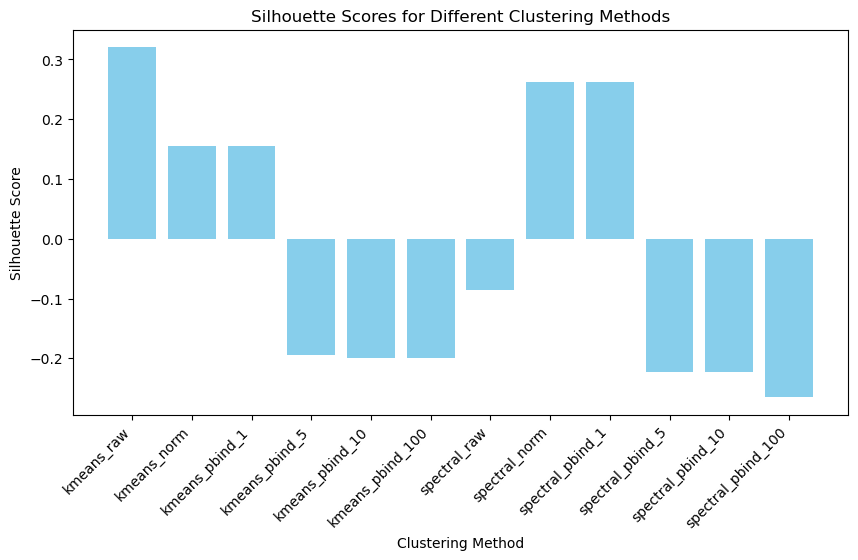

In [189]:


# Define feature columns
feature_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
pbind_column = 'p(bind)'

# Define weights for `p(bind)`
pbind_weights = [1, 5, 10, 100]

# Store results
results = {}

# 2️⃣ **Run KMeans Clustering**
print("\n🔹 Running KMeans Clustering with different settings...")

# Without normalization
df_kmeans_raw, kmeans_raw = kmeans_clustering(df, feature_columns, n_clusters=3)
results["kmeans_raw"] = df_kmeans_raw["kmeans_cluster"]

# With normalization
df_kmeans_norm, kmeans_norm = kmeans_clustering_normalize_pbind(df, feature_columns, n_clusters=3, pbind_weight=1.0)
results["kmeans_norm"] = df_kmeans_norm["kmeans_cluster_weight"]

# With different `p(bind)` weights
for weight in pbind_weights:
    df_kmeans_weighted, _ = kmeans_clustering_normalize_pbind(df, feature_columns, n_clusters=3, pbind_column=pbind_column, pbind_weight=weight)
    results[f"kmeans_pbind_{weight}"] = df_kmeans_weighted["kmeans_cluster_weight"]

# 3️⃣ **Run Spectral Clustering**
print("\n🔹 Running Spectral Clustering with different settings...")

df_spectral_raw, spectral_raw = spectral_clustering(df, feature_columns, n_clusters=3)
results["spectral_raw"] = df_spectral_raw["spectral_cluster"]

df_spectral_norm, spectral_norm = spectral_clustering_normalize_pbind(df, feature_columns, pbind_column, n_clusters=3, pbind_weight=1.0)
results["spectral_norm"] = df_spectral_norm["spectral_cluster_weigth"]

for weight in pbind_weights:
    df_spectral_weighted, _ = spectral_clustering_normalize_pbind(df, feature_columns, pbind_column, n_clusters=3, pbind_weight=weight)
    results[f"spectral_pbind_{weight}"] = df_spectral_weighted["spectral_cluster_weigth"]

# 4️⃣ **Compare the Results**
print("\n🔹 Comparing Clustering Results...")

# Compare cluster counts
for name, clusters in results.items():
    print(f"{name}:")
    print(clusters.value_counts(), "\n")

# Compute **Silhouette Scores**
silhouette_scores = {}
for name, clusters in results.items():
    silhouette_scores[name] = silhouette_score(df[feature_columns], clusters)

print("\n🔹 Silhouette Scores for Different Methods:")
for name, score in silhouette_scores.items():
    print(f"{name}: {score:.4f}")

# Compute **Pairwise Distance Matrices**
print("\n🔹 Computing Distance Matrices...")
for name, clusters in results.items():
    feature_data = df[feature_columns].values
    distance_matrix = euclidean_distances(feature_data)
    print(f"Max distance for {name}:", np.max(distance_matrix))
    print(f"Min distance for {name}:", np.min(distance_matrix), "\n")

# 5️⃣ **Visualizing Results (Optional)**
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Clustering Methods")
plt.show()


🔹 Running KMeans Clustering with different settings...

🔹 Running Spectral Clustering with different settings...
Original data: ['center_of_mass_x', 'center_of_mass_y']
NOT Normally dirstributed --> Normalization: [[0.02183901]
 [0.04268676]]
NOT Normally dirstributed --> Normalization: [[0.62517079]
 [0.68062634]]
NOT Normally dirstributed --> Normalization: [[0.66854512]
 [0.61827658]]
Original p(bind): [[0.03952924]
 [0.0340479 ]]
Normalized p(bind): [[0.04010183]
 [0.03445629]]
Weighted p(bind): [[0.04010183]
 [0.03445629]]
Original data: ['center_of_mass_x', 'center_of_mass_y']
NOT Normally dirstributed --> Normalization: [[0.02183901]
 [0.04268676]]
NOT Normally dirstributed --> Normalization: [[0.62517079]
 [0.68062634]]
NOT Normally dirstributed --> Normalization: [[0.66854512]
 [0.61827658]]
Original p(bind): [[0.03952924]
 [0.0340479 ]]
Normalized p(bind): [[0.04010183]
 [0.03445629]]
Weighted p(bind): [[0.04010183]
 [0.03445629]]
Original data: ['center_of_mass_x', 'center_

/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 188 with accuracies 
[5.38922839e-15 6.03437959e-07 2.51174017e-05 4.67125279e-06]
not reaching the requested tolerance 4.872679710388184e-06.
Use iteration 93 instead with accuracy 
2.963024526123018e-06.

  _, diffusion_map = lobpcg(
/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.76649983e-15 8.09918289e-07 2.30545138e-06 8.73672844e-06]
not reaching the requested tolerance 4.872679710388184e-06.
  _, diffusion_map = lobpcg(
/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1146: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/opt/miniconda3/envs/protein_pp/lib/python3.11/site-packages/mpl_toolkits/m

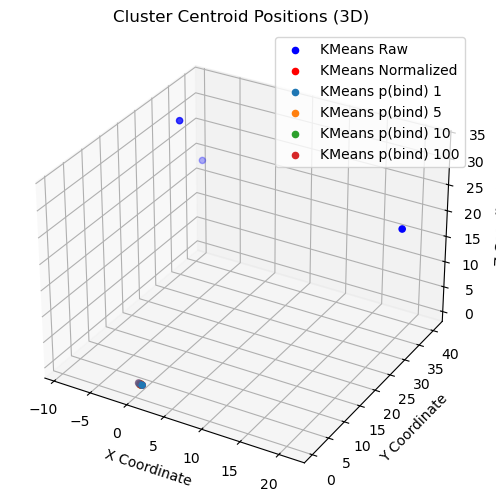

In [190]:
# Store results
results = {}
centroids = {}

# 2️⃣ **Run KMeans Clustering**
print("\n🔹 Running KMeans Clustering with different settings...")

# Without normalization
df_kmeans_raw, kmeans_raw = kmeans_clustering(df, feature_columns, n_clusters=3)
results["kmeans_raw"] = df_kmeans_raw["kmeans_cluster"]
centroids["kmeans_raw"] = kmeans_raw.cluster_centers_

# With normalization
df_kmeans_norm, kmeans_norm = kmeans_clustering_normalize_pbind(df, feature_columns, n_clusters=3, pbind_weight=1.0)
results["kmeans_norm"] = df_kmeans_norm["kmeans_cluster_weight"]
centroids["kmeans_norm"] = kmeans_norm.cluster_centers_

# With different `p(bind)` weights
for weight in pbind_weights:
    df_kmeans_weighted, kmeans_weighted = kmeans_clustering_normalize_pbind(df, feature_columns, n_clusters=3, pbind_column=pbind_column, pbind_weight=weight)
    results[f"kmeans_pbind_{weight}"] = df_kmeans_weighted["kmeans_cluster_weight"]
    centroids[f"kmeans_pbind_{weight}"] = kmeans_weighted.cluster_centers_

# 3️⃣ **Run Spectral Clustering**
print("\n🔹 Running Spectral Clustering with different settings...")

df_spectral_raw, spectral_raw = spectral_clustering(df, feature_columns, n_clusters=3)
results["spectral_raw"] = df_spectral_raw["spectral_cluster"]

df_spectral_norm, spectral_norm = spectral_clustering_normalize_pbind(df, feature_columns, pbind_column, n_clusters=3, pbind_weight=1.0)
results["spectral_norm"] = df_spectral_norm["spectral_cluster_weigth"]

for weight in pbind_weights:
    df_spectral_weighted, _ = spectral_clustering_normalize_pbind(df, feature_columns, pbind_column, n_clusters=3, pbind_weight=weight)
    results[f"spectral_pbind_{weight}"] = df_spectral_weighted["spectral_cluster_weigth"]

# 4️⃣ **Compare the Results**
print("\n🔹 Comparing Clustering Results...")

# Compare cluster counts
for name, clusters in results.items():
    print(f"{name}:")
    print(clusters.value_counts(), "\n")

# Compute **Silhouette Scores**
silhouette_scores = {}
for name, clusters in results.items():
    silhouette_scores[name] = silhouette_score(df[feature_columns], clusters)

print("\n🔹 Silhouette Scores for Different Methods:")
for name, score in silhouette_scores.items():
    print(f"{name}: {score:.4f}")

# Compute **Pairwise Distance Matrices**
print("\n🔹 Computing Distance Matrices...")
for name, clusters in results.items():
    feature_data = df[feature_columns].values
    distance_matrix = euclidean_distances(feature_data)
    print(f"Max distance for {name}:", np.max(distance_matrix))
    print(f"Min distance for {name}:", np.min(distance_matrix), "\n")

# 5️⃣ **Compare Cluster Centroids**
print("\n🔹 Comparing Cluster Centroids...")
for name, centroid_values in centroids.items():
    print(f"{name} Centroids:\n", centroid_values, "\n")

# Compute centroid shifts
def compute_centroid_shift(centroid_1, centroid_2):
    return np.linalg.norm(np.array(centroid_1) - np.array(centroid_2), axis=1)

centroid_shifts = {}
for weight in pbind_weights:
    shift = compute_centroid_shift(centroids["kmeans_norm"], centroids[f"kmeans_pbind_{weight}"])
    centroid_shifts[f"Shift Norm vs pbind_{weight}"] = shift

print("\n🔹 Centroid Shifts due to `p(bind)` Weighting:")
for name, shift in centroid_shifts.items():
    print(f"{name}: {shift}")

# 6️⃣ **Visualizing Centroids in 3D**
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot raw centroids
ax.scatter(*centroids["kmeans_raw"].T, color='blue', label="KMeans Raw")

# Plot normalized centroids
ax.scatter(*centroids["kmeans_norm"].T, color='red', label="KMeans Normalized")

# Plot weighted p(bind) centroids
for weight in pbind_weights:
    ax.scatter(*centroids[f"kmeans_pbind_{weight}"].T, label=f"KMeans p(bind) {weight}")

ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Z Coordinate")
ax.set_title("Cluster Centroid Positions (3D)")
ax.legend()
plt.show()

In [188]:
print("Feature Variance:")
print(df[['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)']].var())

Feature Variance:
center_of_mass_x    282.098401
center_of_mass_y    107.661946
center_of_mass_z     76.368492
p(bind)               0.029839
dtype: float64


In [177]:
df_clustered.spectral_cluster_weigth.value_counts()

spectral_cluster_weigth
0    167
1    160
Name: count, dtype: int64

In [178]:
df_clustered.spectral_cluster.value_counts()

spectral_cluster
0    313
1     14
Name: count, dtype: int64

In [185]:

# Run KMeans clustering with automatic normalization and weighted p(bind)
df_clustered, kmeans_model = kmeans_clustering_normalize_pbind(
    df,
    feature_columns=["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"],
    n_clusters=2,
    pbind_column="p(bind)",
    pbind_weight=10.0  # Give higher importance to p(bind)
)

df_clustered, kmeans_model = kmeans_clustering(
    df,
    feature_columns=["center_of_mass_x", "center_of_mass_y", "center_of_mass_z"],
    n_clusters=2
)

df_clustered.head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_mass_x_normalized,...,p(bind)_weight_10,p(bind)_weight_100,protein_x,protein_y,protein_z,protein_diameter,kmeans_cluster,spectral_cluster_weigth,spectral_cluster,kmeans_cluster_weight
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,0.021839,...,0.401018,4.010183,6.706,34.061,23.333,66.946,1,1,0,0
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,0.042687,...,0.344563,3.445629,6.706,34.061,23.333,66.946,1,1,0,0
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,0.003587,...,0.030300,0.303005,6.706,34.061,23.333,66.946,1,1,0,0
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,0.049547,...,0.055744,0.557440,6.706,34.061,23.333,66.946,1,1,0,0
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,0.056234,...,0.011351,0.113507,6.706,34.061,23.333,66.946,1,1,0,0


In [179]:
df_clustered

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_mass_x_normalized,...,p(bind)_weight_5,p(bind)_weight_10,p(bind)_weight_100,protein_x,protein_y,protein_z,protein_diameter,kmeans_cluster,spectral_cluster_weigth,spectral_cluster
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,0.021839,...,0.200509,0.401018,4.010183,6.706,34.061,23.333,66.946,1,1,0
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,0.042687,...,0.172281,0.344563,3.445629,6.706,34.061,23.333,66.946,1,1,0
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,0.003587,...,0.015150,0.030300,0.303005,6.706,34.061,23.333,66.946,1,1,0
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,0.049547,...,0.027872,0.055744,0.557440,6.706,34.061,23.333,66.946,1,1,0
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,0.056234,...,0.005675,0.011351,0.113507,6.706,34.061,23.333,66.946,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,A,348,F,0.029051,"[('N', -12.056, 38.632, 35.883), ('C', -11.371...",-11.070,40.469,33.250,3hvc,0.239033,...,0.146548,0.293096,2.930955,6.706,34.061,23.333,66.946,1,1,0
3123,A,349,V,0.026582,"[('N', -10.97, 41.931, 35.202), ('C', -11.312,...",-10.757,43.710,35.590,3hvc,0.243958,...,0.133836,0.267673,2.676727,6.706,34.061,23.333,66.946,1,1,0
3124,A,350,P,0.035559,"[('N', -11.373, 44.614, 33.201), ('C', -10.8, ...",-11.266,45.571,32.610,3hvc,0.235949,...,0.180064,0.360128,3.601278,6.706,34.061,23.333,66.946,1,1,0
3125,A,351,P,0.034058,"[('N', -8.813, 46.639, 31.519), ('C', -7.715, ...",-8.268,47.652,31.057,3hvc,0.283120,...,0.172332,0.344663,3.446631,6.706,34.061,23.333,66.946,1,1,0


In [186]:
df_clustered['kmeans_cluster_weight'].value_counts()

kmeans_cluster_weight
0    306
1     21
Name: count, dtype: int64

In [187]:
df_clustered['kmeans_cluster'].value_counts()

kmeans_cluster
0    180
1    147
Name: count, dtype: int64

/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


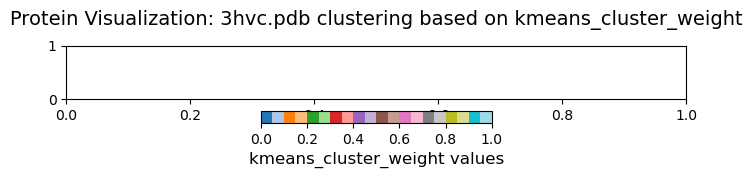

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [69]:
def visualize_protein_ligand_with_column(pdb_file, residue_data, column, title=None, cmap_name='tab20'):
    """
    Visualize a protein structure and ligand with protein colored by a specified column's values.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', column].
        column (str): Name of the column to use for coloring the residues.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'tab20').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} clustering based on {column}"
    
    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[column].min(), vmax=residue_data[column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)
    
    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the column's values
    for _, row in residue_data.iterrows():
        value = row[column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.addStyle({'hetflag': True}, {'stick': {'color': ligand_color}})
    
    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size to match the plot
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

# # Example usage of visualization function

#viewer = visualize_protein_ligand_distance_pbind(pdb_file, df_3hvc_clustered, "normalized_pbind_kmeans_cluster", cluster_centers, ligand_centers, distances, title=None, cmap_name='viridis')
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, 'kmeans_cluster_weight',cmap_name='tab20')

/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


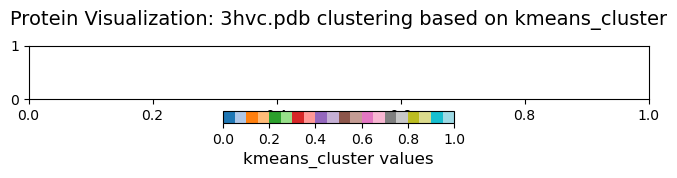

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [70]:
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, 'kmeans_cluster',cmap_name='tab20')

/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


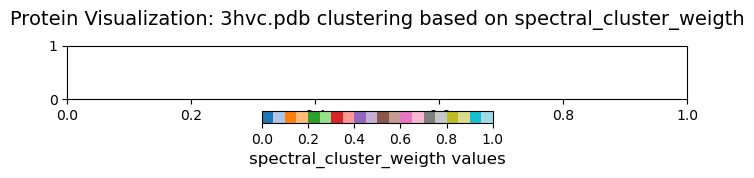

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [82]:
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, 'spectral_cluster_weigth',cmap_name='tab20')

/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
/var/folders/v4/rd2_123918b6cj4v96gtlmkh0000gn/T/ipykernel_2718/1215963420.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


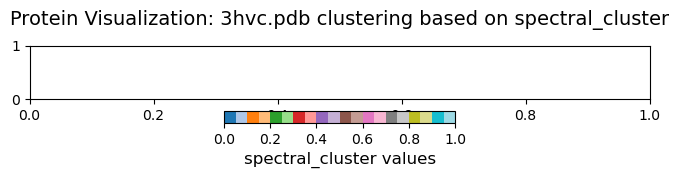

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [72]:
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, 'spectral_cluster',cmap_name='tab20')

### These all 3 functions work!!!!

for the pipeline with Kmeans, Sprectral clustering methods

In [ ]:
# Function to run the clustering pipeline, but only for the Kmeans and spectral clustering methods
def run_pipeline_clus_norm_cutoff(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the entire clustering pipeline for a single PDB file.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans' or 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: Results of the clustering pipeline, including clustered DataFrame, filtered DataFrame, 
              cluster centers, ligand centers, and distances.
    """
    pdb_code = pdb_file.split("/")[-1].split(".")[0]

    # Step 1: Load and preprocess data
    print(f"Processing data for PDB: {pdb_code}")
    df = process_and_update_pdb_data(data_path, pdb_code)

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column '{col}' in DataFrame. Check preprocessing.")

    # Step 2: Apply clustering
    if clustering_method == 'kmeans':
        print(f"Applying KMeans clustering with parameters: {cluster_params}")
        df, _ = kmeans_clustering(df, **cluster_params)
    elif clustering_method == 'spectral':
        print(f"Applying Spectral clustering with parameters: {cluster_params}")
        df, _ = spectral_clustering(df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans' or 'spectral'.")

    # Step 3: Normalize within clusters and filter by p(bind) cutoff
    df = normalize_within_clusters(df, cluster_column=f'{clustering_method}_cluster', pbind_column=pbind_column)
    filtered_df = filter_by_pbind_cutoff(df, pbind_column, f'{clustering_method}_cluster', cutoff_method, std_factor)

    # Step 4: Evaluate clustering (calculate cluster and ligand centers, and distances)
    #print("Calculating cluster centers...")
    cluster_centers_before = calculate_cluster_centers(df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)
    cluster_centers_after = calculate_cluster_centers(filtered_df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)

    print("Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    #print("Calculating distances between clusters and ligands...")
    distances_before_filter = calculate_distances_between_clusters_and_ligands(cluster_centers_before, ligand_centers)
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers_after, ligand_centers)

    # Print distances for debugging
    for cluster_id, (ligand_id, distance) in distances.items():
        print(f"Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance before filtered by {cutoff_method} : {distances_before_filter} Å")
        print(f"Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance before filtered by {cutoff_method} : {distances} Å")

    # Return results
    return {
        "clustered_df": df,
        "filtered_df": filtered_df,
        "cluster_centers": cluster_centers,
        "ligand_centers": ligand_centers,
        "distances_before_filtered": distances_before_filter,
        "distances": distances
    }
    
def run_pipeline_cutoff_clus(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the clustering pipeline where p(bind) cutoff is applied first, followed by clustering.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans' or 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: Results of the clustering pipeline, including filtered DataFrame, clustered DataFrame, 
              cluster centers, ligand centers, and distances.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]  # Extract PDB code from the file path

    # Step 1: Load and preprocess data
    print(f"Processing data for PDB: {pdb_code}")
    df = process_and_update_pdb_data(data_path, pdb_code)
    
    if df is None:
        raise ValueError(f"Error: Data processing failed for PDB {pdb_code}. Check the input files and preprocessing steps.")

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', pbind_column]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column '{col}' in DataFrame. Check preprocessing.")

    # Step 2: Apply p(bind) cutoff
    print(f"Applying p(bind) cutoff using method '{cutoff_method}' with std_factor={std_factor}")
    filtered_df = df.copy()
    if cutoff_method == 'median_std':
        cutoff = df[pbind_column].median() + std_factor * df[pbind_column].std()
    elif cutoff_method == 'percentile':
        cutoff = df[pbind_column].quantile(0.95)
    else:
        raise ValueError("Invalid cutoff method. Use 'median_std' or 'percentile'.")

    # Filter residues based on the calculated cutoff
    filtered_df = df[df[pbind_column] > cutoff]

    if filtered_df.empty:
        print(f"No residues passed the cutoff for PDB: {pdb_code}")
        return {
            "filtered_df": filtered_df,
            "clustered_df": None,
            "cluster_centers": None,
            "ligand_centers": None,
            "distances": None
        }

    # Step 3: Perform clustering on filtered residues
    if clustering_method == 'kmeans':
        print(f"Applying KMeans clustering with parameters: {cluster_params}")
        clustered_df, _ = kmeans_clustering(filtered_df, **cluster_params)
    elif clustering_method == 'spectral':
        print(f"Applying Spectral clustering with parameters: {cluster_params}")
        clustered_df, _ = spectral_clustering(filtered_df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans' or 'spectral'.")

    # Step 4: Evaluate clustering (calculate cluster and ligand centers, and distances)
    print("Calculating cluster centers...")
    cluster_centers = calculate_cluster_centers(clustered_df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)

    print("Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    print("Calculating distances between clusters and ligands...")
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers)

    # Print distances for debugging
    for cluster_id, (ligand_id, distance) in distances.items():
        print(f"Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance: {distance} Å")

    # Return results
    return {
        "filtered_df": filtered_df,
        "clustered_df": clustered_df,
        "cluster_centers": cluster_centers,
        "ligand_centers": ligand_centers,
        "distances": distances
    }
   
def compare_clustering_methods(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Execute both `run_pipeline_cutoff_clus` and `run_pipeline_clus_norm_cutoff` for a given PDB file
    and return the distances calculated from both methods.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans' or 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: A dictionary containing the distances from both methods.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]  # Extract PDB code from the file path

    print(f"\nRunning pipeline for PDB: {pdb_code}")

    # Run the pipeline with p(bind) cutoff first, followed by clustering
    print("\nRunning pipeline: Cutoff first, then clustering...")
    results_cutoff_clus = run_pipeline_cutoff_clus(
        data_path=data_path,
        pdb_file=pdb_file,
        clustering_method=clustering_method,
        cluster_params=cluster_params,
        pbind_column=pbind_column,
        cutoff_method=cutoff_method,
        std_factor=std_factor
    )

    # Run the pipeline with clustering first, followed by normalization and cutoff
    print("\nRunning pipeline: Clustering first, then normalization and cutoff...")
    results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
        data_path=data_path,
        pdb_file=pdb_file,
        clustering_method=clustering_method,
        cluster_params=cluster_params,
        pbind_column=pbind_column,
        cutoff_method=cutoff_method,
        std_factor=std_factor
    )

    # Extract distances from both methods
    distances_cutoff_clus = results_cutoff_clus.get("distances", None)
    distances_clus_norm_cutoff = results_clus_norm_cutoff.get("distances", None)

    # Combine the results into a single dictionary
    comparison_results = {
        "cutoff_clus": distances_cutoff_clus,
        "clus_norm_cutoff": distances_clus_norm_cutoff
    }

    return comparison_results
 

In [ ]:
## Tessting for the Clustering > Normalization > Cutoff pipeline
# Input parameters
pdb_code = "3hvc"
data_path = "/Users/nicha/dev/Protein-preparation-pipeline/data/toy_examples_clustering"
clustering_method = "kmeans"  # Or "spectral"
num_clusters = 2
pbind_column = "p(bind)"
cutoff_method = "median_std"
std_factor = 0.5

# Clustering parameters
cluster_params = {
    'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'],
    'n_clusters': num_clusters
}

# Run pipeline
print(f"Running clustering pipeline for PDB code: {pdb_code}")
results = run_pipeline_clus_norm_cutoff(
    data_path=data_path,
    pdb_file=os.path.join(data_path, f"{pdb_code}.pdb"),
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Access results
clustered_df = results["clustered_df"]
filtered_df = results["filtered_df"]
cluster_centers = results["cluster_centers"]
ligand_centers = results["ligand_centers"]
distances_before = results["distances_before_filtered"]
distances = results["distances"]

print(f"distances_before: {distances_before}")
print(f"distances_after: {distances}")


# Visualization
# print("\nVisualizing clustering results...")
# visualize_protein_ligand_distance(
#     pdb_file=os.path.join(data_path, f"{pdb_code}.pdb"),
#     residue_data=clustered_df,
#     column=pbind_column,  # Color based on p(bind)
#     cluster_centers=cluster_centers,
#     ligand_centers=ligand_centers,
#     distances=distances,
#     title=f"Protein Clustering Visualization: {pdb_code}"
# )

In [136]:
dfs["3hvc"].head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_protein_x,center_of_protein_y,center_of_protein_z,diameter
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,6.706,34.061,23.333,66.946
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,6.706,34.061,23.333,66.946
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,6.706,34.061,23.333,66.946
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,6.706,34.061,23.333,66.946
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,6.706,34.061,23.333,66.946


### Working QT Clustering 

In [137]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize_features(df, feature_columns):
    """
    Normalize or standardize features based on their distribution.

    - Standardize (Z-score) if normally distributed (Shapiro-Wilk test, p > 0.05).
    - Normalize (MinMax scaling) if not normally distributed (Shapiro-Wilk test, p < 0.05).

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names to process.

    Returns:
        pd.DataFrame: New DataFrame with transformed features.
    """
    # Copy DataFrame to avoid modifying original data
    transformed_df = df.copy()
    
    print("\n🔹 Normalizing Features Based on Distribution\n")
    
    for col in feature_columns:
        # Skip processing if column has NaN values
        if df[col].isna().all():
            print(f"⚠ Skipping '{col}' (all values are NaN)")
            continue

        # Check if the feature is normally distributed
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs for test
        
        if p_value > 0.05:  
            # Feature is normally distributed → Apply Standardization (Z-score)
            scaler = StandardScaler()
            transformed_df[col] = scaler.fit_transform(df[[col]])
            print(f"✔ Standardized '{col}' (mean=0, std=1)")
        else:  
            # Feature is NOT normally distributed → Apply MinMax Scaling
            scaler = MinMaxScaler()
            transformed_df[col] = scaler.fit_transform(df[[col]])
            print(f"✔ Normalized '{col}' (scaled 0-1)")

    return transformed_df
def find_best_cluster(idx, remaining_points, dist_matrix, max_diameter):
    """
    Finds the best possible cluster centered around a given index point.
    
    Args:
        idx (int): Index of the point to form a cluster around.
        remaining_points (set): Indices of available points.
        dist_matrix (np.array): Precomputed pairwise distance matrix.
        max_diameter (float): The maximum allowed cluster diameter.
    
    Returns:
        set: Best cluster formed around the given index.
    """
    candidate_cluster = {idx}
    candidate_remaining = remaining_points - candidate_cluster
    
    while True:
        # Find valid points that can be added to the cluster
        nearest_points = [
            i for i in candidate_remaining 
            if max(dist_matrix[i, list(candidate_cluster)]) <= max_diameter
        ]
        
        if not nearest_points:
            break
        
        # Add the point that maintains the smallest cluster diameter
        best_new_point = min(nearest_points, key=lambda i: max(dist_matrix[i, list(candidate_cluster)]))
        candidate_cluster.add(best_new_point)
        candidate_remaining.remove(best_new_point)
    
    return candidate_cluster

def qt_clustering(df, feature_columns, max_diameter, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with parallel processing.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names.
        max_diameter (float): The maximum allowed diameter for a cluster.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with cluster labels.
    """
    points = df[feature_columns].values
    print(f"Number of points: {len(points)}")
    print(points)
    num_points = len(points)
    labels = np.full(num_points, -1)  # Initialize all points as unassigned (-1)

    # Precompute pairwise distances using a distance matrix (faster than calculating repeatedly)
    dist_matrix = distance_matrix(points, points)
    print(f"Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix)

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels to the best cluster found
        for point in best_cluster:
            labels[point] = cluster_id

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster'] = labels
    return df

from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.parallel import Parallel, delayed
from scipy.spatial.distance import pdist, squareform

def qt_clustering_normalized(df, feature_columns, max_diameter, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with proper feature scaling:
    - Standardizes normally distributed features (mean=0, std=1)
    - Normalizes non-normally distributed features (scales between 0 and 1)

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial features).
        max_diameter (float): The maximum allowed diameter for a cluster.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Copy features to avoid modifying the original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    for col in feature_columns:
        # Check if the feature is normally distributed
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        
        if p_value > 0.05:  
            # Feature is normally distributed → Apply Standardization (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
        else:  
            # Feature is NOT normally distributed → Apply MinMax Scaling
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
        
        processed_features.append(transformed_feature)

    points = processed_features
    print(f"Number of points: {len(points)}")
    print(points)
    num_points = len(points)
    labels = np.full(num_points, -1)  # Initialize all points as unassigned (-1)

    # Precompute pairwise distances using a distance matrix (faster than calculating repeatedly)
    dist_matrix = distance_matrix(points, points)
    print(f"Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix)


    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster_normalize'] = labels
    return df


def qt_clustering_debug(df, feature_columns, max_diameter, pbind_column='p(bind)', pbind_weight=1.0, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with feature normalization/standardization and `p(bind)` weighting.
    Debugging features included to print out data at each step.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial features).
        max_diameter (float): The maximum allowed diameter for a cluster.
        pbind_column (str, optional): Column containing probability values ('p(bind)'). Defaults to 'p(bind)'.
        pbind_weight (float, optional): Weight factor for `p(bind)`. Defaults to 1.0.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Copy features to avoid modifying the original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    print("\n🔹 Step 1: Checking Distribution and Transforming Features\n")
    
    for col in feature_columns:
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        print(f"Feature '{col}': Shapiro-Wilk p-value = {p_value:.5f}")

        if p_value > 0.05:  
            # Feature is normally distributed → Standardize (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Standardized '{col}' (mean=0, std=1)")
        else:  
            # Feature is NOT normally distributed → Normalize (0-1)
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Normalized '{col}' (scaled 0-1)")

        processed_features.append(transformed_feature)

    # Stack transformed features into a matrix
    transformed_features = np.hstack(processed_features)

    print("\n🔹 Step 2: Processing `p(bind)` Column\n")
    
    # Normalize `p(bind)` and apply weight
    if pbind_column and pbind_column in df.columns:
        pbind_values = df[[pbind_column]].values
        pbind_scaler = MinMaxScaler()
        normalized_pbind = pbind_scaler.fit_transform(pbind_values) * pbind_weight

        # Concatenate `p(bind)` to feature matrix
        final_features = np.hstack((transformed_features, normalized_pbind))
        print(f"✔ `p(bind)` normalized and weighted by {pbind_weight}")
    else:
        final_features = transformed_features  # Use only spatial features if p(bind) is missing
        print("⚠ `p(bind)` column not found or missing in DataFrame")

    print("\n🔹 Step 3: Preview of Final Processed Features\n")
    print(pd.DataFrame(final_features, columns=feature_columns + [pbind_column]))

    print("\n🔹 Step 4: Computing Distance Matrix\n")
    dist_matrix = squareform(pdist(final_features, metric="euclidean"))
    print(f"✔ Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix)

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    print("\n🔹 Step 5: Running Clustering Algorithm\n")

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        print(f"✔ Cluster {cluster_id} assigned to {len(best_cluster)} points")

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster_debug'] = labels

    print("\n🔹 Step 6: Final Cluster Counts\n")
    print(df['qt_cluster_debug'].value_counts())

    return df

In [145]:
df = dfs["3hvc"]
df.head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_protein_x,center_of_protein_y,center_of_protein_z,diameter
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,6.706,34.061,23.333,66.946
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,6.706,34.061,23.333,66.946
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,6.706,34.061,23.333,66.946
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,6.706,34.061,23.333,66.946
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,6.706,34.061,23.333,66.946


In [146]:
df_new = normalize_features(df_new, ["center_of_mass_x", "center_of_mass_y", "center_of_mass_z","p(bind)"])

df_new.head()


🔹 Normalizing Features Based on Distribution

✔ Normalized 'center_of_mass_x' (scaled 0-1)
✔ Normalized 'center_of_mass_y' (scaled 0-1)
✔ Normalized 'center_of_mass_z' (scaled 0-1)
✔ Normalized 'p(bind)' (scaled 0-1)


,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_protein_x,center_of_protein_y,center_of_protein_z,diameter
2800,A,5,R,0.040102,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",0.021839,0.625171,0.668545,3hvc,6.706,34.061,23.333,66.946
2801,A,6,P,0.034456,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",0.042687,0.680626,0.618277,3hvc,6.706,34.061,23.333,66.946
2802,A,7,T,0.003030,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",0.003587,0.684292,0.517528,3hvc,6.706,34.061,23.333,66.946
2803,A,8,F,0.005574,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",0.049547,0.604502,0.506866,3hvc,6.706,34.061,23.333,66.946
2804,A,9,Y,0.001135,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",0.056234,0.635277,0.341059,3hvc,6.706,34.061,23.333,66.946


In [127]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from scipy.spatial.distance import pdist, squareform
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def qt_clustering_normalized(df, feature_columns, max_diameter, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with proper feature scaling:
    - Standardizes normally distributed features (mean=0, std=1)
    - Normalizes non-normally distributed features (scales between 0 and 1)

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial features).
        max_diameter (float): The maximum allowed diameter for a cluster.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Copy features to avoid modifying the original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    print("\n🔹 Step 1: Checking Distribution and Transforming Features\n")
    
    for col in feature_columns:
        # Check if the feature is normally distributed
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        
        if p_value > 0.05:  
            # Feature is normally distributed → Apply Standardization (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Standardized '{col}' (mean=0, std=1)")
        else:  
            # Feature is NOT normally distributed → Apply MinMax Scaling
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Normalized '{col}' (scaled 0-1)")
        
        processed_features.append(transformed_feature)

    # Convert processed features into a NumPy array
    points = np.hstack(processed_features)

    print("\n🔹 Step 2: Preview of Processed Features\n")
    print(pd.DataFrame(points, columns=feature_columns).head())  # Print first few rows

    print("\n🔹 Step 3: Computing Distance Matrix\n")
    dist_matrix = squareform(pdist(points, metric="euclidean"))
    
    print(f"✔ Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix[:5, :5])  # Print a small part of the distance matrix

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    print("\n🔹 Step 4: Running Clustering Algorithm\n")

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        print(f"✔ Cluster {cluster_id} assigned to {len(best_cluster)} points")

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster_normalize'] = labels

    print("\n🔹 Step 5: Final Cluster Counts\n")
    print(df['qt_cluster_normalize'].value_counts())

    return df

df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 33
df_clustered = qt_clustering_normalized(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], max_diameter=diameter_threshold)

df_clustered["qt_cluster_normalize"].value_counts()


🔹 Step 1: Checking Distribution and Transforming Features

✔ Normalized 'center_of_mass_x' (scaled 0-1)
✔ Normalized 'center_of_mass_y' (scaled 0-1)
✔ Normalized 'center_of_mass_z' (scaled 0-1)

🔹 Step 2: Preview of Processed Features

   center_of_mass_x  center_of_mass_y  center_of_mass_z
0          0.021839          0.625171          0.668545
1          0.042687          0.680626          0.618277
2          0.003587          0.684292          0.517528
3          0.049547          0.604502          0.506866
4          0.056234          0.635277          0.341059

🔹 Step 3: Computing Distance Matrix

✔ Distance matrix shape: (327, 327)
[[0.         0.07769732 0.16320112 0.16533351 0.3294426 ]
 [0.07769732 0.         0.10813188 0.13510855 0.281229  ]
 [0.16320112 0.10813188 0.         0.09269451 0.19056593]
 [0.16533351 0.13510855 0.09269451 0.         0.16877117]
 [0.3294426  0.281229   0.19056593 0.16877117 0.        ]]

🔹 Step 4: Running Clustering Algorithm

✔ Cluster 0 assigned 

qt_cluster_normalize
0    327
Name: count, dtype: int64

In [119]:
df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30

feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
qt_weight = qt_clustering_normalized_weight(df_example, feature_columns, 30, pbind_weight=10, n_jobs=-2)
qt_weight.head()

,chain,resi,resn,p(bind),resn_coordinates,center_of_mass_x,center_of_mass_y,center_of_mass_z,PDBcode,center_of_protein_x,center_of_protein_y,center_of_protein_z,diameter,kmeans_cluster_weight,kmeans_cluster,spectral_cluster_weigth,spectral_cluster,qt_cluster,qt_cluster_weight,qt_cluster_debug
2800,A,5,R,0.039529,"[('N', -25.396, 40.797, 31.959), ('C', -24.583...",-24.874,37.998,29.439,3hvc,6.706,34.061,23.333,66.946,0,1,1,0,1,0,0
2801,A,6,P,0.034048,"[('N', -23.821, 40.802, 28.731), ('C', -23.962...",-23.549,40.555,27.539,3hvc,6.706,34.061,23.333,66.946,0,1,1,0,1,0,0
2802,A,7,T,0.003536,"[('N', -25.119, 41.01, 25.284), ('C', -25.87, ...",-26.034,40.724,23.731,3hvc,6.706,34.061,23.333,66.946,0,1,1,0,1,0,0
2803,A,8,F,0.006006,"[('N', -24.936, 38.419, 23.024), ('C', -24.062...",-23.113,37.045,23.328,3hvc,6.706,34.061,23.333,66.946,0,1,1,0,1,0,0
2804,A,9,Y,0.001696,"[('N', -24.022, 37.366, 19.664), ('C', -24.59,...",-22.688,38.464,17.061,3hvc,6.706,34.061,23.333,66.946,0,1,1,0,1,0,0


In [120]:
qt_weight['qt_cluster_weight'].value_counts()

qt_cluster_weight
0    327
Name: count, dtype: int64

In [104]:
def find_best_cluster_debug(idx, remaining_points, dist_matrix, max_diameter):
    """
    Finds the best possible cluster centered around a given index point.
    Debugging included.

    Args:
        idx (int): Index of the point to form a cluster around.
        remaining_points (set): Indices of available points.
        dist_matrix (np.array): Precomputed pairwise distance matrix.
        max_diameter (float): The maximum allowed cluster diameter.

    Returns:
        set: Best cluster formed around the given index.
    """
    candidate_cluster = {idx}
    candidate_remaining = remaining_points - candidate_cluster

    print(f"\n🔍 Evaluating Cluster Around Point {idx}")

    while True:
        # Find valid points that can be added to the cluster
        nearest_points = [
            i for i in candidate_remaining 
            if max(dist_matrix[i, list(candidate_cluster)]) <= max_diameter
        ]
        
        if not nearest_points:
            break
        
        # Add the point that maintains the smallest cluster diameter
        best_new_point = min(nearest_points, key=lambda i: max(dist_matrix[i, list(candidate_cluster)]))
        candidate_cluster.add(best_new_point)
        candidate_remaining.remove(best_new_point)
    
    print(f"✔ Formed cluster of size {len(candidate_cluster)} around point {idx}")
    return candidate_cluster

In [109]:
from scipy.spatial.distance import pdist, squareform
from joblib import Parallel, delayed
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def qt_clustering_debug(df, feature_columns, max_diameter, pbind_column='p(bind)', pbind_weight=1.0, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with feature normalization/standardization and `p(bind)` weighting.
    Debugging included to track data transformations and clustering.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial features).
        max_diameter (float): The maximum allowed diameter for a cluster.
        pbind_column (str, optional): Column containing probability values ('p(bind)'). Defaults to 'p(bind)'.
        pbind_weight (float, optional): Weight factor for `p(bind)`. Defaults to 1.0.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Copy features to avoid modifying original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    print("\n🔹 Step 1: Checking Distribution and Transforming Features\n")
    
    for col in feature_columns:
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        print(f"Feature '{col}': Shapiro-Wilk p-value = {p_value:.5f}")

        if p_value > 0.05:  
            # Feature is normally distributed → Standardize (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Standardized '{col}' (mean=0, std=1)")
        else:  
            # Feature is NOT normally distributed → Normalize (0-1)
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Normalized '{col}' (scaled 0-1)")

        processed_features.append(transformed_feature)

    # Stack transformed features into a matrix
    transformed_features = np.hstack(processed_features)

    print("\n🔹 Step 2: Processing `p(bind)` Column\n")
    
    # Normalize `p(bind)` and apply weight
    if pbind_column and pbind_column in df.columns:
        pbind_values = df[[pbind_column]].values
        pbind_scaler = MinMaxScaler()
        normalized_pbind = pbind_scaler.fit_transform(pbind_values) * pbind_weight

        # Concatenate `p(bind)` to feature matrix
        final_features = np.hstack((transformed_features, normalized_pbind))
        print(f"✔ `p(bind)` normalized and weighted by {pbind_weight}")
    else:
        final_features = transformed_features  # Use only spatial features if p(bind) is missing
        print("⚠ `p(bind)` column not found or missing in DataFrame")

    print("\n🔹 Step 3: Preview of Final Processed Features\n")
    print(pd.DataFrame(final_features, columns=feature_columns + [pbind_column]))

    print("\n🔹 Step 4: Computing Distance Matrix\n")
    dist_matrix = squareform(pdist(final_features, metric="euclidean"))
    
    # Print a sample of the distance matrix
    print(f"✔ Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix[:5, :5])  # Print first 5 rows and columns

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    print("\n🔹 Step 5: Running Clustering Algorithm\n")

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        print(f"✔ Cluster {cluster_id} assigned to {len(best_cluster)} points")

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster_debug'] = labels

    print("\n🔹 Step 6: Final Cluster Counts\n")
    print(df['qt_cluster_debug'].value_counts())

    return df

In [110]:
# Define parameters
feature_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
pbind_column = 'p(bind)'
max_diameter = 33
pbind_weight = 2.0  # Increase the influence of p(bind)

# Run QT Clustering with Debugging
qt_df = qt_clustering_debug(df, feature_columns, max_diameter, pbind_column, pbind_weight)

qt_df.qt_cluster_debug.value_counts()


🔹 Step 1: Checking Distribution and Transforming Features

Feature 'center_of_mass_x': Shapiro-Wilk p-value = 0.00000
✔ Normalized 'center_of_mass_x' (scaled 0-1)
Feature 'center_of_mass_y': Shapiro-Wilk p-value = 0.00189
✔ Normalized 'center_of_mass_y' (scaled 0-1)
Feature 'center_of_mass_z': Shapiro-Wilk p-value = 0.00012
✔ Normalized 'center_of_mass_z' (scaled 0-1)

🔹 Step 2: Processing `p(bind)` Column

✔ `p(bind)` normalized and weighted by 2.0

🔹 Step 3: Preview of Final Processed Features

     center_of_mass_x  center_of_mass_y  center_of_mass_z   p(bind)
0            0.021839          0.625171          0.668545  0.080204
1            0.042687          0.680626          0.618277  0.068913
2            0.003587          0.684292          0.517528  0.006060
3            0.049547          0.604502          0.506866  0.011149
4            0.056234          0.635277          0.341059  0.002270
..                ...               ...               ...       ...
322          0.239033

qt_cluster_debug
0    327
Name: count, dtype: int64

In [111]:
from scipy.spatial.distance import pdist, squareform
from joblib import Parallel, delayed
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def qt_clustering_debug(df, feature_columns, max_diameter, pbind_column='p(bind)', pbind_weight=1.0, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with feature normalization/standardization and `p(bind)` weighting.
    Debugging included to track data transformations and clustering.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial features).
        max_diameter (float): The maximum allowed diameter for a cluster.
        pbind_column (str, optional): Column containing probability values ('p(bind)'). Defaults to 'p(bind)'.
        pbind_weight (float, optional): Weight factor for `p(bind)`. Defaults to 1.0.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Copy features to avoid modifying original dataframe
    features = df[feature_columns].copy()
    processed_features = []

    print("\n🔹 Step 1: Checking Distribution and Transforming Features\n")
    
    for col in feature_columns:
        stat, p_value = shapiro(df[col].dropna())  # Drop NaNs to avoid issues
        print(f"Feature '{col}': Shapiro-Wilk p-value = {p_value:.5f}")

        if p_value > 0.05:  
            # Feature is normally distributed → Standardize (Z-score)
            scaler = StandardScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Standardized '{col}' (mean=0, std=1)")
        else:  
            # Feature is NOT normally distributed → Normalize (0-1)
            scaler = MinMaxScaler()
            transformed_feature = scaler.fit_transform(df[[col]])
            print(f"✔ Normalized '{col}' (scaled 0-1)")

        processed_features.append(transformed_feature)

    # Stack transformed features into a matrix
    transformed_features = np.hstack(processed_features)

    print("\n🔹 Step 2: Processing `p(bind)` Column\n")
    
    # Normalize `p(bind)` and apply weight
    if pbind_column and pbind_column in df.columns:
        pbind_values = df[[pbind_column]].values
        pbind_scaler = MinMaxScaler()
        normalized_pbind = pbind_scaler.fit_transform(pbind_values) * pbind_weight

        # Concatenate `p(bind)` to feature matrix
        final_features = np.hstack((transformed_features, normalized_pbind))
        print(f"✔ `p(bind)` normalized and weighted by {pbind_weight}")
    else:
        final_features = transformed_features  # Use only spatial features if p(bind) is missing
        print("⚠ `p(bind)` column not found or missing in DataFrame")

    print("\n🔹 Step 3: Preview of Final Processed Features\n")
    print(pd.DataFrame(final_features, columns=feature_columns + [pbind_column]))

    print("\n🔹 Step 4: Computing Distance Matrix\n")
    dist_matrix = squareform(pdist(final_features, metric="euclidean"))
    
    # Print a sample of the distance matrix
    print(f"✔ Distance matrix shape: {dist_matrix.shape}")
    print(dist_matrix[:5, :5])  # Print first 5 rows and columns

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    print("\n🔹 Step 5: Running Clustering Algorithm\n")

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster_debug)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        print(f"✔ Cluster {cluster_id} assigned to {len(best_cluster)} points")

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster'] = labels

    print("\n🔹 Step 6: Final Cluster Counts\n")
    print(df['qt_cluster'].value_counts())

    return df

def find_best_cluster_debug(idx, remaining_points, dist_matrix, max_diameter):
    """
    Finds the best possible cluster centered around a given index point.
    Debugging included.

    Args:
        idx (int): Index of the point to form a cluster around.
        remaining_points (set): Indices of available points.
        dist_matrix (np.array): Precomputed pairwise distance matrix.
        max_diameter (float): The maximum allowed cluster diameter.

    Returns:
        set: Best cluster formed around the given index.
    """
    candidate_cluster = {idx}
    candidate_remaining = remaining_points - candidate_cluster

    print(f"\n🔍 Evaluating Cluster Around Point {idx}")

    while True:
        # Find valid points that can be added to the cluster
        nearest_points = [
            i for i in candidate_remaining 
            if max(dist_matrix[i, list(candidate_cluster)]) <= max_diameter
        ]
        
        if not nearest_points:
            break
        
        # Add the point that maintains the smallest cluster diameter
        best_new_point = min(nearest_points, key=lambda i: max(dist_matrix[i, list(candidate_cluster)]))
        candidate_cluster.add(best_new_point)
        candidate_remaining.remove(best_new_point)
    
    print(f"✔ Formed cluster of size {len(candidate_cluster)} around point {idx}")
    return candidate_cluster

In [112]:
df = dfs["3hvc"]

In [113]:
qt_df_debug = qt_clustering_debug(
    df, 
    feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
    max_diameter=33, 
    pbind_column='p(bind)', 
    pbind_weight=1.5
)


🔹 Step 1: Checking Distribution and Transforming Features

Feature 'center_of_mass_x': Shapiro-Wilk p-value = 0.00000
✔ Normalized 'center_of_mass_x' (scaled 0-1)
Feature 'center_of_mass_y': Shapiro-Wilk p-value = 0.00189
✔ Normalized 'center_of_mass_y' (scaled 0-1)
Feature 'center_of_mass_z': Shapiro-Wilk p-value = 0.00012
✔ Normalized 'center_of_mass_z' (scaled 0-1)

🔹 Step 2: Processing `p(bind)` Column

✔ `p(bind)` normalized and weighted by 1.5

🔹 Step 3: Preview of Final Processed Features

     center_of_mass_x  center_of_mass_y  center_of_mass_z   p(bind)
0            0.021839          0.625171          0.668545  0.060153
1            0.042687          0.680626          0.618277  0.051684
2            0.003587          0.684292          0.517528  0.004545
3            0.049547          0.604502          0.506866  0.008362
4            0.056234          0.635277          0.341059  0.001703
..                ...               ...               ...       ...
322          0.239033

In [148]:
# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30
df_qt_nor = qt_clustering(df_new, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)'], max_diameter=diameter_threshold)

df_qt_nor["qt_cluster"].value_counts()

Number of points: 327
[[0.02183901 0.62517079 0.66854512 0.04010183]
 [0.04268676 0.68062634 0.61827658 0.03445629]
 [0.00358739 0.68429157 0.51752785 0.00303005]
 ...
 [0.2359494  0.78941205 0.75244067 0.03601278]
 [0.2831204  0.83454423 0.71135275 0.03446631]
 [0.29986154 0.90743673 0.74497976 0.02627334]]
Distance matrix shape: (327, 327)
[[0.         0.07790215 0.16735867 ... 0.28261924 0.33759362 0.40373762]
 [0.07790215 0.         0.112606   ... 0.25920494 0.30027025 0.36565349]
 [0.16735867 0.112606   0.         ... 0.34830204 0.37319017 0.43571408]
 ...
 [0.28261924 0.25920494 0.34830204 ... 0.         0.07715326 0.134778  ]
 [0.33759362 0.30027025 0.37319017 ... 0.07715326 0.         0.08241045]
 [0.40373762 0.36565349 0.43571408 ... 0.134778   0.08241045 0.        ]]


qt_cluster
0    327
Name: count, dtype: int64

In [149]:
df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30
df_clustered = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], max_diameter=diameter_threshold)

df_clustered["qt_cluster"].value_counts()

Number of points: 327
[[-24.874  37.998  29.439]
 [-23.549  40.555  27.539]
 [-26.034  40.724  23.731]
 [-23.113  37.045  23.328]
 [-22.688  38.464  17.061]
 [-24.025  31.304  16.256]
 [-20.528  34.603  13.067]
 [-19.911  29.518  10.198]
 [-16.129  32.4    10.427]
 [-13.359  29.519   8.141]
 [-15.609  24.677   8.618]
 [-15.361  28.27   13.063]
 [-19.02   28.658  15.492]
 [-15.832  32.995  15.997]
 [-21.037  32.215  20.265]
 [-19.342  37.466  20.04 ]
 [-19.974  40.13   22.321]
 [-23.862  43.381  20.409]
 [-17.737  45.257  22.792]
 [-16.317  42.737  20.551]
 [-19.296  44.127  15.04 ]
 [-15.915  43.533  10.848]
 [-15.58   39.286  13.022]
 [-11.917  39.147  10.098]
 [-10.484  35.946   9.326]
 [ -5.915  36.685  10.807]
 [ -5.722  33.118  11.88 ]
 [ -4.304  30.404  13.602]
 [ -6.642  28.671  17.527]
 [ -9.011  30.835  15.838]
 [ -7.559  34.871  15.162]
 [-11.024  37.022  14.171]
 [-10.403  40.759  13.184]
 [-12.19   43.399  15.153]
 [-14.505  48.163  15.779]
 [-14.458  47.634  20.449]
 [-18.

qt_cluster
0    103
1     86
2     63
3     38
4     17
5     12
6      4
7      3
8      1
Name: count, dtype: int64

In [ ]:
df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30
df_clustered = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], max_diameter=diameter_threshold)

df_clustered["qt_cluster"].value_counts()

In [150]:
df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30
df_clu = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)'], max_diameter=diameter_threshold)

df_clu["qt_cluster"].value_counts()

Number of points: 327
[[-2.4874000e+01  3.7998000e+01  2.9439000e+01  3.9529245e-02]
 [-2.3549000e+01  4.0555000e+01  2.7539000e+01  3.4047898e-02]
 [-2.6034000e+01  4.0724000e+01  2.3731000e+01  3.5355922e-03]
 ...
 [-1.1266000e+01  4.5571000e+01  3.2610000e+01  3.5559114e-02]
 [-8.2680000e+00  4.7652000e+01  3.1057000e+01  3.4057620e-02]
 [-7.2040000e+00  5.1013000e+01  3.2328000e+01  2.6102923e-02]]
Distance matrix shape: (327, 327)
[[ 0.          3.45020348  6.43111464 ... 15.89286789 19.2763302
  22.13516718]
 [ 3.45020348  0.          4.55033856 ... 14.20378077 17.21199274
  19.98657983]
 [ 6.43111464  4.55033856  0.         ... 17.90041618 20.4279012
  23.11582443]
 ...
 [15.89286789 14.20378077 17.90041618 ...  0.          3.96615384
   6.79667723]
 [19.2763302  17.21199274 20.4279012  ...  3.96615384  0.
   3.74752202]
 [22.13516718 19.98657983 23.11582443 ...  6.79667723  3.74752202
   0.        ]]


qt_cluster
0    103
1     86
2     63
3     38
4     17
5     12
6      4
7      3
8      1
Name: count, dtype: int64

In [ ]:
qt_df.head()

In [ ]:
qt_df.qt_cluster_weight_10.value_counts()

In [116]:
df_example = dfs["3hvc"]

# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 30
df_clustered = qt_clustering_normalized_weight(df_example, 
                             feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)'], 
                             max_diameter=diameter_threshold)

df_clustered["qt_cluster_weight"].value_counts()

qt_cluster_weight
0    327
Name: count, dtype: int64

In [ ]:
df_clustered["qt_cluster"].value_counts()

In [ ]:
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, column='qt_cluster', title="Protein Visualization: QT Clustering", cmap_name='tab20')

In [ ]:
viewer = visualize_protein_ligand_with_column(pdb_file, qt_weight, column='qt_cluster', title="Protein Visualization: QT Clustering", cmap_name='tab20')

In [ ]:
# Run QT clustering with a diameter threshold of 0.5
diameter_threshold = 33
df_clustered = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)' ], max_diameter=diameter_threshold)
df_clustered["qt_cluster"].value_counts()

In [ ]:
# Define diameter thresholds to test
diameter_thresholds = [20, 22, 30, 33]

# Function to compare clustering results
def compare_clustering_results(df1, df2, column='qt_cluster'):
    """
    Compare clustering results between two DataFrames.

    Args:
        df1 (pd.DataFrame): First DataFrame with clustering results.
        df2 (pd.DataFrame): Second DataFrame with clustering results.
        column (str): Column name containing cluster labels.

    Returns:
        bool: True if the clustering results are the same, False otherwise.
    """
    return df1[column].equals(df2[column])

# Iterate over different diameter thresholds
for threshold in diameter_thresholds:
    print(f"Testing with diameter threshold: {threshold}")
    
    # Perform QT clustering without p(bind)
    df_clustered = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], max_diameter=threshold)
    
    # Perform QT clustering with p(bind)
    df_clustered_pbind = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)'], max_diameter=threshold)
    
    # Compare results
    same_results = compare_clustering_results(df_clustered, df_clustered_pbind)
    print(f"Clustering results are the same: {same_results}")


In [ ]:
viewer = visualize_protein_ligand_with_column(pdb_file, df_clustered, column='qt_cluster', title="Protein Visualization: QT Clustering", cmap_name='tab20')

### Try to add the p(bind) into the QT clustering

In [ ]:
from scipy.spatial import distance_matrix
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

def qt_clustering(df, feature_columns, pbind_column, max_diameter, n_jobs=-1):
    """
    Perform Quality Threshold (QT) clustering with an additional probability feature.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial coordinates).
        pbind_column (str): Column containing probability values (e.g., 'p(bind)').
        max_diameter (float): The maximum allowed diameter for a cluster.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Extract spatial coordinates and probability values
    features = df[feature_columns].values
    probabilities = df[[pbind_column]].values  # Ensure it's a 2D array

    # Normalize probability values to match coordinate scales
    scaler = MinMaxScaler()
    normalized_probabilities = scaler.fit_transform(probabilities)

    # Combine spatial coordinates with normalized probability
    augmented_features = np.hstack((features, normalized_probabilities))

    # Precompute pairwise distances
    dist_matrix = distance_matrix(augmented_features, augmented_features)

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster'] = labels
    return df

In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

def qt_clustering_weight(df, feature_columns, pbind_column, max_diameter, pbind_weight=10.0, n_jobs=-1):
    """
    Perform Quality Threshold (QT) clustering with weighted probability.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names (spatial coordinates).
        pbind_column (str): Column containing probability values (e.g., 'p(bind)').
        max_diameter (float): The maximum allowed diameter for a cluster.
        pbind_weight (float): Weight factor for p(bind) influence (default=1.0).
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with assigned cluster labels.
    """

    # Extract spatial coordinates
    features = df[feature_columns].values

    # Normalize spatial coordinates
    scaler = MinMaxScaler()
    normalized_features = scaler.fit_transform(features)

    # Extract and normalize probability values
    probabilities = df[[pbind_column]].values  # Ensure it's a 2D array
    normalized_probabilities = scaler.fit_transform(probabilities) * pbind_weight  # Apply weight

    # Combine normalized spatial coordinates and weighted probability
    augmented_features = np.hstack((normalized_features, normalized_probabilities))

    # Compute distance matrix **INCLUDING WEIGHTED `p(bind)`**
    dist_matrix = squareform(pdist(augmented_features, metric='euclidean'))

    # Initialize cluster labels
    num_points = len(df)
    labels = np.full(num_points, -1)  # -1 means unassigned

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels
        for point in best_cluster:
            labels[point] = cluster_id

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster'] = labels
    return df

In [ ]:
qt_df = qt_clustering_weight(
    df_example, 
    feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
    pbind_column='p(bind)', 
    max_diameter=20,
    pbind_weight=10.0, 
    n_jobs=-1
)
qt_df["qt_cluster_weight_10"].value_counts()

In [ ]:
# Run QT clustering with `p(bind)`
qt_df = qt_clustering(df_example, feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], pbind_column='p(bind)', max_diameter=33, n_jobs=-1)
qt_df["qt_cluster"].value_counts()

In [ ]:
qt_df.head()
# Sort clusters by the highest p(bind) value within each cluster
sorted_clusters = qt_df.groupby('qt_cluster')['p(bind)'].max().sort_values(ascending=False).index

# Create a mapping from old cluster labels to new sorted labels
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}

# Apply the mapping to the DataFrame
qt_df['qt_cluster'] = qt_df['qt_cluster'].map(cluster_mapping)

qt_df.head()
# Get the top 2 clusters with the highest p(bind)
top_clusters = sorted_clusters[:2]
print(f"Top 2 clusters with highest p(bind): {top_clusters.tolist()}")

In [ ]:
viewer = visualize_protein_ligand_with_column(pdb_file, qt_df[qt_df['qt_cluster'].isin([0, 1])], column='qt_cluster', title="Protein Visualization: QT Clustering", cmap_name='tab20')
viewer = visualize_protein_ligand_with_column(pdb_file, qt_df, column='p(bind)', title="Protein Visualization: QT Clustering by p(bind)", cmap_name='viridis')
qt_df.qt_cluster.value_counts()

In [ ]:
viewer = visualize_protein_ligand_with_column(pdb_file, qt_df, column='qt_cluster', title="Protein Visualization: QT Clustering", cmap_name='tab20')

In [ ]:
## Tessting for the Cutoff > Clustering pipeline
pdb_file = os.path.join(data_path, "3hvc.pdb")
# Run the pipeline cutoff_clus
results = run_pipeline_cutoff_clus(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Extract results
filtered_df = results["filtered_df"]
clustered_df = results["clustered_df"]
distances = results["distances"]

print(f"Distances: {distances}")

In [ ]:
## Tessting for Compare both pipelines in one short!
# Example usage:
data_path = "/Users/nicha/dev/Protein-preparation-pipeline/data/toy_examples_clustering"
pdb_file = os.path.join(data_path, "3hvc.pdb")
clustering_method = "kmeans"  # Options: 'kmeans', 'spectral'
cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 'n_clusters': 2}
pbind_column = "p(bind)"
cutoff_method = "median_std"
std_factor = 0.5

# Run the comparison
comparison_results = compare_clustering_methods(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Print the comparison results
print("\nComparison of Distances:")
print("Cutoff First, Then Clustering:", comparison_results["cutoff_clus"])
print("Clustering First, Then Normalization and Cutoff:", comparison_results["clus_norm_cutoff"])


In [ ]:
# Step 3: Visualize clustering results
pdb_file = os.path.join(data_path, f"{pdb_code}.pdb")
print("\nVisualizing clustering results...")
visualize_protein_ligand_distance(
    pdb_file=pdb_file,
    residue_data=clustered_df,
    column=pbind_column,  # Color based on p(bind)
    cluster_centers=cluster_centers,
    ligand_centers=ligand_centers,
    distances=distances,
    title=f"Protein Clustering Visualization: {pdb_code}"
)

### Run pipeline with 3 options of the clustering methods

- Clustering methods: Kmeans, Sprectral and Gaussian based mixure

	1.	Feature selection (center_of_mass_x, center_of_mass_y, center_of_mass_z, p(bind))
	2.	Weight normalization (scaling p(bind))
	3.	Automatic selection of the optimal number of clusters (using BIC/AIC)
	4.	Seamless integration into the grid search pipeline


- Function to run as grid search

✅ Tests different clustering methods (kmeans, spectral, gmm).

✅ Tries multiple cluster sizes (n_clusters from 2 to 5).

✅ Evaluates different cutoff thresholds (std_factor from 0.5 to 1.5).

✅ Compares both strategies (cutoff → clustering vs. clustering → normalization → cutoff).

✅ Finds the best configuration based on the smallest ligand distance.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import itertools

def gmm_clustering(df, feature_columns, weight_column='p(bind)', max_clusters=10):
    
    """
    Perform Gaussian Mixture Model (GMM) clustering with automatic cluster selection using BIC.

    Args:
        df (pd.DataFrame): The DataFrame containing data to cluster.
        feature_columns (list): List of spatial features for clustering.
        weight_column (str): The column containing binding probabilities (default: 'p(bind)').
        max_clusters (int): Maximum number of clusters to evaluate.

    Returns:
        pd.DataFrame: The original DataFrame with an additional column 'gmm_cluster'.
        int: The selected optimal number of clusters.
    """

    # Ensure required columns exist
    for col in feature_columns + [weight_column]:
        if col not in df.columns:
            raise ValueError(f"Missing column '{col}' in DataFrame. Check preprocessing.")

    # Extract coordinates and weights
    coordinates = df[feature_columns].values
    weights = df[weight_column].values.reshape(-1, 1)

    # Normalize weights
    scaler = MinMaxScaler()
    normalized_weights = scaler.fit_transform(weights).flatten()

    # Combine normalized weights with spatial coordinates
    augmented_data = np.hstack((coordinates, normalized_weights.reshape(-1, 1)))

    # Determine optimal number of clusters using BIC
    bic_scores = []
    aic_scores = []
    n_components_range = range(1, min(len(augmented_data), max_clusters) + 1)  # Limit to sample size

    for n in n_components_range:
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(augmented_data)
        bic_scores.append(gmm.bic(augmented_data))
        aic_scores.append(gmm.aic(augmented_data))

    # Plot BIC and AIC scores
    plt.figure(figsize=(8, 5))
    plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
    plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('BIC and AIC Scores for Gaussian Mixture Model')
    plt.legend()
    plt.show()

    # Select the optimal number of clusters (lowest BIC)
    optimal_clusters = n_components_range[np.argmin(bic_scores)]
    print(f"Optimal number of clusters: {optimal_clusters}")

    # Perform GMM clustering with the optimal number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
    df['gmm_cluster'] = gmm.fit_predict(augmented_data)

    return df, optimal_clusters


def find_best_cluster(idx, remaining_points, dist_matrix, max_diameter):
    """
    Finds the best possible cluster centered around a given index point.
    
    Args:
        idx (int): Index of the point to form a cluster around.
        remaining_points (set): Indices of available points.
        dist_matrix (np.array): Precomputed pairwise distance matrix.
        max_diameter (float): The maximum allowed cluster diameter.
    
    Returns:
        set: Best cluster formed around the given index.
    """
    candidate_cluster = {idx}
    candidate_remaining = remaining_points - candidate_cluster
    
    while True:
        # Find valid points that can be added to the cluster
        nearest_points = [
            i for i in candidate_remaining 
            if max(dist_matrix[i, list(candidate_cluster)]) <= max_diameter
        ]
        
        if not nearest_points:
            break
        
        # Add the point that maintains the smallest cluster diameter
        best_new_point = min(nearest_points, key=lambda i: max(dist_matrix[i, list(candidate_cluster)]))
        candidate_cluster.add(best_new_point)
        candidate_remaining.remove(best_new_point)
    
    return candidate_cluster

def qt_clustering(df, feature_columns, max_diameter, n_jobs=-2):
    """
    Perform Quality Threshold (QT) clustering with parallel processing.

    Args:
        df (pd.DataFrame): Input DataFrame containing feature columns.
        feature_columns (list): List of feature column names.
        max_diameter (float): The maximum allowed diameter for a cluster.
        n_jobs (int): Number of parallel jobs (-1 for all available cores).

    Returns:
        pd.DataFrame: DataFrame with cluster labels.
    """
    points = df[feature_columns].values
    num_points = len(points)
    labels = np.full(num_points, -1)  # Initialize all points as unassigned (-1)

    # Precompute pairwise distances using a distance matrix (faster than calculating repeatedly)
    dist_matrix = distance_matrix(points, points)

    # Track unassigned points
    remaining_points = set(range(num_points))
    cluster_id = 0  # Cluster counter

    while remaining_points:
        # Run parallel cluster formation for all remaining points
        cluster_candidates = Parallel(n_jobs=n_jobs)(
            delayed(find_best_cluster)(idx, remaining_points, dist_matrix, max_diameter) 
            for idx in remaining_points
        )

        # Select the largest valid cluster
        best_cluster = max(cluster_candidates, key=len)

        # Assign cluster labels to the best cluster found
        for point in best_cluster:
            labels[point] = cluster_id

        cluster_id += 1
        remaining_points -= best_cluster  # Remove clustered points

    df['qt_cluster'] = labels
    return df

def run_pipeline_clus_norm_cutoff(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the entire clustering pipeline where clustering is applied first,
    followed by normalization and p(bind) cutoff.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans', 'spectral', or 'gmm').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: Results of the clustering pipeline, including clustered DataFrame, filtered DataFrame, 
              cluster centers, ligand centers, and distances.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]

    # Step 1: Load and preprocess data
    print(f"Processing data for PDB: {pdb_code}")
    df = process_and_update_pdb_data(data_path, pdb_code)

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column '{col}' in DataFrame. Check preprocessing.")

    # Step 2: Apply clustering
    if clustering_method == 'kmeans':
        print(f"Applying KMeans clustering with parameters: {cluster_params}")
        df, _ = kmeans_clustering(df, **cluster_params)
    elif clustering_method == 'spectral':
        print(f"Applying Spectral clustering with parameters: {cluster_params}")
        df, _ = spectral_clustering(df, **cluster_params)
    elif clustering_method == 'gmm':
        print(f"Applying GMM clustering with parameters: {cluster_params}")
        df, _ = gmm_clustering(df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans', 'spectral', or 'gmm'.")

    # Step 3: Normalize within clusters and filter by p(bind) cutoff
    df = normalize_within_clusters(df, cluster_column=f'{clustering_method}_cluster', pbind_column=pbind_column)
    filtered_df = filter_by_pbind_cutoff(df, pbind_column, f'{clustering_method}_cluster', cutoff_method, std_factor)

    # Step 4: Evaluate clustering (calculate cluster and ligand centers, and distances)
    cluster_centers_before = calculate_cluster_centers(df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)
    cluster_centers_after = calculate_cluster_centers(filtered_df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)

    print("Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    distances_before_filter = calculate_distances_between_clusters_and_ligands(cluster_centers_before, ligand_centers)
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers_after, ligand_centers)

    # Return results
    return {
        "clustered_df": df,
        "filtered_df": filtered_df,
        "cluster_centers": cluster_centers_after,
        "ligand_centers": ligand_centers,
        "distances_before_filtered": distances_before_filter,
        "distances": distances
    }
    
def grid_search_clustering_short(data_path, pdb_file, clustering_methods, cluster_range, std_factors, cutoff_method, pbind_column):
    """
    Perform grid search over clustering methods, cluster numbers, and cutoff parameters
    to find the best clustering configuration.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_methods (list): List of clustering methods to test ('kmeans', 'spectral', 'gmm').
        cluster_range (list): List of cluster numbers to test (e.g., [2, 3, 4, 5]).
        std_factors (list): List of standard deviation factors for cutoff (e.g., [0.5, 1.0, 1.5]).
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        pbind_column (str): Column name for p(bind) values.

    Returns:
        dict: Results containing the best parameters and their performance.
    """

    pdb_code = os.path.basename(pdb_file).split(".")[0]  # Extract PDB code
    print(f"\nRunning grid search for PDB: {pdb_code}\n")

    best_config = None
    best_distance = float("inf")
    results = []

    # Iterate over all combinations of clustering methods, number of clusters, and std factors
    for clustering_method, n_clusters, std_factor in itertools.product(clustering_methods, cluster_range, std_factors):
        print(f"\nTesting: Method={clustering_method}, n_clusters={n_clusters}, std_factor={std_factor}")

        cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 'n_clusters': n_clusters}

        # Run both pipeline strategies
        results_cutoff_clus = run_pipeline_cutoff_clus(
            data_path=data_path,
            pdb_file=pdb_file,
            clustering_method=clustering_method,
            cluster_params=cluster_params,
            pbind_column=pbind_column,
            cutoff_method=cutoff_method,
            std_factor=std_factor
        )

        results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
            data_path=data_path,
            pdb_file=pdb_file,
            clustering_method=clustering_method,
            cluster_params=cluster_params,
            pbind_column=pbind_column,
            cutoff_method=cutoff_method,
            std_factor=std_factor
        )

        # Extract distances
        distances_cutoff_clus = results_cutoff_clus.get("distances", {})
        distances_clus_norm_cutoff = results_clus_norm_cutoff.get("distances", {})

        # Compute the average distance for comparison
        avg_distance_cutoff = sum(d for _, d in distances_cutoff_clus.values()) / len(distances_cutoff_clus) if distances_cutoff_clus else float("inf")
        avg_distance_clus_norm = sum(d for _, d in distances_clus_norm_cutoff.values()) / len(distances_clus_norm_cutoff) if distances_clus_norm_cutoff else float("inf")

        # Store the results
        results.append({
            "method": clustering_method,
            "n_clusters": n_clusters,
            "std_factor": std_factor,
            "distance_cutoff_clus": avg_distance_cutoff,
            "distance_clus_norm_cutoff": avg_distance_clus_norm
        })

        # Update best config based on the minimum distance
        min_distance = min(avg_distance_cutoff, avg_distance_clus_norm)
        if min_distance < best_distance:
            best_distance = min_distance
            best_config = {
                "method": clustering_method,
                "n_clusters": n_clusters,
                "std_factor": std_factor,
                "strategy": "cutoff_first" if avg_distance_cutoff < avg_distance_clus_norm else "clus_norm_first",
                "best_distance": best_distance
            }

    print("\nGrid Search Completed!")
    print(f"Best Configuration: {best_config}")

    return {
        "best_config": best_config,
        "all_results": results
    }
    

def grid_search_clustering(data_path, pdb_file, clustering_methods, cluster_range, std_factors, cutoff_method, pbind_column):
    """
    Perform grid search over clustering methods, cluster numbers, and cutoff parameters
    to find the best clustering configuration based on distances to the ligand.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_methods (list): List of clustering methods to test ('kmeans', 'spectral', 'gmm').
        cluster_range (list): List of cluster numbers to test (e.g., [2, 3, 4, 5]).
        std_factors (list): List of standard deviation factors for cutoff (e.g., [0.5, 1.0, 1.5]).
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        pbind_column (str): Column name for p(bind) values.

    Returns:
        dict: 
            - "best_config": The best clustering configuration
            - "all_results_df": A DataFrame containing all grid search results
            - "all_results_list": A list of dictionaries with each parameter combination
    """

    pdb_code = os.path.basename(pdb_file).split(".")[0]  # Extract PDB code
    print(f"\n🔍 Running grid search for PDB: {pdb_code}\n")

    best_config = None
    best_distance = float("inf")
    results_list = []

    # Iterate over all combinations of clustering methods, number of clusters, and std factors
    for clustering_method, n_clusters, std_factor in itertools.product(clustering_methods, cluster_range, std_factors):
        print(f"\n🔄 Testing: Method={clustering_method}, n_clusters={n_clusters}, std_factor={std_factor}")

        cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 'n_clusters': n_clusters}

        # Run both pipeline strategies
        results_cutoff_clus = run_pipeline_cutoff_clus(
            data_path=data_path,
            pdb_file=pdb_file,
            clustering_method=clustering_method,
            cluster_params=cluster_params,
            pbind_column=pbind_column,
            cutoff_method=cutoff_method,
            std_factor=std_factor
        )

        results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
            data_path=data_path,
            pdb_file=pdb_file,
            clustering_method=clustering_method,
            cluster_params=cluster_params,
            pbind_column=pbind_column,
            cutoff_method=cutoff_method,
            std_factor=std_factor
        )

        # Extract distances
        distances_cutoff_clus = results_cutoff_clus.get("distances", {})
        distances_clus_norm_cutoff = results_clus_norm_cutoff.get("distances", {})

        # Compute the average distance for comparison
        avg_distance_cutoff = sum(d for _, d in distances_cutoff_clus.values()) / len(distances_cutoff_clus) if distances_cutoff_clus else float("inf")
        avg_distance_clus_norm = sum(d for _, d in distances_clus_norm_cutoff.values()) / len(distances_clus_norm_cutoff) if distances_clus_norm_cutoff else float("inf")

        # Store the results
        result_entry = {
            "pdb_code": pdb_code,
            "method": clustering_method,
            "n_clusters": n_clusters,
            "std_factor": std_factor,
            "distance_cutoff_clus": avg_distance_cutoff,
            "distance_clus_norm_cutoff": avg_distance_clus_norm
        }
        results_list.append(result_entry)

        # Update best config based on the minimum distance
        min_distance = min(avg_distance_cutoff, avg_distance_clus_norm)
        if min_distance < best_distance:
            best_distance = min_distance
            best_config = {
                "pdb_code": pdb_code,
                "method": clustering_method,
                "n_clusters": n_clusters,
                "std_factor": std_factor,
                "strategy": "cutoff_first" if avg_distance_cutoff < avg_distance_clus_norm else "clus_norm_first",
                "best_distance": best_distance
            }

    print("\n✅ Grid Search Completed!")
    print(f"\n🏆 Best Configuration: {best_config}")

    # Convert results list to a DataFrame for better analysis
    all_results_df = pd.DataFrame(results_list)

    return {
        "best_config": best_config,
        "all_results_df": all_results_df,
        "all_results_list": results_list
    }
    
    
def filter_by_pbind_cutoff(df, pbind_column, cluster_column, cutoff_method, std_factor):
    """
    Filter residues based on p(bind) cutoff.

    Args:
        df (pd.DataFrame): DataFrame containing residues.
        pbind_column (str): Column name containing p(bind) values.
        cluster_column (str or None): Clustering column. If None, filtering is applied globally.
        cutoff_method (str): Method for calculating cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation multiplier for cutoff.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    filtered_df = pd.DataFrame()

    if cluster_column is None:
        print("⚠️ No clustering applied yet. Filtering all residues globally.")
        # Apply cutoff globally
        if cutoff_method == 'median_std':
            cutoff = df[pbind_column].median() + std_factor * df[pbind_column].std()
        elif cutoff_method == 'percentile':
            cutoff = df[pbind_column].quantile(0.95)
        else:
            raise ValueError("Invalid cutoff method. Use 'median_std' or 'percentile'.")
        filtered_df = df[df[pbind_column] > cutoff]

    else:
        # Apply cutoff per cluster
        for cluster_id in df[cluster_column].unique():
            cluster_data = df[df[cluster_column] == cluster_id]
            if cutoff_method == 'median_std':
                cutoff = cluster_data[pbind_column].median() + std_factor * cluster_data[pbind_column].std()
            elif cutoff_method == 'percentile':
                cutoff = cluster_data[pbind_column].quantile(0.95)
            else:
                raise ValueError("Invalid cutoff method. Use 'median_std' or 'percentile'.")

            filtered_cluster_data = cluster_data[cluster_data[pbind_column] > cutoff]
            filtered_df = pd.concat([filtered_df, filtered_cluster_data])

    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

def run_pipeline_cutoff_clus(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run the clustering pipeline where p(bind) cutoff is applied first, followed by clustering.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans', 'spectral', 'gmm').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: Results of the clustering pipeline.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]  # Extract PDB code

    # Step 1: Load and preprocess data
    print(f"🔄 Processing data for PDB: {pdb_code}")
    df = process_and_update_pdb_data(data_path, pdb_code)
    
    if df is None:
        raise ValueError(f"❌ Error: Data processing failed for PDB {pdb_code}. Check input files.")

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', pbind_column]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"❌ Missing required column '{col}' in DataFrame. Check preprocessing.")

    # Step 2: Apply p(bind) cutoff
    print(f"🛠 Applying p(bind) cutoff using method '{cutoff_method}' with std_factor={std_factor}")
    filtered_df = filter_by_pbind_cutoff(df, pbind_column, cluster_column=None, cutoff_method=cutoff_method, std_factor=std_factor)

    if filtered_df.empty:
        print(f"⚠️ No residues passed the cutoff for PDB: {pdb_code}")
        return {"filtered_df": filtered_df, "clustered_df": None, "distances": None}

    # Step 3: Perform clustering on filtered residues
    print(f"🔹 Applying {clustering_method} clustering with parameters: {cluster_params}")
    if clustering_method == 'kmeans':
        clustered_df, _ = kmeans_clustering(filtered_df, **cluster_params)
    elif clustering_method == 'spectral':
        clustered_df, _ = spectral_clustering(filtered_df, **cluster_params)
    elif clustering_method == 'gmm':
        clustered_df, _ = gmm_clustering(filtered_df, **cluster_params)
    else:
        raise ValueError("Invalid clustering method. Choose 'kmeans', 'spectral', or 'gmm'.")

    # Step 4: Evaluate clustering (calculate cluster and ligand centers, and distances)
    print("📌 Calculating cluster centers...")
    cluster_centers = calculate_cluster_centers(clustered_df, cluster_column=f'{clustering_method}_cluster', pdb_file=pdb_file)

    print("📌 Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    print("📌 Calculating distances between clusters and ligands...")
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers)

    # Print distances for debugging
    for cluster_id, (ligand_id, distance) in distances.items():
        print(f"✅ Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance: {distance:.3f} Å")

    return {
        "filtered_df": filtered_df,
        "clustered_df": clustered_df,
        "cluster_centers": cluster_centers,
        "ligand_centers": ligand_centers,
        "distances": distances
    }
    
    


In [ ]:

clustering_method = "gmm"  # Now supports 'kmeans', 'spectral', or 'gmm'
pbind_column = "p(bind)"
cutoff_method = "median_std"
std_factor = 0.5

# Define base cluster parameters
cluster_params_base = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']}

# Define GMM-specific parameters
gmm_params = {'weight_column': pbind_column, 'max_clusters': 10}

# Adjust parameters based on clustering method
if clustering_method == "gmm":
    cluster_params = {**cluster_params_base, **gmm_params}  # Use GMM-specific params
else:
    cluster_params = {**cluster_params_base, 'n_clusters': 3}  # Use fixed `n_clusters` for KMeans/Spectral

# Run the pipeline where clustering is applied first, then normalization and cutoff
print("\n🔹 Running Clustering First, Then Cutoff...")
results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Run the pipeline where p(bind) cutoff is applied first, then clustering
print("\n🔹 Running Cutoff First, Then Clustering...")
results_cutoff_clus = run_pipeline_cutoff_clus(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Extract and compare results
distances_clus_norm_cutoff = results_clus_norm_cutoff.get("distances", None)
distances_cutoff_clus = results_cutoff_clus.get("distances", None)

print("\n📊 **Comparison of Clustering Approaches**")
print(f"▶️ Clustering First, Then Cutoff: {distances_clus_norm_cutoff}")
print(f"▶️ Cutoff First, Then Clustering: {distances_cutoff_clus}")

In [ ]:
clustering_method = "kmeans"  # Options: 'kmeans', 'spectral', 'gmm'
cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 'n_clusters': 2}
pbind_column = "p(bind)"
cutoff_method = "median_std"
std_factor = 0.5

# Run the pipeline
results = run_pipeline_cutoff_clus(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Extract results
filtered_df = results["filtered_df"]
clustered_df = results["clustered_df"]
distances = results["distances"]

print(f"\n🔎 Distances: {distances}")

### Run the grid search

In [ ]:
# Define search parameters
clustering_methods = ["kmeans", "spectral", "gmm"]
cluster_range = [2, 3, 4, 5]  # Number of clusters to test
std_factors = [0.5, 1.0, 1.5]  # Different cutoff std factors
cutoff_method = "median_std"
pbind_column = "p(bind)"
pdb_file = os.path.join(data_path, "3hvc.pdb")

# Run the grid search
grid_search_results = grid_search_clustering(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_methods=clustering_methods,
    cluster_range=cluster_range,
    std_factors=std_factors,
    cutoff_method=cutoff_method,
    pbind_column=pbind_column
)

# Display the best configuration
print("\n🏆 Best clustering configuration found:")
print(grid_search_results["best_config"])


# Display the best configuration
print("\nBest clustering configuration found:")
print(grid_search_results["best_config"])

grid_search_results["all_results_df"]

In [ ]:
# Define search parameters
clustering_methods = ["kmeans", "spectral", "gmm"]
cluster_range = [2, 3, 4, 5]  # Number of clusters to test
std_factors = [0.5, 1.0, 1.5]  # Different cutoff std factors
cutoff_method = "median_std"
pbind_column = "p(bind)"
pdb_file = os.path.join(data_path, "3hvc.pdb")

# Grid Search Function (Modified to dynamically adjust parameters)
def grid_search_clustering(data_path, pdb_file, clustering_methods, cluster_range, std_factors, cutoff_method, pbind_column):
    """
    Perform a grid search to find the best clustering configuration.

    Args:
        data_path (str): Path to the data.
        pdb_file (str): Path to the PDB file.
        clustering_methods (list): List of clustering methods to evaluate.
        cluster_range (list): Range of clusters to evaluate.
        std_factors (list): List of standard deviation factors for cutoff.
        cutoff_method (str): Method for calculating p(bind) cutoff.
        pbind_column (str): Column containing p(bind) values.

    Returns:
        dict: Best configuration and all search results.
    """
    all_results = []
    best_config = None
    best_distance = float('inf')

    pdb_code = os.path.basename(pdb_file).split(".")[0]
    print(f"\n🔍 Running Grid Search for PDB: {pdb_code}")

    for clustering_method in clustering_methods:
        for n_clusters in cluster_range:
            for std_factor in std_factors:
                print(f"\n▶️ Evaluating: {clustering_method} | n_clusters={n_clusters} | std_factor={std_factor}")

                # Adjust cluster params based on method
                if clustering_method == "gmm":
                    cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
                                      'weight_column': pbind_column, 'max_clusters': 10}
                else:
                    cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
                                      'n_clusters': n_clusters}

                # Run both pipeline strategies
                results_cutoff_clus = run_pipeline_cutoff_clus(
                    data_path=data_path,
                    pdb_file=pdb_file,
                    clustering_method=clustering_method,
                    cluster_params=cluster_params,
                    pbind_column=pbind_column,
                    cutoff_method=cutoff_method,
                    std_factor=std_factor
                )

                results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
                    data_path=data_path,
                    pdb_file=pdb_file,
                    clustering_method=clustering_method,
                    cluster_params=cluster_params,
                    pbind_column=pbind_column,
                    cutoff_method=cutoff_method,
                    std_factor=std_factor
                )

                # Extract distances
                distances_cutoff_clus = results_cutoff_clus.get("distances", None)
                distances_clus_norm_cutoff = results_clus_norm_cutoff.get("distances", None)

                # Compute minimum distance (for ranking best result)
                min_distance_cutoff_clus = min(distances_cutoff_clus.values(), key=lambda x: x[1])[1] if distances_cutoff_clus else float('inf')
                min_distance_clus_norm_cutoff = min(distances_clus_norm_cutoff.values(), key=lambda x: x[1])[1] if distances_clus_norm_cutoff else float('inf')

                # Store results
                result_entry = {
                    "clustering_method": clustering_method,
                    "n_clusters": n_clusters,
                    "std_factor": std_factor,
                    "cutoff_method": cutoff_method,
                    "min_distance_cutoff_clus": min_distance_cutoff_clus,
                    "min_distance_clus_norm_cutoff": min_distance_clus_norm_cutoff
                }
                all_results.append(result_entry)

                # Check for the best configuration
                best_current_distance = min(min_distance_cutoff_clus, min_distance_clus_norm_cutoff)
                if best_current_distance < best_distance:
                    best_distance = best_current_distance
                    best_config = result_entry

    # Return results
    return {
        "best_config": best_config,
        "all_results": all_results
    }

# Run the grid search
grid_search_results = grid_search_clustering(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_methods=clustering_methods,
    cluster_range=cluster_range,
    std_factors=std_factors,
    cutoff_method=cutoff_method,
    pbind_column=pbind_column
)

# Display the best configuration
print("\n🏆 Best clustering configuration found:")
print(grid_search_results["best_config"])

# Display full grid search results
import pandas as pd
import ace_tools as at  # For displaying dataframes

print("\n📊 Full Grid Search Results:")
df_results = pd.DataFrame(grid_search_results["all_results"])
at.display_dataframe_to_user(name="Grid Search Results", dataframe=df_results)

In [ ]:
df_results = pd.DataFrame(grid_search_results["all_results"])
df_results

In [ ]:
df_results[df_results["n_clusters"] == 2].sort_values(by=["min_distance_cutoff_clus", "min_distance_clus_norm_cutoff"])

In [ ]:
# Define clustering parameters
clustering_method = "kmeans"
n_clusters = 2
std_factor = 1.0
cutoff_method = "median_std"

# Define cluster parameters
cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
                  'n_clusters': n_clusters}

# Run the pipeline (Clustering First, Then Normalization & Cutoff)
print("\n🔹 Running Clustering First, Then Cutoff (KMeans, n_clusters=2, std_factor=1.0)...")
results_clus_norm_cutoff = run_pipeline_clus_norm_cutoff(
    data_path=data_path,
    pdb_file=pdb_file,
    clustering_method=clustering_method,
    cluster_params=cluster_params,
    pbind_column=pbind_column,
    cutoff_method=cutoff_method,
    std_factor=std_factor
)

# Extract data for visualization
clustered_df = results_clus_norm_cutoff["clustered_df"]
cluster_centers = results_clus_norm_cutoff["cluster_centers"]
ligand_centers = results_clus_norm_cutoff["ligand_centers"]
distances = results_clus_norm_cutoff["distances"]

# Step 3: Visualize clustering results
print("\n📊 Visualizing clustering results for KMeans (n_clusters=2, std_factor=1.0)...")
visualize_protein_ligand_distance(
    pdb_file=pdb_file,
    residue_data=clustered_df,
    column=pbind_column,  # Color based on p(bind)
    cluster_centers=cluster_centers,
    ligand_centers=ligand_centers,
    distances=distances,
    title=f"KMeans Clustering (n_clusters=2, std_factor=1.0) - {os.path.basename(pdb_file).split('.')[0]}"
)

In [ ]:
# Extract the best configuration from the grid search
best_config = grid_search_results["best_config"]

# Ensure there is a valid configuration
if best_config:
    print("\n🏆 Best clustering configuration found:")
    print(best_config)

    # Extract parameters
    clustering_method = best_config["clustering_method"]
    n_clusters = best_config["n_clusters"]
    std_factor = best_config["std_factor"]
    cutoff_method = best_config["cutoff_method"]

    # Define cluster parameters based on method
    if clustering_method == "gmm":
        cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
                          'weight_column': pbind_column, 'max_clusters': 10}
    else:
        cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
                          'n_clusters': n_clusters}

    # Run the best clustering pipeline (Cutoff First, Then Clustering)
    print("\n🔹 Running Best Configuration (Cutoff First, Then Clustering)...")
    results_best_cutoff_clus = run_pipeline_clus_norm_cutoff(
        data_path=data_path,
        pdb_file=pdb_file,
        clustering_method=clustering_method,
        cluster_params=cluster_params,
        pbind_column=pbind_column,
        cutoff_method=cutoff_method,
        std_factor=std_factor
    )

    # Extract data for visualization
    clustered_df = results_best_cutoff_clus["clustered_df"]
    cluster_centers = results_best_cutoff_clus["cluster_centers"]
    ligand_centers = results_best_cutoff_clus["ligand_centers"]
    distances = results_best_cutoff_clus["distances"]

    # Step 3: Visualize clustering results
    print("\n📊 Visualizing clustering results...")
    visualize_protein_ligand_distance(
        pdb_file=pdb_file,
        residue_data=clustered_df,
        column=pbind_column,  # Color based on p(bind)
        cluster_centers=cluster_centers,
        ligand_centers=ligand_centers,
        distances=distances,
        title=f"Protein Clustering Visualization: {os.path.basename(pdb_file).split('.')[0]}"
    )
else:
    print("\n⚠️ No valid best clustering configuration found.")

In [ ]:
# Define file path to save HTML
output_html_path = f"{os.path.basename(pdb_file).split('.')[0]}_kmeans_n2_std1.0.html"

# Save the 3D viewer as an HTML file
viewer_html = visualize_protein_ligand_distance(
    pdb_file=pdb_file,
    residue_data=clustered_df,
    column=pbind_column,  # Color based on p(bind)
    cluster_centers=cluster_centers,
    ligand_centers=ligand_centers,
    distances=distances,
    title=f"KMeans Clustering (n_clusters=2, std_factor=1.0) - {os.path.basename(pdb_file).split('.')[0]}"
).show()
    
# Write the viewer HTML to a file
with open(output_html_path, "w") as f:
    f.write(viewer_html.data)

print(f"\n💾 Saved interactive 3D viewer to: {output_html_path}")

📌 How to Use in PowerPoint
	1.	Open PowerPoint
	2.	Insert a Web Page:
	•	Go to Insert → Object → Create from File → Select the HTML file.
	•	Or use “Insert > Web Page” add-in (Office 365).
	3.	Alternative: Open the HTML file in a web browser, then take a screenshot or screen recording.

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from typing import Callable

# Function to calculate p(bind) cutoff
def calculate_pbind_cutoff(df, pbind_column, method='median_std', std_factor=0.5):
    if pbind_column not in df.columns:
        raise ValueError(f"Column '{pbind_column}' not found in the DataFrame.")

    if method == 'median_std':
        median_value = df[pbind_column].median()
        std_value = df[pbind_column].std()
        cutoff = median_value + std_factor * std_value
    elif method == 'percentile':
        cutoff = df[pbind_column].quantile(0.95)
    else:
        raise ValueError("Invalid method. Use 'median_std' or 'percentile'.")
    return cutoff

# Function to perform clustering
def perform_clustering(df, feature_columns, method='kmeans', n_clusters=3, **kwargs):
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        df['cluster'] = kmeans.fit_predict(df[feature_columns])
        return df, kmeans
    elif method == 'spectral':
        spectral = SpectralClustering(n_clusters=n_clusters, affinity=kwargs.get('affinity', 'nearest_neighbors'), random_state=42, assign_labels='kmeans')
        df['cluster'] = spectral.fit_predict(df[feature_columns])
        return df, spectral
    elif method == 'gmm':
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        df['cluster'] = gmm.fit_predict(df[feature_columns])
        return df, gmm
    else:
        raise ValueError("Invalid clustering method. Choose from 'kmeans', 'spectral', or 'gmm'.")

# Experiment 1: Cluster all residues, normalize within cluster, apply median cutoff
def experiment_1(df, feature_columns, clustering_method, n_clusters, pbind_column, std_factor=0.5):
    df, _ = perform_clustering(df, feature_columns, method=clustering_method, n_clusters=n_clusters)

    df_normalized_cutoff = pd.DataFrame()
    for cluster_id in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_id]
        scaler = MinMaxScaler()
        cluster_data[pbind_column] = scaler.fit_transform(cluster_data[[pbind_column]])

        cutoff = calculate_pbind_cutoff(cluster_data, pbind_column, method='median_std', std_factor=std_factor)
        cluster_data_cutoff = cluster_data[cluster_data[pbind_column] > cutoff]
        df_normalized_cutoff = pd.concat([df_normalized_cutoff, cluster_data_cutoff])

    df_normalized_cutoff.reset_index(drop=True, inplace=True)
    return df_normalized_cutoff

# Experiment 2: Apply median cutoff first, then cluster residues above cutoff
def experiment_2(df, feature_columns, clustering_method, n_clusters, pbind_column, std_factor=0.5):
    cutoff = calculate_pbind_cutoff(df, pbind_column, method='median_std', std_factor=std_factor)
    df_above_cutoff = df[df[pbind_column] > cutoff]

    df_clustered, _ = perform_clustering(df_above_cutoff, feature_columns, method=clustering_method, n_clusters=n_clusters)
    return df_clustered

# Visualization function for clusters
def visualize_clusters(df, cluster_column, feature_columns, pbind_column):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        sizes = cluster_data[pbind_column] * 100  # Scale sizes for better visualization
        ax.scatter(
            cluster_data[feature_columns[0]],
            cluster_data[feature_columns[1]],
            cluster_data[feature_columns[2]],
            s=sizes, label=f"Cluster {cluster_id}"
        )

    ax.set_xlabel(feature_columns[0])
    ax.set_ylabel(feature_columns[1])
    ax.set_zlabel(feature_columns[2])
    ax.set_title("3D Clustering Visualization")
    ax.legend()
    plt.show()

# Pipeline for both experiments
def run_pipeline(df, feature_columns, pbind_column, clustering_method, n_clusters, experiment_type, std_factor=0.5):
    if experiment_type == 1:
        result_df = experiment_1(df, feature_columns, clustering_method, n_clusters, pbind_column, std_factor)
    elif experiment_type == 2:
        result_df = experiment_2(df, feature_columns, clustering_method, n_clusters, pbind_column, std_factor)
    else:
        raise ValueError("Invalid experiment type. Use 1 or 2.")

    visualize_clusters(result_df, 'cluster', feature_columns, pbind_column)
    return result_df


In [ ]:
# Example usage
datapath = "/Users/nicha/dev/Protein-preparation-pipeline/data/toy_examples_clustering"

# Define input parameters
feature_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z']
pbind_column = 'p(bind)'
clustering_method = 'kmeans'  # Choose from 'kmeans', 'spectral', or 'gmm'
n_clusters = 2

# Run Experiment 1
result_exp1 = run_pipeline(df, feature_columns, pbind_column, clustering_method, n_clusters, experiment_type=1)

# Run Experiment 2
result_exp2 = run_pipeline(df, feature_columns, pbind_column, clustering_method, n_clusters, experiment_type=2)

For the clustering pipeline

1. Feature preparation and normalization

2. Clustering methods

3. Clustering evaluation

4. Pipeline function



In [ ]:
# Function for all the clustering methods

# --- KMeans Clustering Functions ---

def calculate_inertia(data, max_clusters=10):
    """
    Calculate the inertia (sum of squared distances) for a range of clusters.
    """
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

def plot_elbow_curve(inertia, max_clusters=10):
    """
    Plot the elbow curve for the given inertia values.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Elbow Method for Optimal n_clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.show()

def suggest_n_clusters_elbow(inertia):
    """
    Suggest the optimal number of clusters based on the elbow method.
    """
    diffs = np.diff(inertia)  # First derivative
    second_diffs = np.diff(diffs)  # Second derivative
    suggested_k = np.argmax(second_diffs) + 2  # +2 because second_diffs starts at k=3
    return suggested_k

def silhouette_analysis(data, max_clusters=10):
    """
    Perform silhouette analysis for a range of clusters and suggest optimal n_clusters.
    """
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):  # Silhouette analysis starts at k=2
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    suggested_k = np.argmax(silhouette_scores) + 2  # +2 because silhouette_scores starts at k=2
    return suggested_k, silhouette_scores

def compare_methods_kmean_ncluster(data, max_clusters=10):
    """
    Compare elbow method and silhouette analysis to suggest n_clusters.
    """
    inertia = calculate_inertia(data, max_clusters)
    suggested_k_elbow = suggest_n_clusters_elbow(inertia)
    suggested_k_silhouette, silhouette_scores = silhouette_analysis(data, max_clusters)

    print(f"Suggested n_clusters (Elbow Method): {suggested_k_elbow}")
    print(f"Suggested n_clusters (Silhouette Analysis): {suggested_k_silhouette}")

    # Plot Elbow Curve and Silhouette Analysis
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].plot(range(1, max_clusters + 1), inertia, marker='o')
    axes[0].set_title(f"Elbow Method for Optimal {suggested_k_elbow} clusters")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("Inertia (Sum of Squared Distances)")

    axes[1].plot(range(2, max_clusters + 1), silhouette_scores, marker='o', color='orange')
    axes[1].set_title(f"Silhouette Analysis for Optimal {suggested_k_silhouette} clusters")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Silhouette Score")

    plt.tight_layout()
    plt.show()

    return suggested_k_elbow, suggested_k_silhouette

def kmeans_clustering(df, feature_columns, n_clusters=2):
    """
    Perform KMeans clustering on a given DataFrame and add cluster labels.
    """
    if not all(col in df.columns for col in feature_columns):
        missing_cols = [col for col in feature_columns if col not in df.columns]
        raise ValueError(f"Missing columns in DataFrame: {missing_cols}")
    
    features = df[feature_columns].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_cluster'] = kmeans.fit_predict(features)
    return df, kmeans


# --- Spectral Clustering Functions ---

def spectral_clustering(df, feature_columns, n_clusters=3, affinity='nearest_neighbors'):
    """
    Perform Spectral Clustering on a given DataFrame and add cluster labels.
    """
    if not all(col in df.columns for col in feature_columns):
        missing_cols = [col for col in feature_columns if col not in df.columns]
        raise ValueError(f"Missing columns in DataFrame: {missing_cols}")
    
    features = df[feature_columns].values
    spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42, assign_labels='kmeans')
    df['spectral_cluster'] = spectral.fit_predict(features)
    return df, spectral


# --- General Visualization Function ---

def plot_clusters_3d(df, cluster_column, feature_columns, size_column=None):
    """
    Plot a 3D scatter plot of clustering results, with optional point size corresponding to a specific column.

    Args:
        df (pd.DataFrame): The DataFrame containing data and cluster labels.
        cluster_column (str): The name of the column containing cluster labels.
        feature_columns (list): List of three column names for x, y, z axes.
        size_column (str, optional): The name of the column to determine point size (e.g., 'p(bind)').
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    sizes = None
    if size_column:
        size_min, size_max = df[size_column].min(), df[size_column].max()
        sizes = (df[size_column] - size_min) / (size_max - size_min) * 100 + 10  # Scale sizes
    
    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        ax.scatter(cluster_data[feature_columns[0]],
                   cluster_data[feature_columns[1]],
                   cluster_data[feature_columns[2]],
                   s=sizes[cluster_data.index] if size_column else 50,  # Point size
                   label=f"Cluster {cluster_id}")
    
    ax.set_xlabel(feature_columns[0])
    ax.set_ylabel(feature_columns[1])
    ax.set_zlabel(feature_columns[2])
    ax.set_title(f"3D Clustering ({cluster_column})")
    ax.legend()
    plt.show()


In [ ]:
def visualize_protein_ligand_distance(
    pdb_file, residue_data, column, cluster_centers, ligand_centers, distances, 
    title=None, cmap_name='viridis'
):
    """
    Visualize a protein structure and ligand with protein colored by a specified column's values.
    Also visualize the center of mass for clusters and ligands, and distances between them.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', column].
        column (str): Name of the column to use for coloring the residues.
        cluster_centers (dict): Dictionary containing cluster centers.
        ligand_centers (dict): Dictionary containing ligand centers.
        distances (dict): Dictionary containing distances between clusters and ligands.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'tab20').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} clustering based on {column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[column].min(), vmax=residue_data[column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=600)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the column's values
    for _, row in residue_data.iterrows():
        value = row[column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.addStyle({'hetflag': True}, {'stick': {'color': ligand_color}})

    # Visualize the center of mass for clusters and ligands
    for cluster_id, (closest_ligand, distance) in distances.items():
        cluster_center = cluster_centers[cluster_id]
        ligand_center = ligand_centers[closest_ligand]

        # Add a sphere for the cluster center
        viewer.addSphere({
            'center': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'radius': 1.0,  # Adjust the size for better visibility
            'color': 'blue',
            'alpha': 0.8
        })

        # Add a sphere for the ligand center
        viewer.addSphere({
            'center': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'radius': 1.0,  # Adjust the size for better visibility
            'color': 'green',
            'alpha': 0.8
        })

        # Draw a line between the cluster center and the ligand center
        viewer.addLine({
            'start': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'end': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'color': 'red',
            'linewidth': 2  # Make the line thicker for better visibility
        })

        # Print details for debugging
        print(f"Cluster {cluster_id} center: {cluster_center}")
        print(f"Ligand {closest_ligand} center: {ligand_center}")
        print(f"Distance: {distance} Å")

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size to match the plot
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

def visualize_protein_ligand_pbind(pdb_file, residue_data, pbind_column='p(bind)', title=None, cmap_name='viridis'):
    """
    Visualize a protein structure with residues colored by their p(bind) values.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', 'p(bind)'].
        pbind_column (str): Name of the column containing p(bind) values (default is 'p(bind)').
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'viridis').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} colored by {pbind_column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[pbind_column].min(), vmax=residue_data[pbind_column].max())

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on `p(bind)` values
    for _, row in residue_data.iterrows():
        pbind_value = row[pbind_column]
        color = mcolors.to_hex(cmap(norm(pbind_value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.setStyle({'hetflag': True}, {'stick': {'color': 'red'}})

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{pbind_column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer

def visualize_protein_ligand_distance_pbind(pdb_file, residue_data, pbind_column, cluster_centers, ligand_centers, distances, title=None, cmap_name='viridis'):
    """
    Visualize a protein structure and ligand with protein colored by `p(bind)` values.
    Also visualize the distance between clusters and ligands with red lines, and display
    the center of mass for both clusters and ligands.

    Args:
        pdb_file (str): Path to the PDB file.
        residue_data (pd.DataFrame): DataFrame containing residue information with columns ['chain', 'resi', pbind_column].
        pbind_column (str): Name of the column to use for coloring the residues (e.g., 'p(bind)').
        cluster_centers (dict): Dictionary containing cluster centers.
        ligand_centers (dict): Dictionary containing ligand centers.
        distances (dict): Dictionary containing distances between clusters and ligands.
        title (str): Title of the plot (default is the pdb file name).
        cmap_name (str): Name of the colormap to use (default is 'viridis').

    Returns:
        py3Dmol.view: A 3Dmol.js viewer instance displaying the protein and ligand structure.
    """
    if title is None:
        title = f"Protein Visualization: {pdb_file.split('/')[-1]} coloring by {pbind_column}"

    # Set up the colormap
    cmap = cm.get_cmap(cmap_name)  # Use the specified colormap
    norm = Normalize(vmin=residue_data[pbind_column].min(), vmax=residue_data[pbind_column].max())  # Normalize the column values
    ligand_color = "red"

    # Create a py3Dmol viewer
    viewer = py3Dmol.view(width=800, height=400)

    # Load the PDB structure into the viewer
    with open(pdb_file, 'r') as pdb:
        viewer.addModel(pdb.read(), 'pdb')

    # Set the default style for the protein
    viewer.setStyle({'cartoon': {'color': 'white'}})

    # Apply color to protein residues based on the `p(bind)` values
    for _, row in residue_data.iterrows():
        value = row[pbind_column]
        color = mcolors.to_hex(cmap(norm(value)))  # Get the color from the colormap
        viewer.addStyle({'chain': row['chain'], 'resi': int(row['resi'])}, {'cartoon': {'color': color}})

    # Highlight the ligand distinctly
    viewer.setStyle({'hetflag': True}, {'stick': {'color': ligand_color}})

    # Visualize the distances between clusters and ligands
    for cluster_id, (closest_ligand, distance) in distances.items():
        cluster_center = cluster_centers[cluster_id]
        ligand_center = ligand_centers[closest_ligand]
        
        # Add lines connecting cluster centers and ligand centers
        viewer.addLine({
            'start': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'end': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'color': 'red',
            'dashLength': 0.5,
            'radius': 0.2
        })

        # Visualize the cluster and ligand centers as spheres
        viewer.addSphere({
            'center': {'x': cluster_center[0], 'y': cluster_center[1], 'z': cluster_center[2]},
            'radius': 0.5,
            'color': 'blue',
            'alpha': 0.8
        })
        viewer.addSphere({
            'center': {'x': ligand_center[0], 'y': ligand_center[1], 'z': ligand_center[2]},
            'radius': 0.5,
            'color': 'red',
            'alpha': 0.8
        })

        print(f"Cluster {cluster_id} center: {cluster_center}")
        print(f"Ligand {closest_ligand} center: {ligand_center}")
        print(f"Distance: {distance} Å")

    # Zoom to fit the entire structure
    viewer.zoomTo()

    # Create a legend for the colormap
    fig, ax = plt.subplots(figsize=(8, 1))
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
    cb.set_label(f"{pbind_column} values", fontsize=12)
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    # Display the structure
    viewer.show()
    return viewer


# # Example usage of visualization function

#viewer = visualize_protein_ligand_distance_pbind(pdb_file, df_3hvc_clustered, "normalized_pbind_kmeans_cluster", cluster_centers, ligand_centers, distances, title=None, cmap_name='viridis')

### Perfrom Kmean clustering

#### Evaluation of the clustering methods

In [ ]:
# Function to calculate the metrics for the clustering

def calculate_protein_center_of_mass(pdb_file):
    """
    Calculate the center of mass of the entire protein using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        tuple: Center of mass coordinates (x, y, z).
    """
    cmd.load(pdb_file, "protein")
    center_of_mass = cmd.centerofmass("protein")
    cmd.delete("all")  # Clear the loaded structure
    return tuple(round(coord, 3) for coord in center_of_mass)

def calculate_cluster_centers(df, cluster_column, pdb_file):
    """
    Calculate the center of mass for each cluster using PyMOL.

    Args:
        df (pd.DataFrame): DataFrame containing residue and cluster information.
        cluster_column (str): Column name containing cluster IDs.
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Cluster IDs as keys and their center of mass coordinates as values.
    """
    cmd.load(pdb_file, "protein")
    cluster_centers = {}
    clusters = df[cluster_column].unique()

    for cluster_id in clusters:
        cluster_data = df[df[cluster_column] == cluster_id]
        resi_selection = "+".join(map(str, cluster_data['resi']))
        cmd.select(f"cluster_{cluster_id}", f"resi {resi_selection}")
        center_of_mass = cmd.centerofmass(f"cluster_{cluster_id}")
        cluster_centers[cluster_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete(f"cluster_{cluster_id}")

    cmd.delete("all")  # Clear the loaded structure
    return cluster_centers

def calculate_ligand_centers(pdb_file):
    """
    Calculate the center of mass for each ligand in the structure using PyMOL.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        dict: Ligand identifiers as keys and their center of mass coordinates as values.
    """
    cmd.load(pdb_file, "protein")
    cmd.select("ligands", "organic")
    ligand_centers = {}

    for atom in cmd.get_model("ligands").atom:
        ligand_id = f"{atom.chain}_{atom.resn}_{atom.resi}"
        cmd.select("ligand", f"chain {atom.chain} and resn {atom.resn} and resi {atom.resi}")
        center_of_mass = cmd.centerofmass("ligand")
        ligand_centers[ligand_id] = tuple(round(coord, 3) for coord in center_of_mass)
        cmd.delete("ligand")  # Clear the selection

    cmd.delete("all")  # Clear the loaded structure
    return ligand_centers

def calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers):
    """
    Calculate the minimum distance between each cluster and the ligands.

    Args:
        cluster_centers (dict): Cluster IDs and their center of mass coordinates.
        ligand_centers (dict): Ligand identifiers and their center of mass coordinates.

    Returns:
        dict: Cluster IDs as keys and tuples of (closest ligand ID, distance) as values.
    """
    distances = {}

    for cluster_id, cluster_center in cluster_centers.items():
        min_distance = float('inf')
        closest_ligand = None

        for ligand_id, ligand_center in ligand_centers.items():
            distance = np.linalg.norm(np.array(cluster_center) - np.array(ligand_center))
            if distance < min_distance:
                min_distance = round(distance, 3)
                closest_ligand = ligand_id

        distances[cluster_id] = (closest_ligand, min_distance)

    return distances

def evaluate_clustering(pdb_file, df, cluster_column):
    """
    Evaluate the clustering by calculating distances between cluster centers and ligand centers.

    Args:
        pdb_file (str): Path to the PDB file.
        df (pd.DataFrame): DataFrame containing residue and cluster information.
        cluster_column (str): Column name containing cluster IDs.

    Returns:
        dict: Distances between each cluster and the closest ligand.
    """
    print("Calculating cluster centers...")
    cluster_centers = calculate_cluster_centers(df, cluster_column, pdb_file)

    print("Calculating ligand centers...")
    ligand_centers = calculate_ligand_centers(pdb_file)

    print("Calculating distances between clusters and ligands...")
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers)

    for cluster_id, (ligand_id, distance) in distances.items():
        print(f"Cluster {cluster_id} -> Closest Ligand: {ligand_id}, Distance: {distance} Å")

    return distances


## Clustering pipeline



In [ ]:
def calculate_pbind_cutoff(df, pbind_column, method='median_std', std_factor=5):
    """
    Calculate the cutoff for p(bind) based on the specified method.

    Args:
        df (pd.DataFrame): The DataFrame containing binding probabilities.
        pbind_column (str): The name of the column containing p(bind) values.
        method (str): The method to calculate the cutoff. 
                      Options: 'mean_std' (default), 'percentile'.
        std_factor (float): Factor of the standard deviation to add to the mean (used for 'median_std' method).

    Returns:
        float: The calculated p(bind) cutoff.
    """
    if pbind_column not in df.columns:
        raise ValueError(f"Column '{pbind_column}' not found in the DataFrame.")

    if method == 'median_std':
        # Calculate median and standard deviation
        median_value = df[pbind_column].median()
        std_value = df[pbind_column].std()
        cutoff = median_value + std_factor * std_value
    elif method == 'percentile':
        # Calculate cutoff as a percentile (e.g., 95th percentile)
        cutoff = df[pbind_column].quantile(0.95)  # Adjust percentile as needed
    else:
        raise ValueError("Invalid method. Use 'median_std' or 'percentile'.")
    
    return cutoff

def filter_residues_by_cutoff(df, cluster_column, pbind_column, cutoff_method='median_std', std_factor=0.5):
    """
    Filter residues within each cluster based on the calculated p(bind) cutoff.

    Args:
        df (pd.DataFrame): The DataFrame containing residue information.
        cluster_column (str): The name of the column containing cluster IDs.
        pbind_column (str): The name of the column containing p(bind) values.
        cutoff_method (str): The method to calculate the cutoff ('median_std' or 'percentile').
        std_factor (float): Factor of the standard deviation to use for cutoff (if using 'median_std').

    Returns:
        pd.DataFrame: A filtered DataFrame containing residues above the cutoff within each cluster.
    """
    filtered_df = pd.DataFrame()

    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        cutoff = calculate_pbind_cutoff(cluster_data, pbind_column, method=cutoff_method, std_factor=std_factor)
        cluster_data_filtered = cluster_data[cluster_data[pbind_column] > cutoff]
        filtered_df = pd.concat([filtered_df, cluster_data_filtered], ignore_index=True)

    return filtered_df

def apply_clustering_and_filtering(df, feature_columns, cluster_method, cluster_args, pbind_column='p(bind)', cutoff_method='median_std', std_factor=0.5):
    """
    Apply clustering and filter residues based on p(bind) cutoff within each cluster.

    Args:
        df (pd.DataFrame): The DataFrame containing residue information.
        feature_columns (list): List of column names to use for clustering features.
        cluster_method (function): The clustering method to use (e.g., kmeans_clustering, spectral_clustering).
        cluster_args (dict): Additional arguments to pass to the clustering method.
        pbind_column (str): The name of the column containing p(bind) values.
        cutoff_method (str): The method to calculate the cutoff ('median_std' or 'percentile').
        std_factor (float): Factor of the standard deviation to use for cutoff (if using 'median_std').

    Returns:
        pd.DataFrame: A filtered DataFrame containing residues above the cutoff within each cluster.
    """
    # Apply clustering
    clustered_df, _ = cluster_method(df, feature_columns, **cluster_args)

    # Filter residues by p(bind) cutoff within each cluster
    filtered_df = filter_residues_by_cutoff(clustered_df, cluster_column='kmeans_cluster', pbind_column=pbind_column, 
                                            cutoff_method=cutoff_method, std_factor=std_factor)

    return filtered_df

# Example integration with KMeans clustering
# df_normalized_cutoff = apply_clustering_and_filtering(
#     df_normalized, 
#     feature_columns=['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 
#     cluster_method=kmeans_clustering, 
#     cluster_args={'n_clusters': 3}, 
#     pbind_column='p(bind)', 
#     cutoff_method='median_std', 
#     std_factor=0.5
# )


In [ ]:
data_path = "/Users/nicha/dev/Protein-preparation-pipeline/data/toy_examples_clustering"
centerofmass_ligands(f"{data_path}/3hvc.pdb")

In [ ]:
pdb_file = f"{data_path}/3hvc.pdb"
centerofmass_cluster(df_3hvc_clustered, 'kmeans_cluster')

In [ ]:
cluster_centers = centerofmass_cluster(df_3hvc_clustered, 'kmeans_cluster')
ligand_centers = centerofmass_ligands(pdb_file)
distances = distance_between_clusters(cluster_centers, ligand_centers)
distances

In [ ]:
distances = distance_between_clusters(cluster_centers, ligand_centers)
distances

In [ ]:
# Example usage with the 'QT_cluster' column
pdb_file = f"{data_path}/3hvc.pdb"
viewer = visualize_protein_ligand_with_column(pdb_file, df_3hvc_clustered, column='kmeans_cluster', title="Protein Colored by Kmean_cluster")

## Sprectral clustering

In [ ]:
from sklearn.cluster import SpectralClustering
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spectral_clustering(df, feature_columns, n_clusters=3, affinity='nearest_neighbors'):
    """
    Perform Spectral Clustering on a given DataFrame and add cluster labels.

    Args:
        df (pd.DataFrame): The DataFrame containing data to cluster.
        feature_columns (list): List of column names to use as features for clustering.
        n_clusters (int): The number of clusters.
        affinity (str): Affinity metric to use for Spectral Clustering 
                        ('nearest_neighbors', 'rbf', etc.).

    Returns:
        pd.DataFrame: The original DataFrame with an additional column 'spectral_cluster'.
    """
    # Ensure the feature columns exist
    if not all(col in df.columns for col in feature_columns):
        missing_cols = [col for col in feature_columns if col not in df.columns]
        raise ValueError(f"Missing columns in DataFrame: {missing_cols}")
    
    # Extract features for clustering
    features = df[feature_columns].values
    
    # Perform Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42, assign_labels='kmeans')
    df['spectral_cluster'] = spectral.fit_predict(features)
    
    return df, spectral

    
# Visualization function for 3D spectral clustering results with point size based on p(bind)
def plot_spectral_clusters_3d(df, cluster_column, feature_columns, size_column):
    """
    Plot a 3D scatter plot of the spectral clustering results, with point size corresponding to a specific column.

    Args:
        df (pd.DataFrame): The DataFrame containing data and cluster labels.
        cluster_column (str): The name of the column containing cluster labels.
        feature_columns (list): List of three column names for x, y, z axes.
        size_column (str): The name of the column to determine point size (e.g., 'p(bind)').
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Normalize the size_column for consistent point scaling
    size_min, size_max = df[size_column].min(), df[size_column].max()
    normalized_sizes = (df[size_column] - size_min) / (size_max - size_min) * 100 + 10  # Scale sizes for better visualization
    
    # Plot each cluster
    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        ax.scatter(cluster_data[feature_columns[0]],
                   cluster_data[feature_columns[1]],
                   cluster_data[feature_columns[2]],
                   s=normalized_sizes[cluster_data.index],  # Use normalized sizes
                   label=f"Cluster {cluster_id}")
    
    # Add labels and legend
    ax.set_xlabel(feature_columns[0])
    ax.set_ylabel(feature_columns[1])
    ax.set_zlabel(feature_columns[2])
    ax.set_title("3D Spectral Clustering with Point Size by p(bind)")
    ax.legend()
    plt.show()


In [ ]:
# Example usage with your DataFrame (replace 'df_3hvc' with your actual DataFrame):
feature_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', 'p(bind)']  # Use the columns you want for clustering
n_clusters = 2  # Choose the number of clusters

# Perform clustering
df_spectral_clustered, spectral_model = spectral_clustering(df_3hvc, feature_columns, n_clusters)

# Plot the clusters
plot_spectral_clusters_3d(df_spectral_clustered, 'spectral_cluster', feature_columns[:3], 'p(bind)' )  # Adjust feature_columns if needed

**Observation from the clustering all the residuals**

- QT clustering are very hard to used, since thhe diameter are very sensitive. I also have no clue, maybe the code is wrong.

- Kmean seems to be nice to used, it can separate the dimer pattern of the proteins. However, wrong optimal number of cluster in this case.
- But if you specify number of the cluster =4, it works as well.

- Spectral clustering can even separate the tetramer, however, I have to specifie the number of the clustering beforehand.

- In conclusion the clustering by taking the P(bind) into account doesnt work to identify the binding pocket, it can rather cluster dimer, tetramer.

## Clustering by 3D-coordinate with cutoff methode

Due to the visualization of the P(bind) distribution by boxplot across 20 different proteins, it is quite clear that the P(bind) are not normally distributed and have no obvious trend to be used as cutoff.

Therefore, we moved on to the last method to calculate the cutoff based on statistical analysis:

Median standard deviation with standard factor adjusment: Median is insensitive for the highly skew distribution

`cutoff = median_value + std_factor * std_value`




# New clustering method

1. Cluster all the residues
2. Normalize the p(bind) within each cluster
3. Calculate the Mean-sd cutoff
4. The remaining residues within the cutoff are the binding pocket

In [ ]:
df_3hvc_clustered.head()

In [ ]:
df_3hvc_clustered['spectral_cluster'].value_counts()


In [ ]:
df_3hvc_clustered['kmeans_cluster'].value_counts()

In [ ]:
def cluster_and_normalize_pbind(df, cluster_column, pbind_column):
    """
    Cluster residues and normalize the `p(bind)` values within each cluster.

    Args:
        df (pd.DataFrame): Input DataFrame containing residue information and clustering labels.
        cluster_column (str): The column name containing cluster labels.
        pbind_column (str): The column name containing `p(bind)` values.

    Returns:
        pd.DataFrame: Updated DataFrame with normalized `p(bind)` values for each cluster.
    """
    # Create a new column for normalized p(bind)
    df[f'normalized_pbind_{cluster_column}'] = 0.0

    # Normalize `p(bind)` within each cluster
    for cluster_id in df[cluster_column].unique():
        cluster_mask = df[cluster_column] == cluster_id
        cluster_data = df.loc[cluster_mask, pbind_column]
        
        # Min-max normalization
        min_val = cluster_data.min()
        max_val = cluster_data.max()
        if max_val - min_val > 0:  # Avoid division by zero
            df.loc[cluster_mask, f'normalized_pbind_{cluster_column}'] = (cluster_data - min_val) / (max_val - min_val)
        else:
            # If all values are the same, set normalized_pbind to 0.5 for uniformity
            df.loc[cluster_mask,f'normalized_pbind_{cluster_column}'] = 0.5
    
    return df

In [ ]:
# Cluster residues and normalize `p(bind)` values
#df_normalized.drop(columns=['normalized_pbind'], inplace=True, errors='ignore')  # Drop the column if it already exists
df_normalized = cluster_and_normalize_pbind(df_3hvc_clustered, cluster_column='kmeans_cluster', pbind_column='p(bind)')
df_normalized.head()

In [ ]:
kmean_cluster0 = df_normalized[df_normalized['kmeans_cluster'] == 0]
kmean_cluster1 = df_normalized[df_normalized['kmeans_cluster'] == 1]

# Plot the normalized p(bind) values for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(kmean_cluster0['resi'], kmean_cluster0['normalized_pbind_kmeans_cluster'], label='Cluster 0', color='blue')
plt.scatter(kmean_cluster1['resi'], kmean_cluster1['normalized_pbind_kmeans_cluster'], label='Cluster 1', color='red')
plt.xlabel("Residue Index")
plt.ylabel("Normalized p(bind)")
plt.title("Normalized p(bind) Values by KMeans Clusters")
plt.legend()
plt.show()


In [ ]:
df_normalized['normalized_pbind_kmeans_cluster'].describe()
plt.figure(figsize=(10, 6))
for cluster_id in df_normalized['kmeans_cluster'].unique():
    cluster_data = df_normalized[df_normalized['kmeans_cluster'] == cluster_id]
    sns.histplot(cluster_data['normalized_pbind_kmeans_cluster'], bins=20, kde=True, label=f'Cluster {cluster_id}', alpha=0.6)

plt.title('Distribution of Normalized p(bind) within KMeans Clusters')
plt.xlabel('Normalized p(bind)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
cutoff_median_std = calculate_pbind_cutoff(df_normalized, pbind_column='p(bind)', method='median_std', std_factor=0.5)
# Calculate the cutoff for each unique cluster in the normalized kmean clustering
df_normalized_cutoff = pd.DataFrame()

for cluster_id in df_normalized['kmeans_cluster'].unique():
    print(f"Cluster {cluster_id}:")
    cluster_data = df_normalized[df_normalized['kmeans_cluster'] == cluster_id]
    cutoff_median_std = calculate_pbind_cutoff(cluster_data, pbind_column='p(bind)', method='median_std', std_factor=0.5)
    cluster_data_cutoff = cluster_data[cluster_data['p(bind)'] > cutoff_median_std]
    df_normalized_cutoff = pd.concat([df_normalized_cutoff, cluster_data_cutoff])

df_normalized_cutoff.reset_index(drop=True, inplace=True)

In [ ]:
df_normalized_cutoff.head()

In [ ]:
df_normalized_cutoff['kmeans_cluster'].value_counts()

In [ ]:
# Display the DataFrame with cluster labels

pdb_file = f"{data_path}/3hvc.pdb"

# Calculate cluster centers
cluster_centers = centerofmass_cluster(df_normalized_cutoff, 'kmeans_cluster')

# Calculate ligand centers
ligand_centers = centerofmass_ligands(pdb_file)

# Calculate distances between clusters and ligands
distances = distance_between_clusters(cluster_centers, ligand_centers)

# Visualize the protein with the calculated centers and distances
viewer = visualize_protein_ligand_with_column(pdb_file, df_normalized_cutoff, column='kmeans_cluster', cluster_centers=cluster_centers, ligand_centers=ligand_centers, distances=distances, title="Protein Colored by Normalized Kmean_cluster")

In [ ]:
df_3hvc_clustered.spectral_cluster.value_counts()

In [ ]:
df_3hvc_clustered.kmeans_cluster.value_counts()

In [ ]:
def calculate_pbind_cutoff(df, pbind_column, method='median_std', std_factor=5):
    """
    Calculate the cutoff for p(bind) based on the specified method.

    Args:
        df (pd.DataFrame): The DataFrame containing binding probabilities.
        pbind_column (str): The name of the column containing p(bind) values.
        method (str): The method to calculate the cutoff. 
                      Options: 'mean_std' (default), 'percentile'.
        std_factor (float): Factor of the standard deviation to add to the mean (used for 'mean_std' method).

    Returns:
        float: The calculated p(bind) cutoff.
    """
    if pbind_column not in df.columns:
        raise ValueError(f"Column '{pbind_column}' not found in the DataFrame.")

    if method == 'median_std':
        # Calculate mean and standard deviation
        median_value = df[pbind_column].median()
        print(f"Median value of p(bind): {median_value:.3f}")
        std_value = df[pbind_column].std()
        print(f"Standard deviation of p(bind): {std_value:.3f}")

        # Calculate cutoff as mean + std_factor * std
        cutoff = median_value + std_factor * std_value
        print(f"Cutoff calculated using mean + {std_factor}*std: {cutoff:.3f}")
    
    elif method == 'percentile':
        # Calculate cutoff as a percentile (e.g., 95th percentile)
        cutoff = df[pbind_column].quantile(0.95)  # Adjust percentile as needed
        print(f"Cutoff calculated using 95th percentile: {cutoff:.3f}")

    else:
        raise ValueError("Invalid method. Use 'mean_std' or 'percentile'.")
    
    return cutoff


cutoff_median_std = calculate_pbind_cutoff(df_normalized, pbind_column='p(bind)', method='median_std', std_factor=0.5)
# Calculate the cutoff for each unique cluster in the normalized kmean clustering
df_normalized_cutoff = pd.DataFrame()

for cluster_id in df_normalized['kmeans_cluster'].unique():
    print(f"Cluster {cluster_id}:")
    cluster_data = df_normalized[df_normalized['kmeans_cluster'] == cluster_id]
    cutoff_median_std = calculate_pbind_cutoff(cluster_data, pbind_column='p(bind)', method='median_std', std_factor=0.5)
    cluster_data_cutoff = cluster_data[cluster_data['p(bind)'] > cutoff_median_std]
    df_normalized_cutoff = pd.concat([df_normalized_cutoff, cluster_data_cutoff])

df_normalized_cutoff.reset_index(drop=True, inplace=True)

In [ ]:
from re import S


def centerofmass_ligands(pdb_file):
    cmd.load(pdb_file, "protein")
    # Select all organic molecules
    cmd.select("ligands", "organic")
    ligand_centers = {}

    # Iterate over each ligand
    for model in cmd.get_model("ligands").atom:
        ligand_id = f"{model.chain}_{model.resn}_{model.resi}"
        cmd.select("ligand", f"chain {model.chain} and resn {model.resn} and resi {model.resi}")
        center_of_mass = cmd.centerofmass("ligand")
        ligand_centers[ligand_id] = (round(center_of_mass[0], 3), round(center_of_mass[1], 3), round(center_of_mass[2], 3))
        cmd.delete("ligand")  # Clear the selection

    cmd.delete("all")  # Clear the loaded structure
    return ligand_centers

# Example usage
centerofmass_ligands(f"{data_path}/3hvc.pdb")

centerofmass_ligands(f"{data_path}/3hvc.pdb")

# Todo

- It is clear that Mean-stadard deviation cutoff method migth be the best appraoch to go!

- Metric: Calculate the distance between the center of mass by the clustering, compared with the center of mass of the true ligand. 

- Go back and sorted the codes, for steamline the notebook.


- Check the clustering method again

    - QT cllustering: is it work or not, or just the diameter adjustment is hard

    - Sprechtral clustering: how to identify the optimal number of cluster
    - Greedy improvement of modularity based clustering

- Implement the PR2rank, instead of fpocket
    - The source code comes with fpocket
    - Better for comparison, due to the same machine leraning approach

In [ ]:
def run_pipeline_clus_norm_cutoff(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run clustering first, then normalize and apply p(bind) cutoff.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]
    print(f"Processing data for PDB: {pdb_code}")

    # Step 1: Load and preprocess data
    df = process_and_update_pdb_data(data_path, pdb_code)
    if df is None:
        raise ValueError(f"Error processing PDB: {pdb_code}. Ensure files and preprocessing are correct.")

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', pbind_column]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column '{col}' in DataFrame.")

    # Step 2: Perform clustering
    if clustering_method == 'kmeans':
        print(f"Applying KMeans clustering: {cluster_params}")
        clustered_df, _ = kmeans_clustering(df, **cluster_params)
    elif clustering_method == 'spectral':
        print(f"Applying Spectral clustering: {cluster_params}")
        clustered_df, _ = spectral_clustering(df, **cluster_params)
    else:
        raise ValueError(f"Unsupported clustering method: {clustering_method}")

    # Step 3: Normalize within clusters and apply p(bind) cutoff
    print("Normalizing p(bind) within clusters...")
    clustered_df = normalize_within_clusters(
        clustered_df, cluster_column=f'{clustering_method}_cluster', pbind_column=pbind_column
    )
    print(f"Applying p(bind) cutoff: method={cutoff_method}, std_factor={std_factor}")
    filtered_df = filter_by_pbind_cutoff(
        clustered_df, pbind_column=pbind_column, cluster_column=f'{clustering_method}_cluster',
        cutoff_method=cutoff_method, std_factor=std_factor
    )

    # Step 4: Evaluate clustering
    cluster_centers_before = calculate_cluster_centers(clustered_df, f'{clustering_method}_cluster', pdb_file)
    cluster_centers_after = calculate_cluster_centers(filtered_df, f'{clustering_method}_cluster', pdb_file)
    ligand_centers = calculate_ligand_centers(pdb_file)
    distances_before_filter = calculate_distances_between_clusters_and_ligands(cluster_centers_before, ligand_centers)
    distances_after_filter = calculate_distances_between_clusters_and_ligands(cluster_centers_after, ligand_centers)

    return {
        "clustered_df": clustered_df,
        "filtered_df": filtered_df,
        "distances_before_filtered": distances_before_filter,
        "distances_after_filtered": distances_after_filter,
        "ligand_centers": ligand_centers,
    }


def run_pipeline_cutoff_clus(data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor):
    """
    Run p(bind) cutoff first, then clustering on filtered residues.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]
    print(f"Processing data for PDB: {pdb_code}")

    # Step 1: Load and preprocess data
    df = process_and_update_pdb_data(data_path, pdb_code)
    if df is None:
        raise ValueError(f"Error processing PDB: {pdb_code}. Ensure files and preprocessing are correct.")

    # Ensure required columns exist
    required_columns = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', pbind_column]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column '{col}' in DataFrame.")

    # Step 2: Apply p(bind) cutoff
    print(f"Applying p(bind) cutoff: method={cutoff_method}, std_factor={std_factor}")
    filtered_df = filter_by_pbind_cutoff(
        df, pbind_column=pbind_column, cluster_column=None, cutoff_method=cutoff_method, std_factor=std_factor
    )
    if filtered_df.empty:
        print(f"No residues passed the cutoff for PDB: {pdb_code}")
        return {"filtered_df": filtered_df, "distances": None}

    # Step 3: Perform clustering on filtered residues
    if clustering_method == 'kmeans':
        print(f"Applying KMeans clustering: {cluster_params}")
        clustered_df, _ = kmeans_clustering(filtered_df, **cluster_params)
    elif clustering_method == 'spectral':
        print(f"Applying Spectral clustering: {cluster_params}")
        clustered_df, _ = spectral_clustering(filtered_df, **cluster_params)
    else:
        raise ValueError(f"Unsupported clustering method: {clustering_method}")

    # Step 4: Evaluate clustering
    cluster_centers = calculate_cluster_centers(clustered_df, f'{clustering_method}_cluster', pdb_file)
    ligand_centers = calculate_ligand_centers(pdb_file)
    distances = calculate_distances_between_clusters_and_ligands(cluster_centers, ligand_centers)

    return {"filtered_df": filtered_df, "clustered_df": clustered_df, "distances": distances}
def compare_pipelines(
    data_path, 
    pdb_file, 
    clustering_method, 
    cluster_params, 
    pbind_column, 
    cutoff_method, 
    std_factor
):
    """
    Compare two pipelines: 
    1. Cutoff first, then clustering.
    2. Clustering first, then normalization and cutoff.

    Args:
        data_path (str): Path to the directory containing PDB and CSV files.
        pdb_file (str): Path to the PDB file.
        clustering_method (str): Clustering method ('kmeans' or 'spectral').
        cluster_params (dict): Parameters for the clustering method.
        pbind_column (str): Column name for p(bind) values.
        cutoff_method (str): Method to calculate p(bind) cutoff ('median_std' or 'percentile').
        std_factor (float): Standard deviation factor for cutoff calculation.

    Returns:
        dict: Comparison results, including distances and filtered DataFrames.
    """
    pdb_code = os.path.basename(pdb_file).split(".")[0]
    print(f"\nRunning pipelines for PDB: {pdb_code}")

    # Run pipeline: Cutoff first, then clustering
    print("\nRunning pipeline: Cutoff first, then clustering...")
    results_cutoff_first = run_pipeline_cutoff_clus(
        data_path=data_path,
        pdb_file=pdb_file,
        clustering_method=clustering_method,
        cluster_params=cluster_params,
        pbind_column=pbind_column,
        cutoff_method=cutoff_method,
        std_factor=std_factor
    )

    # Run pipeline: Clustering first, then normalization and cutoff
    print("\nRunning pipeline: Clustering first, then normalization and cutoff...")
    results_cluster_first = run_pipeline_clus_norm_cutoff(
        data_path=data_path,
        pdb_file=pdb_file,
        clustering_method=clustering_method,
        cluster_params=cluster_params,
        pbind_column=pbind_column,
        cutoff_method=cutoff_method,
        std_factor=std_factor
    )

    # Extract and compare distances
    distances_cutoff_first = results_cutoff_first.get("distances", None)
    distances_cluster_first = results_cluster_first.get("distances_after_filtered", None)

    print("\nComparison of Distances:")
    print("Cutoff First, Then Clustering:", distances_cutoff_first)
    print("Clustering First, Then Normalization and Cutoff:", distances_cluster_first)

    # Return results for further analysis
    return {
        "results_cutoff_first": results_cutoff_first,
        "results_cluster_first": results_cluster_first,
        "distances_comparison": {
            "cutoff_first": distances_cutoff_first,
            "cluster_first": distances_cluster_first
        }
    }

In [ ]:
pdb_file = os.path.join(data_path, "3hvc.pdb")
clustering_method = "kmeans"
cluster_params = {'feature_columns': ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z'], 'n_clusters': 2}
pbind_column = "p(bind)"
cutoff_method = "median_std"
std_factor = 0.5

# Run pipelines
results_cutoff_first = run_pipeline_cutoff_clus(
    data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor
)
results_cluster_first = run_pipeline_clus_norm_cutoff(
    data_path, pdb_file, clustering_method, cluster_params, pbind_column, cutoff_method, std_factor
)

# Compare distances
print("Comparison of Distances:")
print("Cutoff First, Then Clustering:", results_cutoff_first.get("distances"))
print("Clustering First, Then Normalization and Cutoff:", results_cluster_first.get("distances_after_filtered"))